## Vital Elements of Calculus Series

# All About Derivatives: Part 3

In the previous post we talked about derivatives of a function that takes in a single input, at a single point.  In this post we explore how derivatives - when thought of over large a function's complete input space - are thought of as mathematical functions themselves.  More importantly we discuss how we can actually derive equations for the derivatives of many elementary mathematical functions.  This fact has far-reaching consequences for the practical computing of derivatives - allowing us to construct effective calculators (called *automatic differentiators*, which we discuss later) for accurate derivative computation -  and so is crucial to inner workings of mathematical optimization in general.

In [2]:
# imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
from mlrefined_libraries import calculus_library as calclib
from mlrefined_libraries import basics_library as baslib

# 1.  The derivative as a mathematical function

In this Section we discuss the derivative along a range of points in terms of it being a *mathematical function*.  As discussed in the first post in our series on [the basics of mathematical functions](), fundamentally this just means that the derivative defines a dataset, a set of input/output pairs.  However - somewhat amazingly - we will also see that many derivative functions can actually be written down as closed form algebraic equations.

## 1.1 The derivative as a table of values

Every mathematical function - whether or not it begins with an equation - can be expressed as a table of input/output values.  For example, the function $g(w) = w^2$ can be expressed as an infinitely long table like this

<br>
<table>
    <thead style="background-color: #eee;">
        <tr>
            <th>input: &nbsp;$w$</th>
            <th>output: &nbsp;$g(w)=w^2$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="centered">$0$</td>
            <td class="centered">$0$</td>
        </tr>
        <tr>
            <td class="centered">$-0.4$</td>
            <td class="centered">$0.16$</td>
        </tr>
        <tr>
            <td class="centered">$3$</td>
            <td class="centered">$9$</td>
        </tr>
        <tr>
            <td class="centered">$-1$</td>
            <td class="centered">$1$</td>
        </tr>
        <tr>
            <td class="centered">$\vdots$</td>
            <td class="centered">$\vdots$</td>
        </tr>
    </tbody>
</table>
<br>

Here the input/output pairs - of which there are infinitely many - are not ordered in any particular way.  On the contrary - as we discuss in our post about the [basics of mathematical functions] - it is not often the case that a mathematical function that *begins* as a table of values can be expressed as an equation.  

The derivative $g^{\prime}(w)$ of a given function - like $g(w) = w^2$ when evaluated at every point is certainly an example of a table of values.  For example we could write it like this

<br>
<table>
    <thead style="background-color: #eee;">
        <tr>
            <th>input: &nbsp;$w$</th>
            <th>output: &nbsp;$g^{\prime}(w)$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="centered">$0$</td>
            <td class="centered">$0$</td>
        </tr>
        <tr>
            <td class="centered">$-0.4$</td>
            <td class="centered">$-0.8$</td>
        </tr>
        <tr>
            <td class="centered">$3$</td>
            <td class="centered">$6$</td>
        </tr>
        <tr>
            <td class="centered">$-1$</td>
            <td class="centered">$-2$</td>
        </tr>
        <tr>
            <td class="centered">$\vdots$</td>
            <td class="centered">$\vdots$</td>
        </tr>
    </tbody>
</table>
<br>

where once again the input/output pairs - of which there are infinitely many - are not written in any particular order.  So  - in general - the derivative is certainly a mathematical function which can be expressed as a table of values.  But can we express the derivative as an equation?  

Well we could first try plotting the table of values for some examples to see if we could not visually identify an equation associated to a table - what will a derivative function look like if we plot it?  

#### <span style="color:#a50e3e;">Example. </span> Plotting the derivative of $g(w) = w^2$

In the next Python cell we compute take function of one input - here 

\begin{equation}
g(w) = w^2
\end{equation}

and compute its derivative over a coarse sample of points on the interval [-2.5,2.5] and use a slider mechanism to animate this computation.  In the left panel we show the original function along with both a <font color = 'red'> point shown in red </font> and its corresponding <font color = #32cd32 > tangent line in green with slope given by the derivative  </font>.  As you slide from left to right the point at which the derivative is taken moves smoothly across the input inverval.  In the right panel we simultenously plot the <font color = #32cd32> value of the derivative in green </font>, along with every previous derivative value computed up to that point.


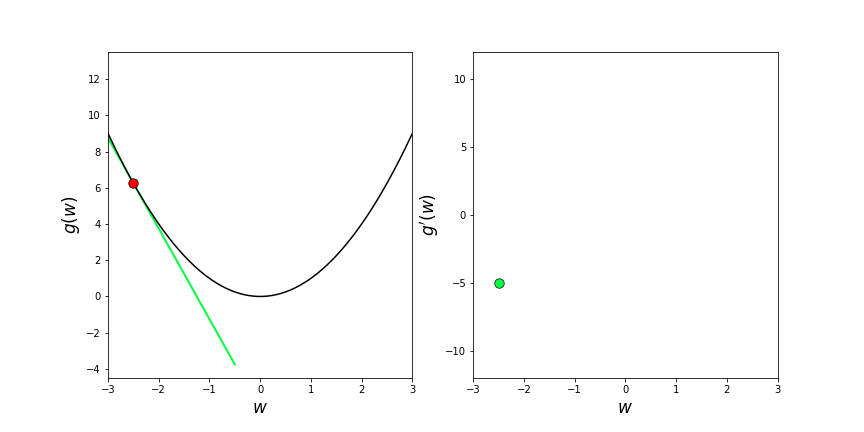
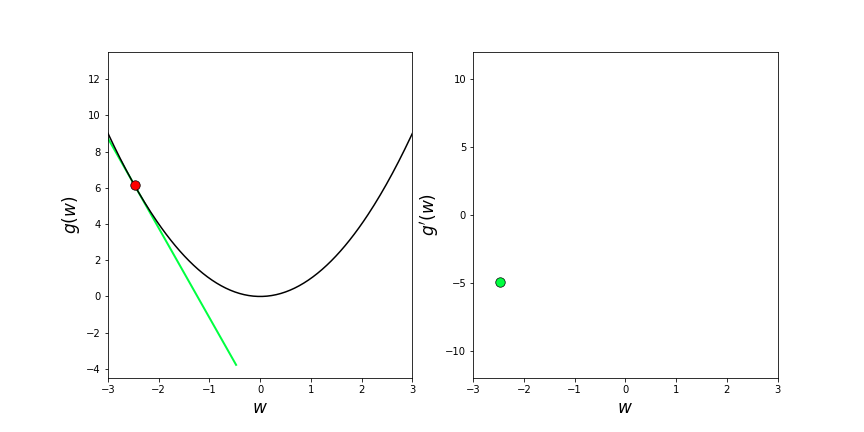
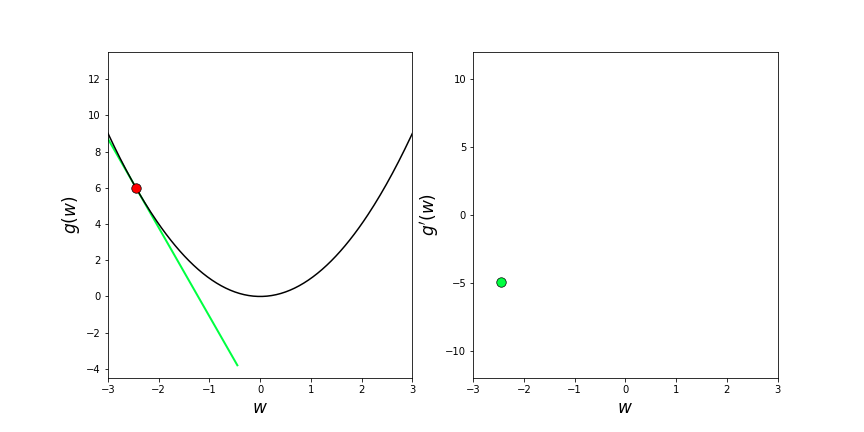
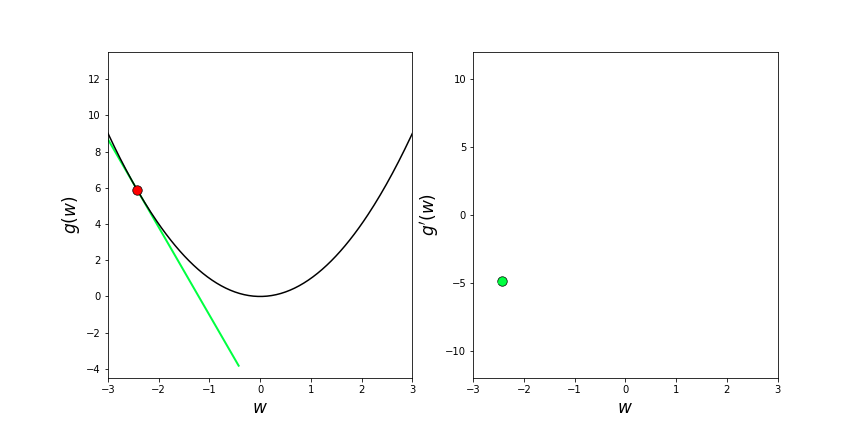
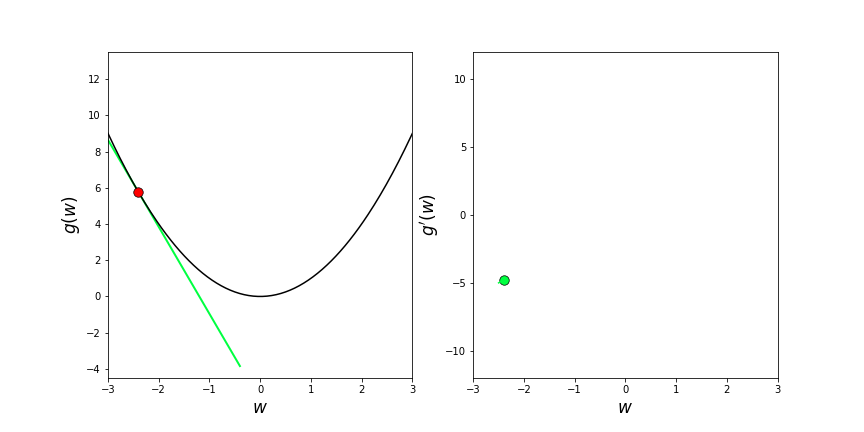
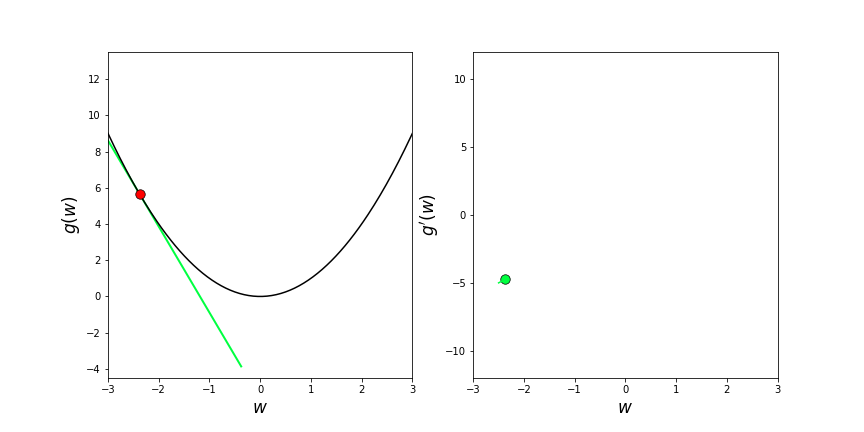
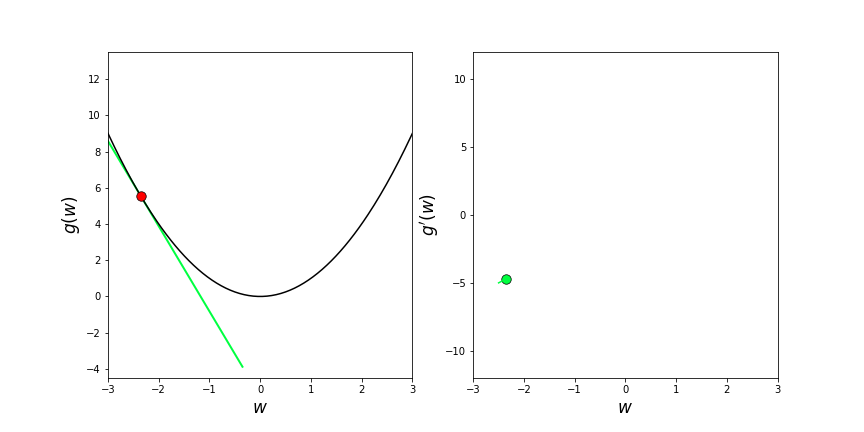
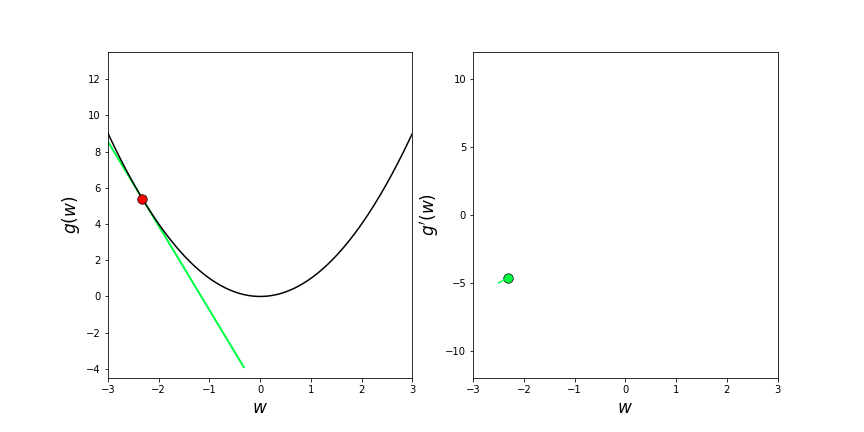
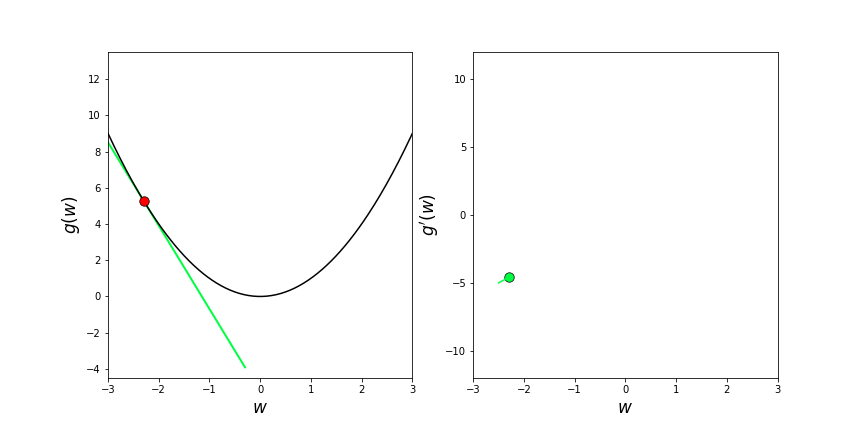
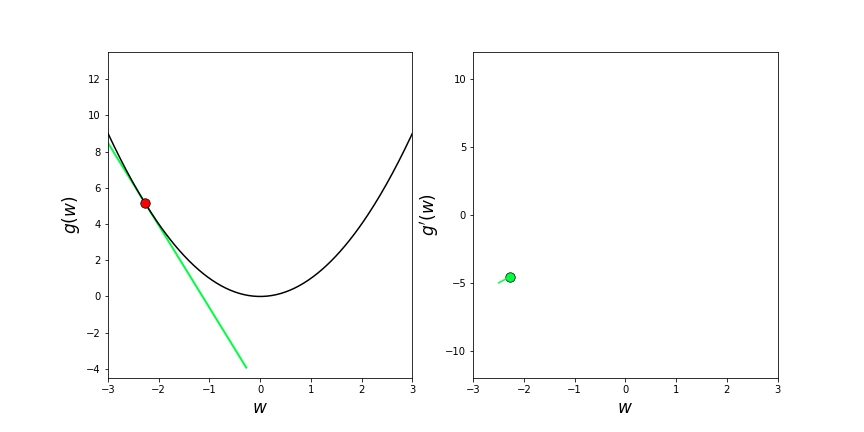
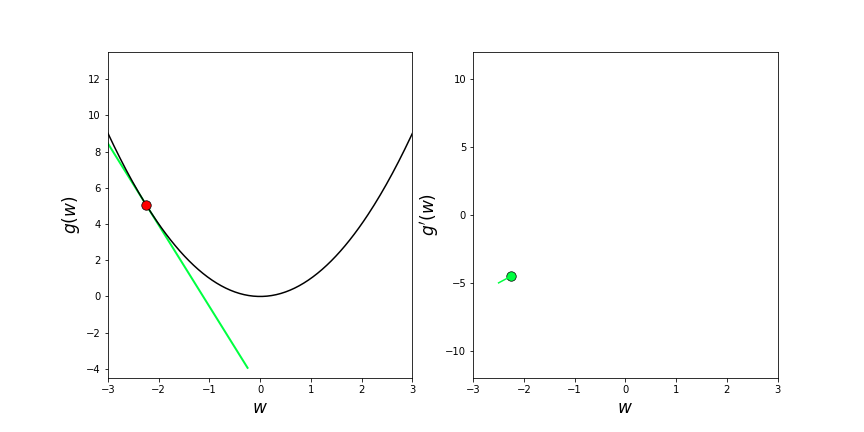
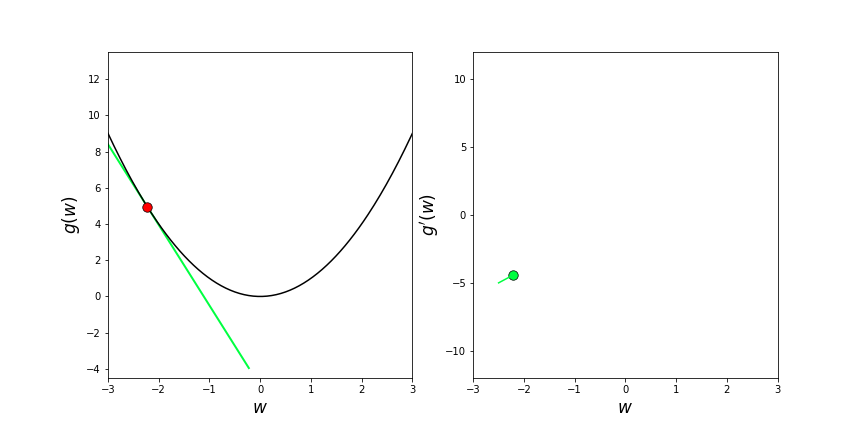
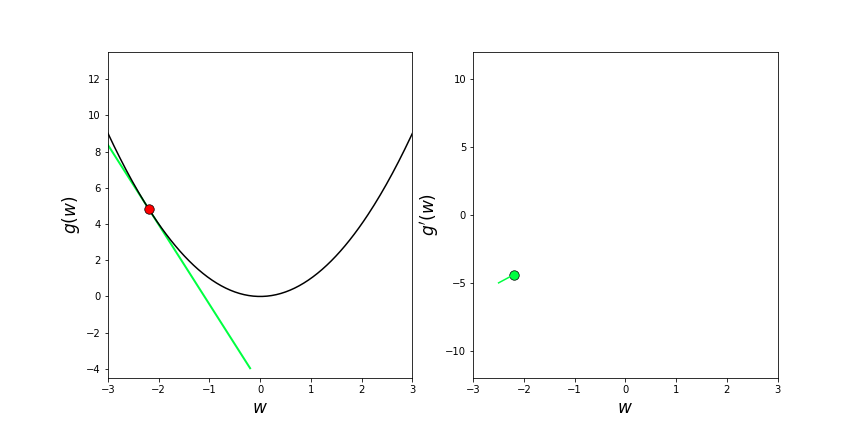
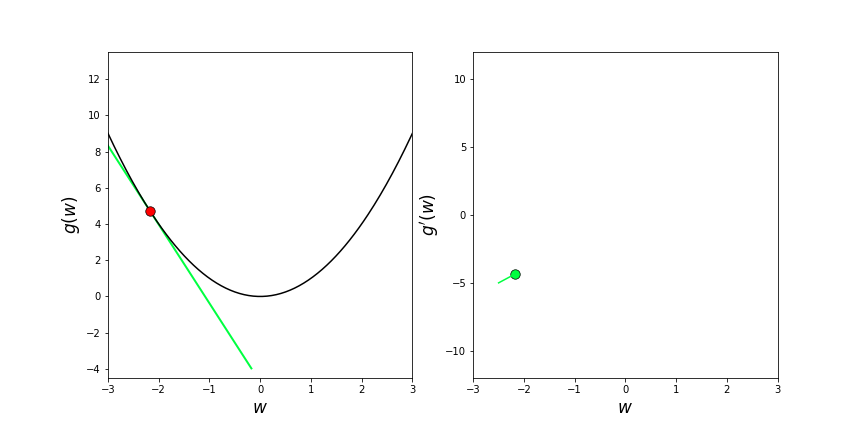
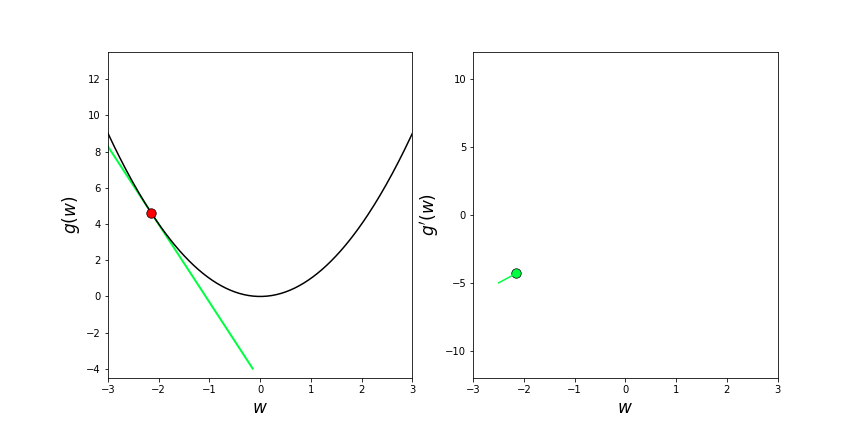
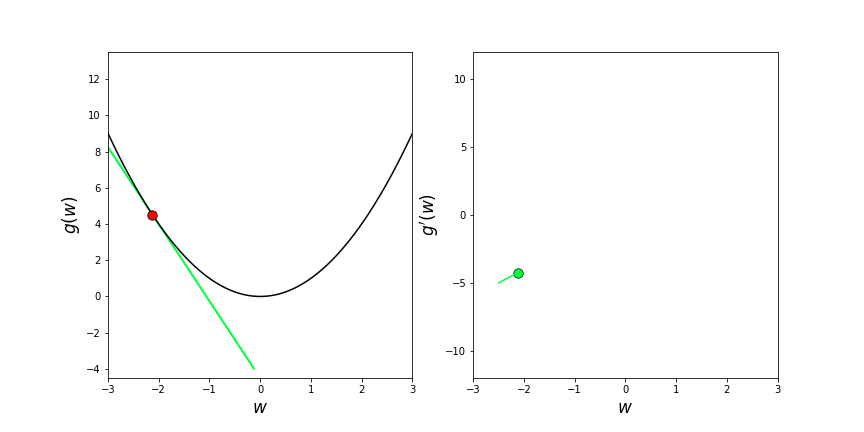
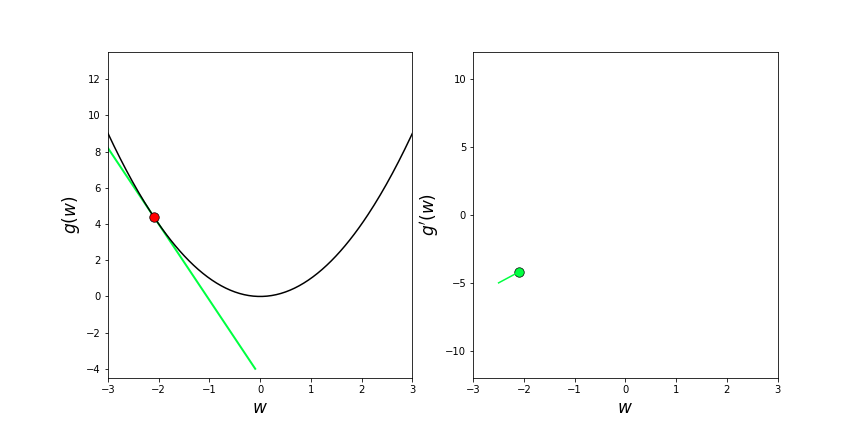
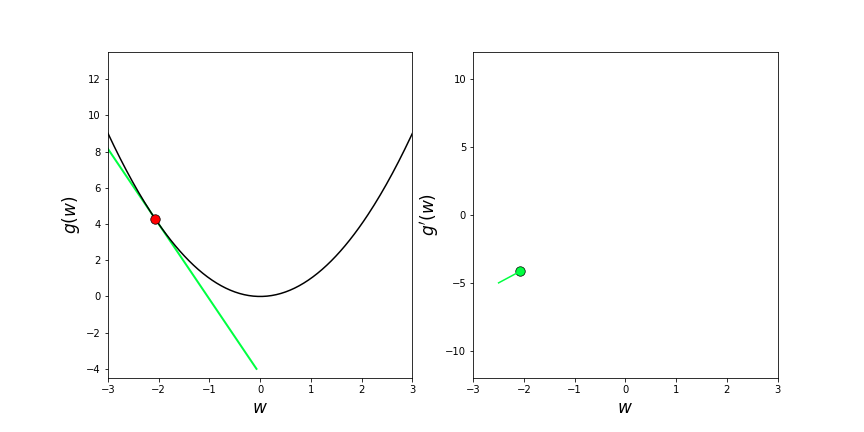
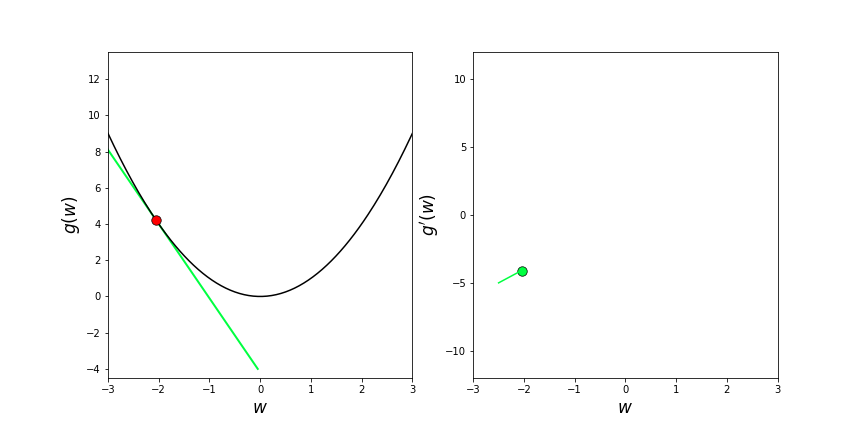
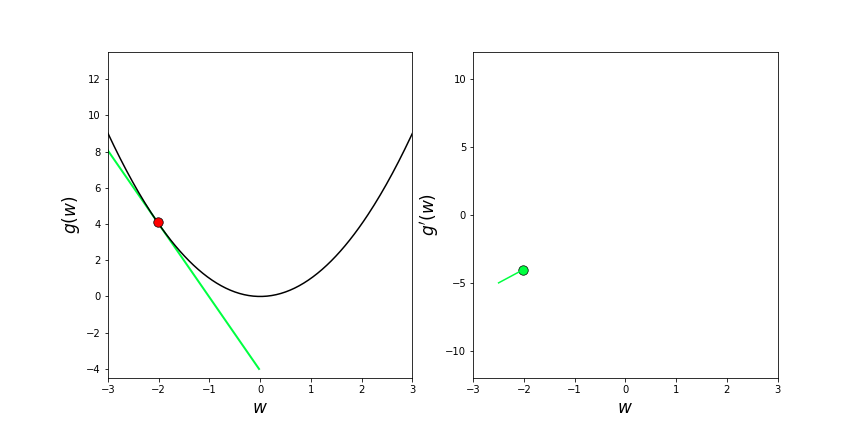
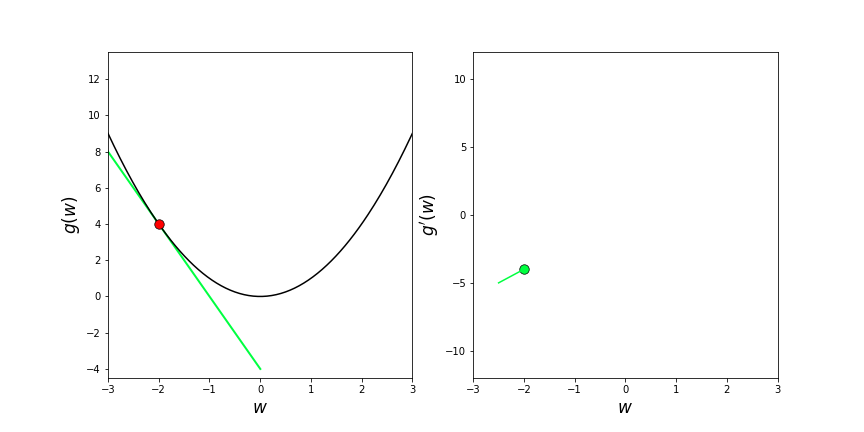
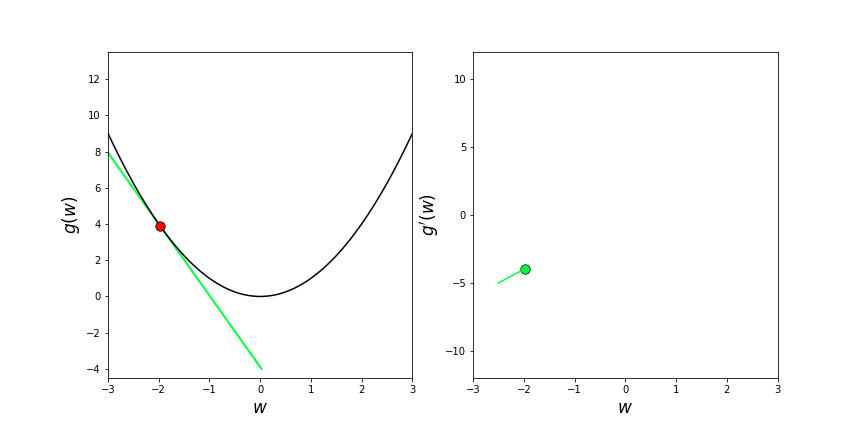
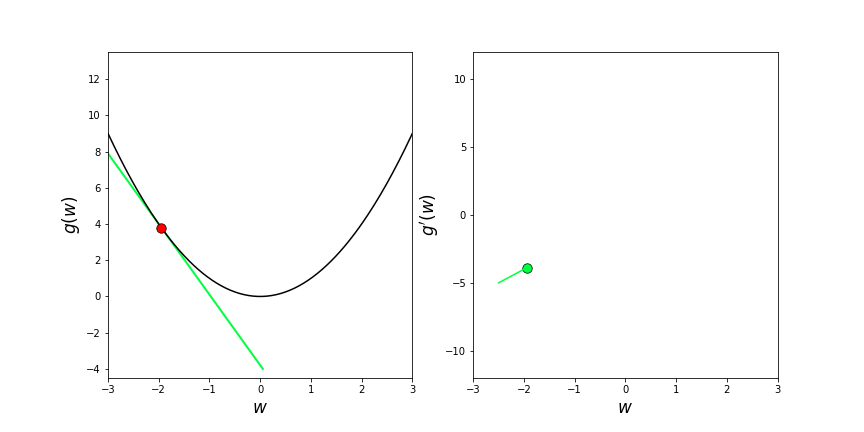
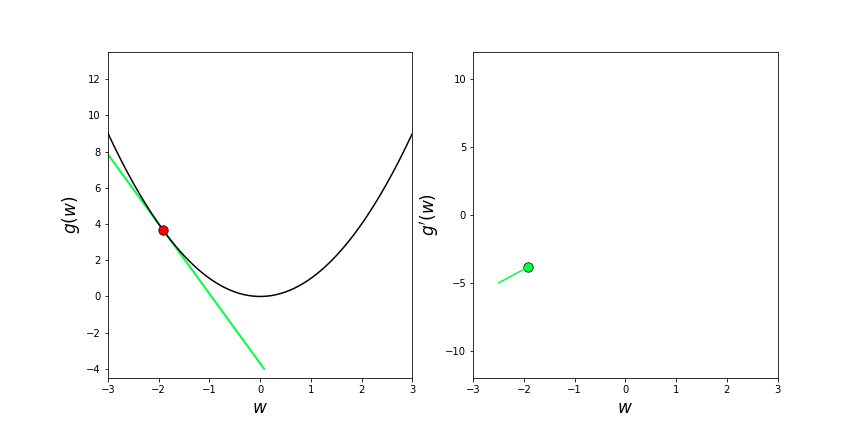
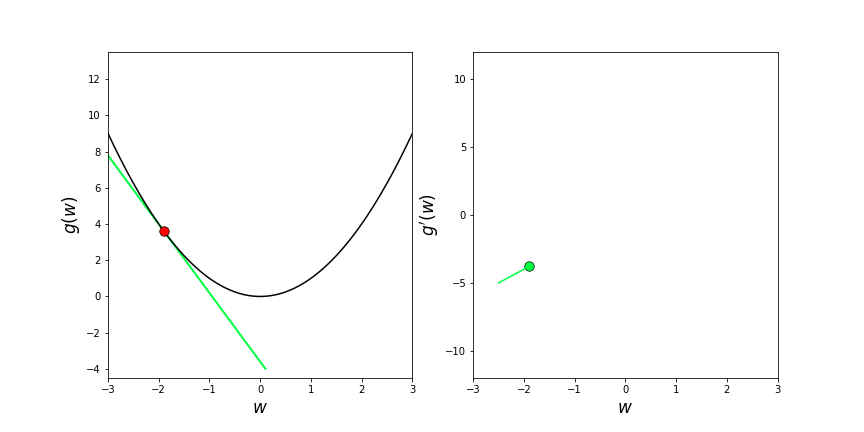
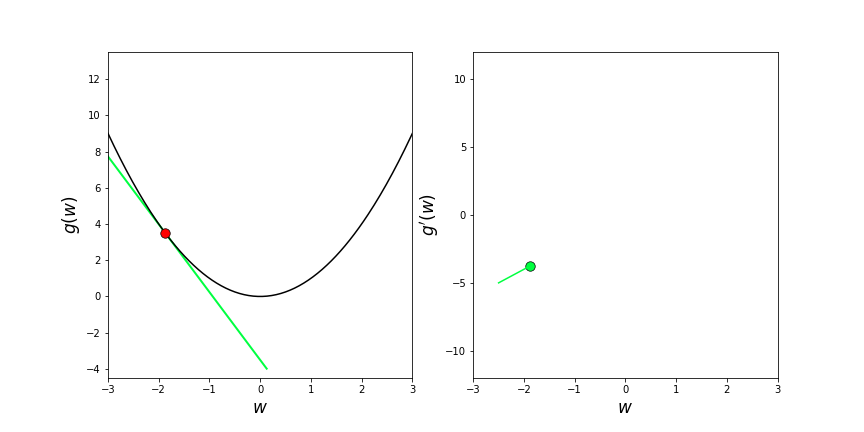
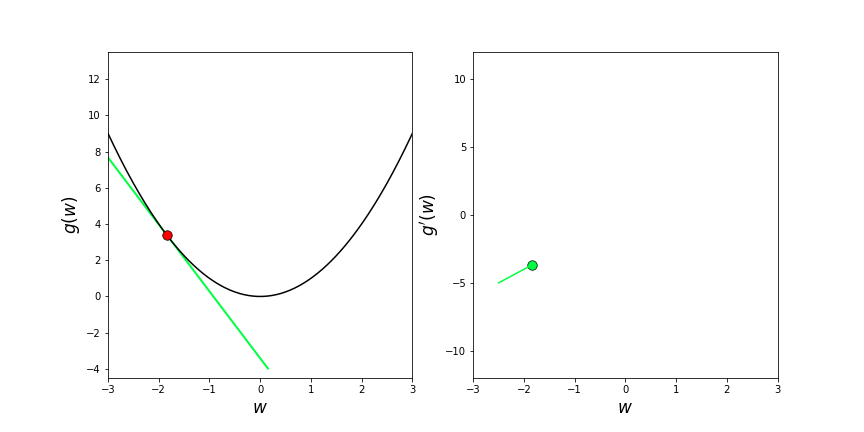
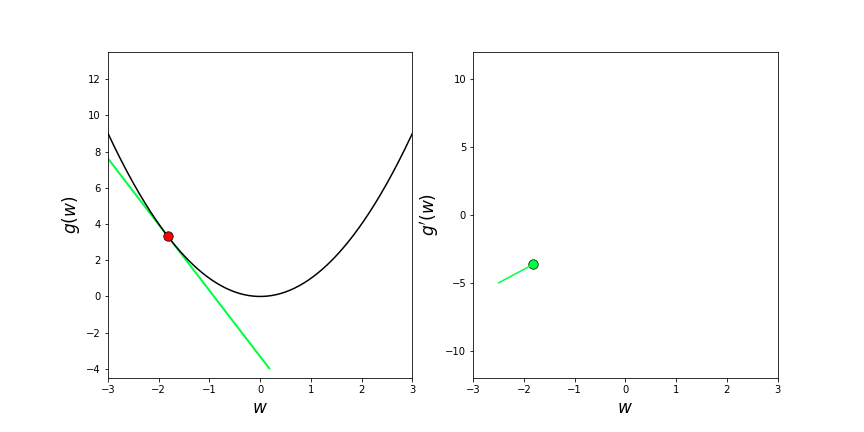
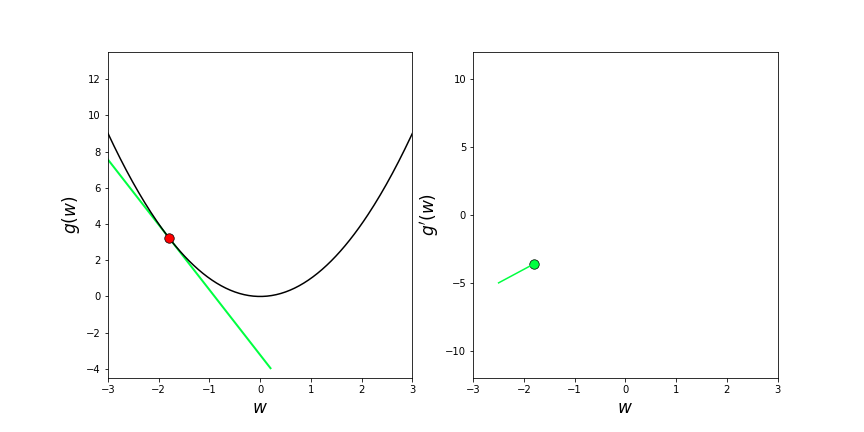
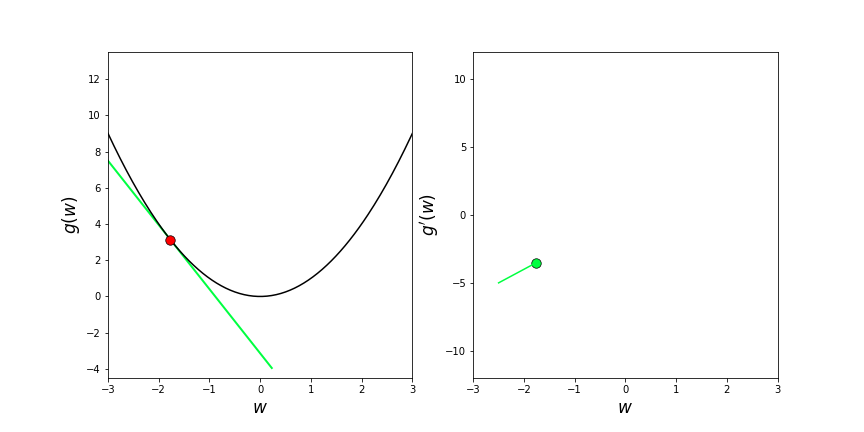
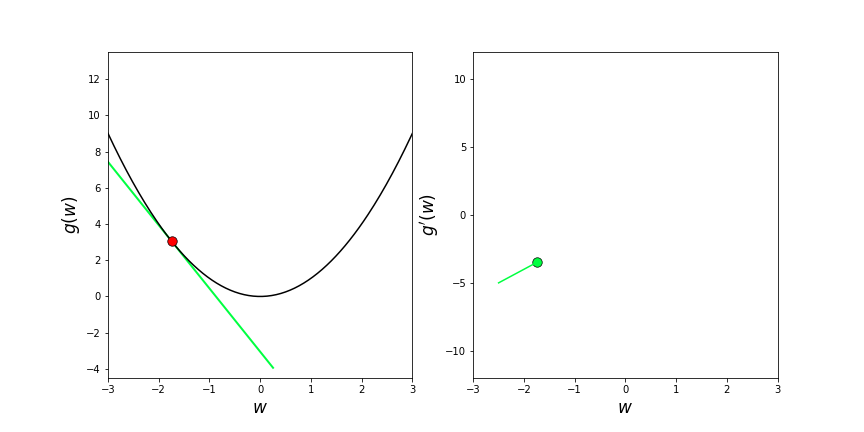
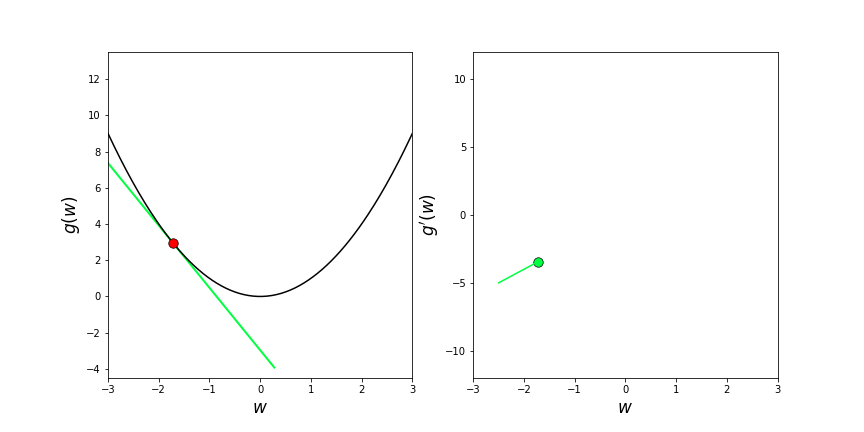
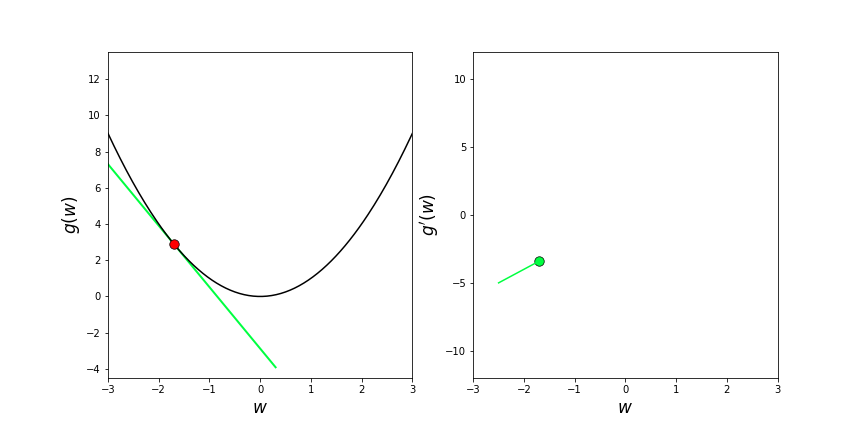
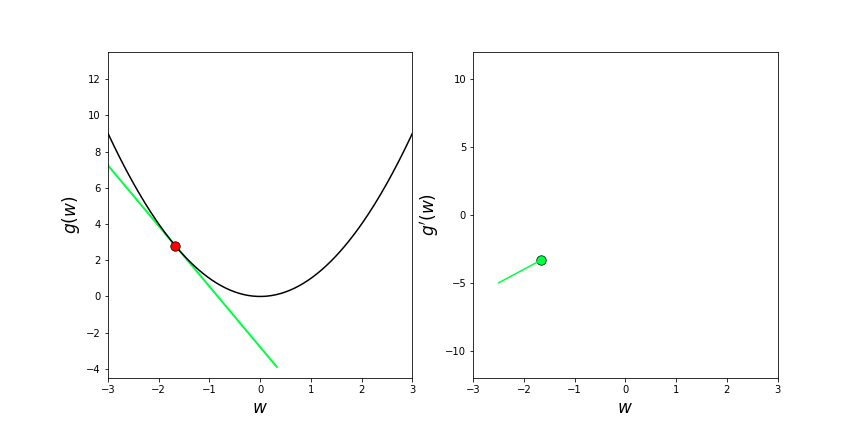
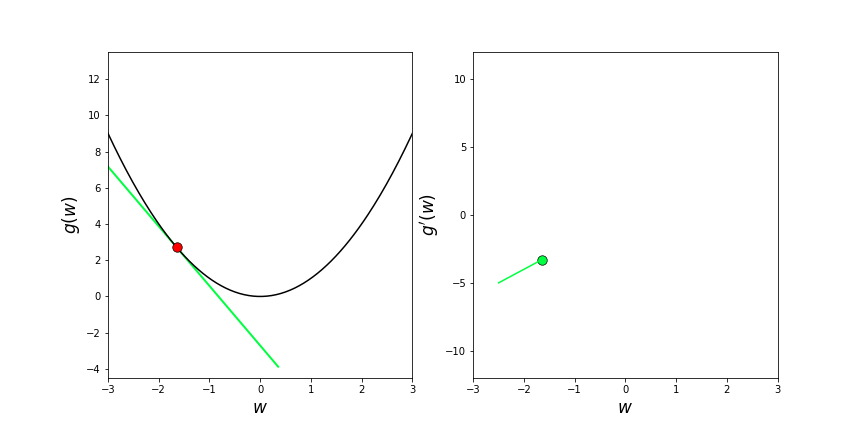
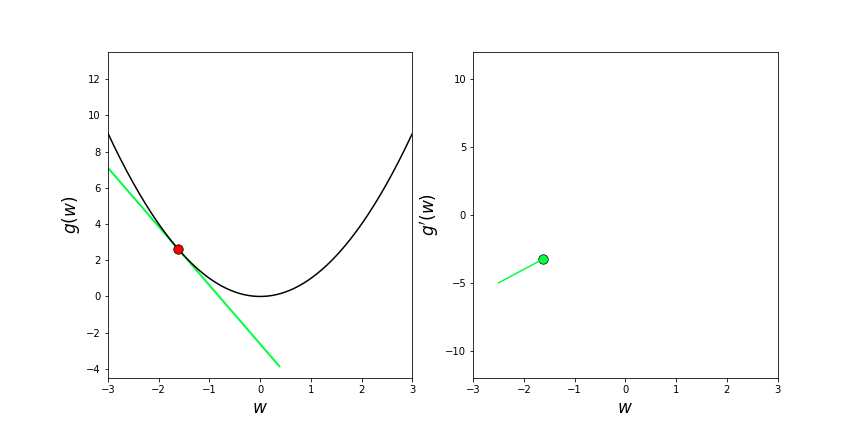
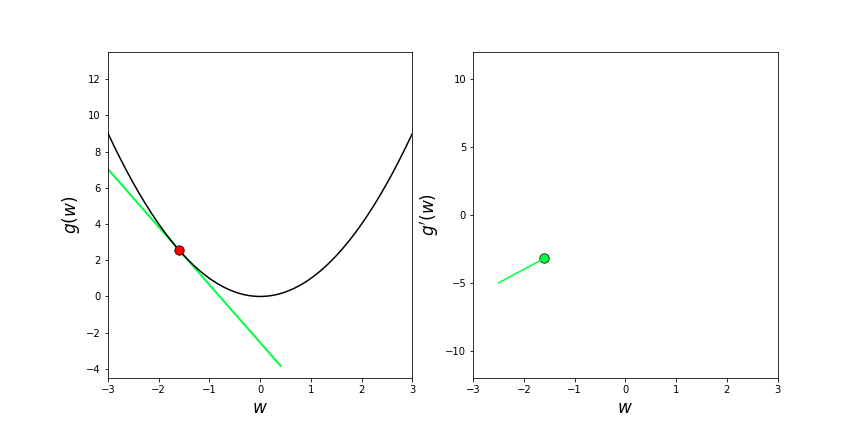
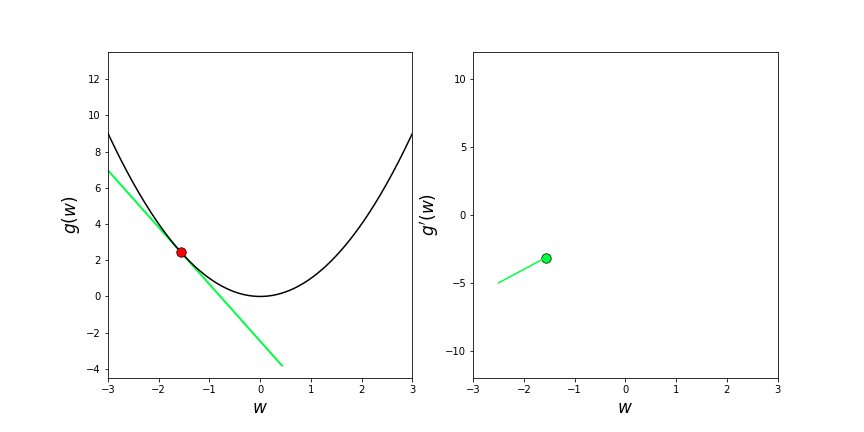
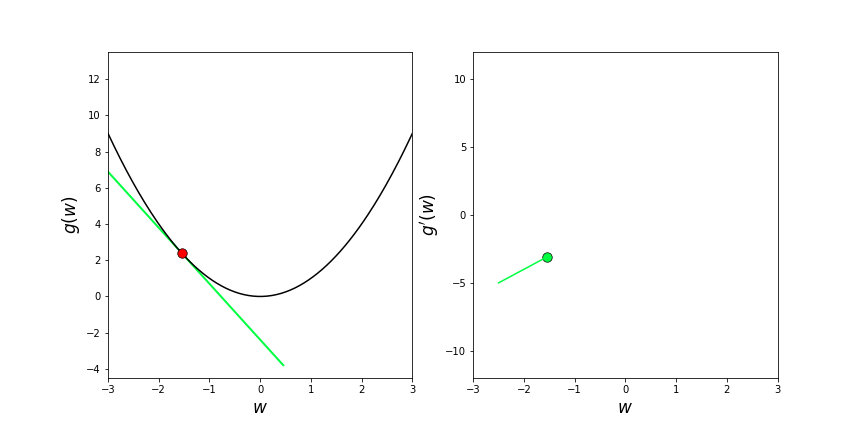
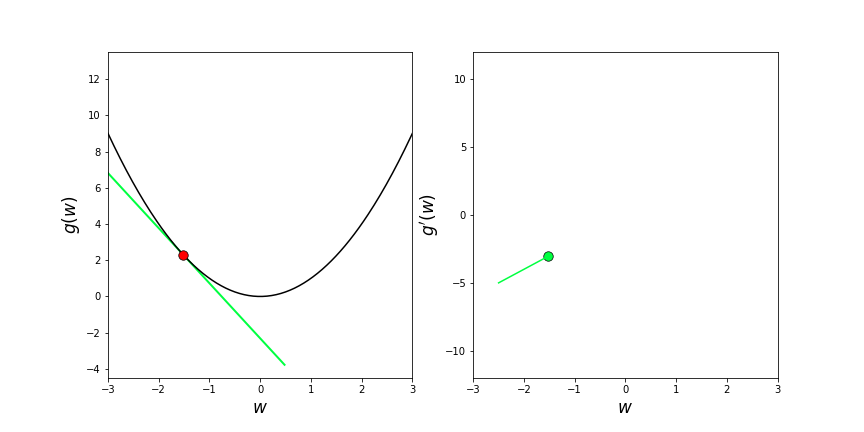
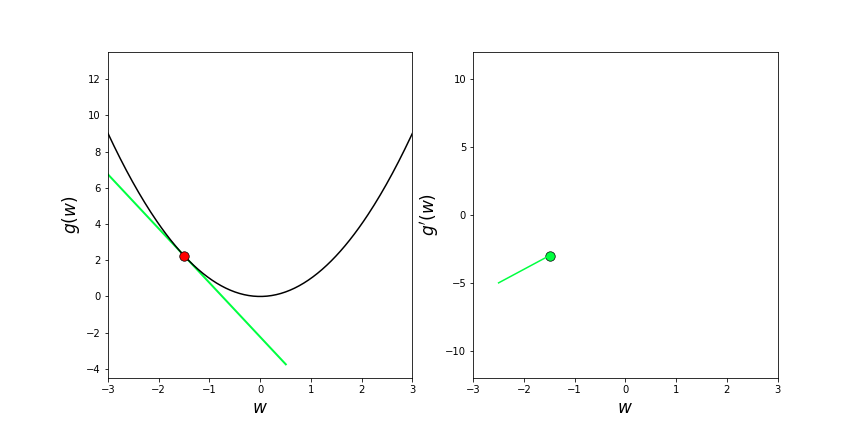
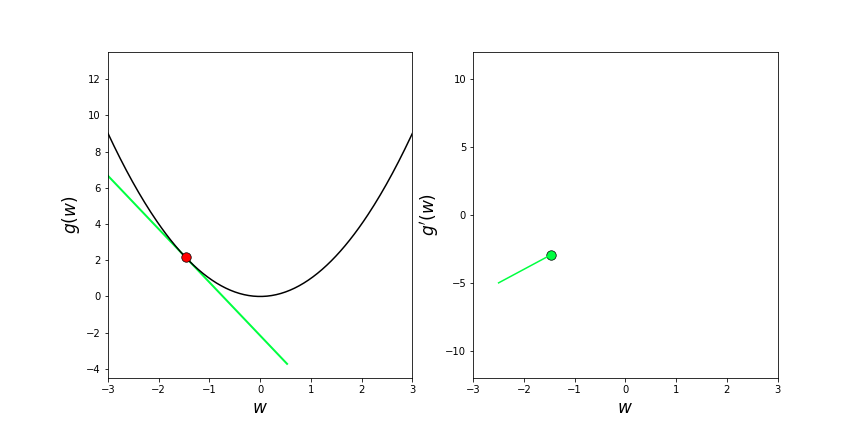
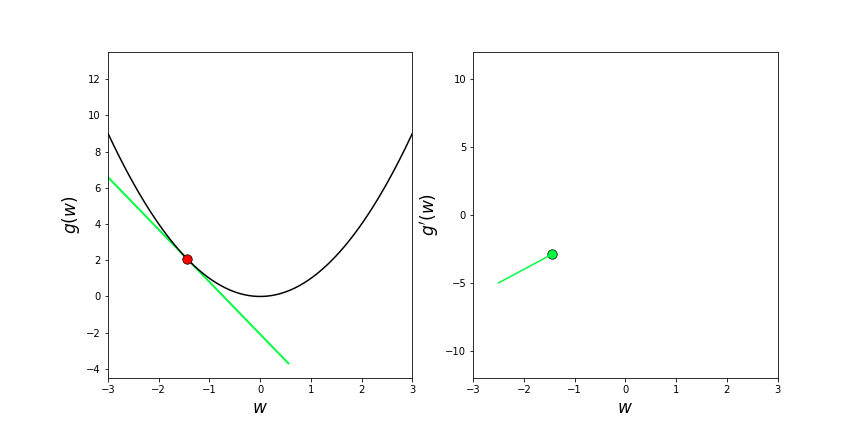
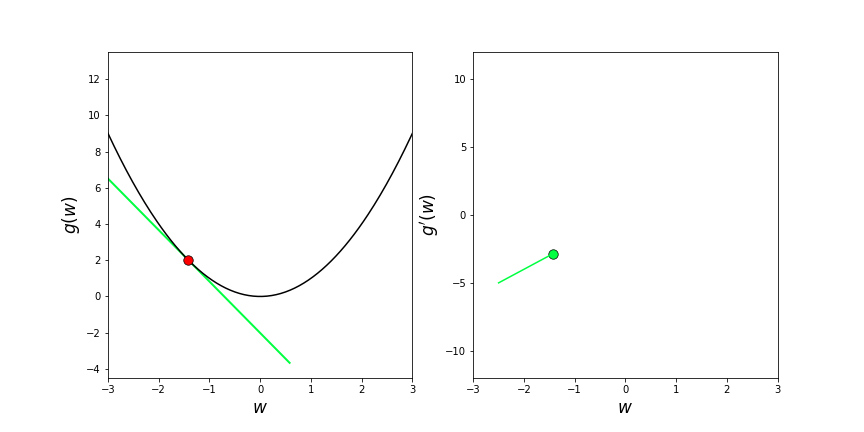
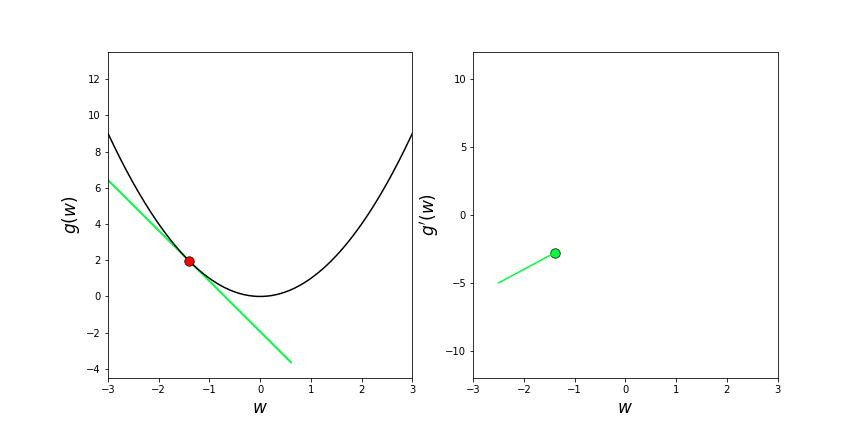
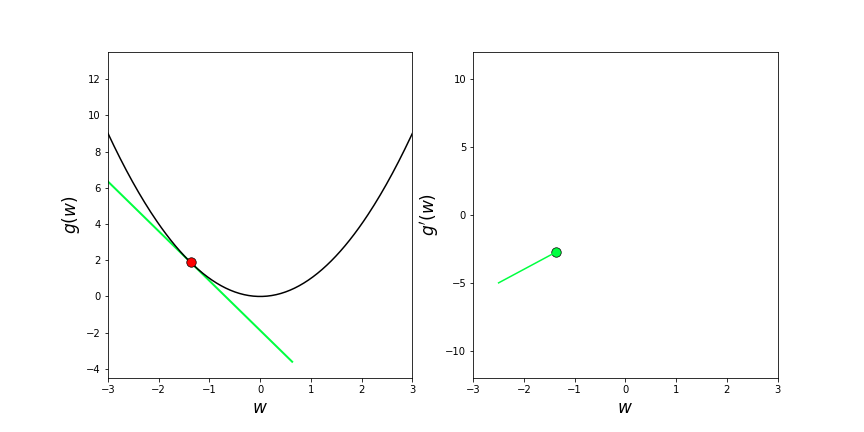
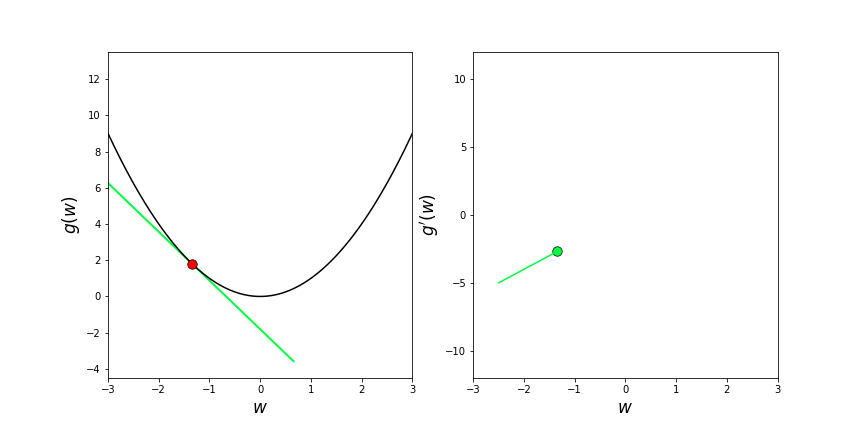
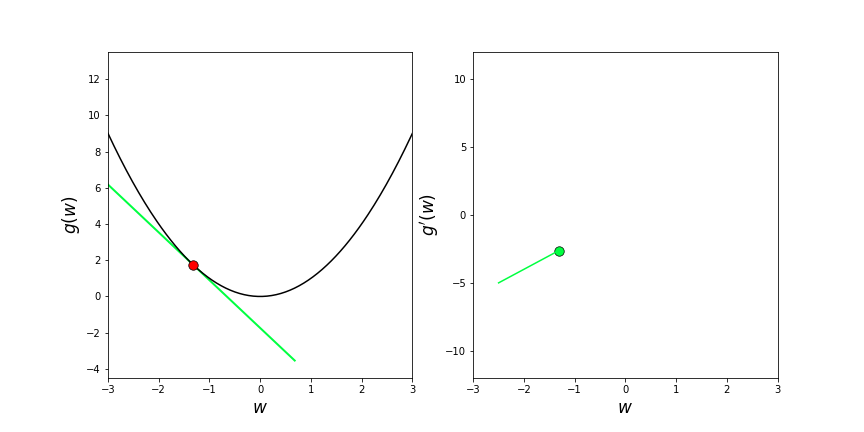
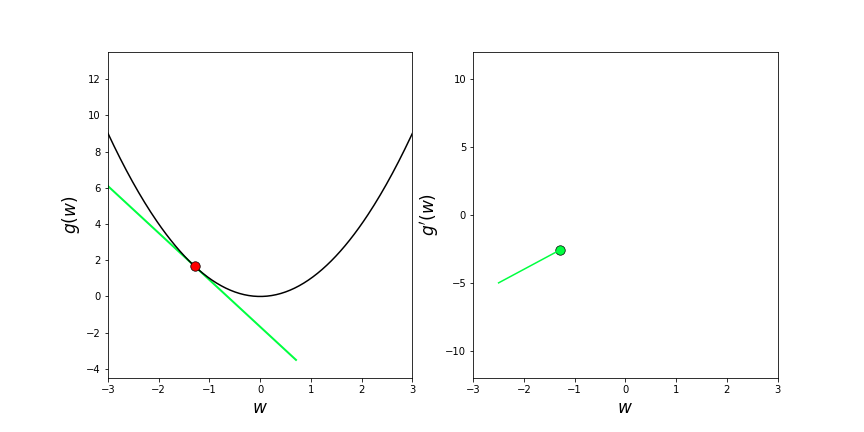
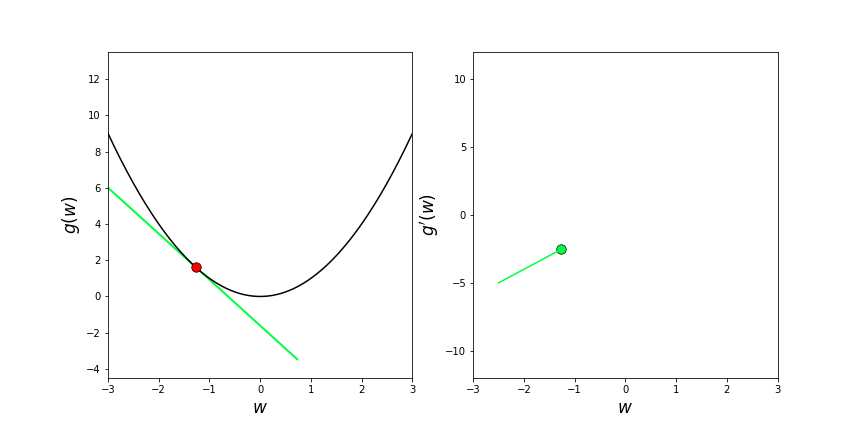
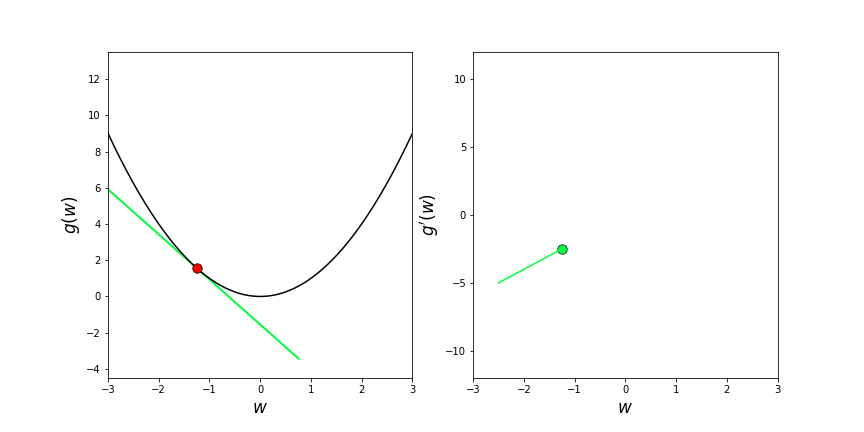
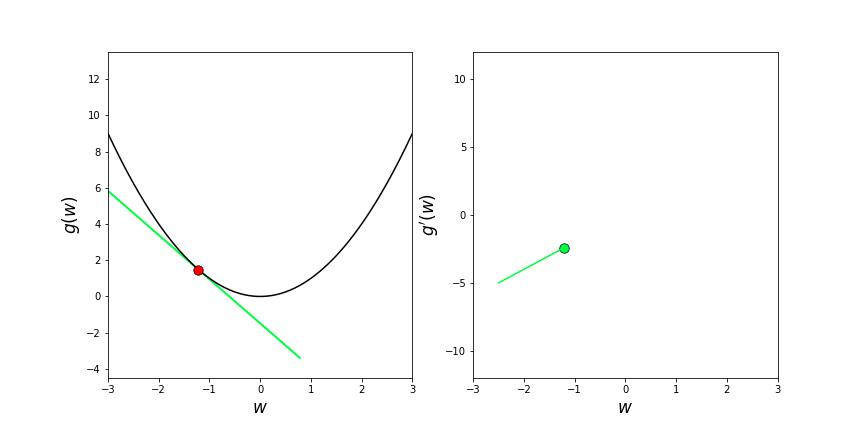
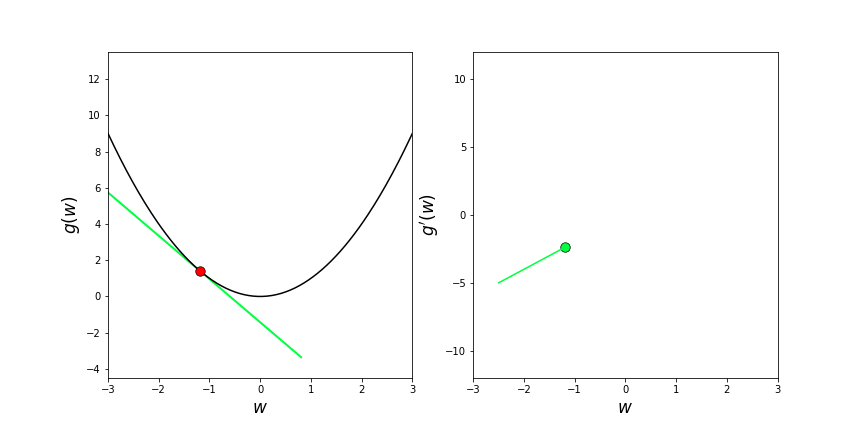
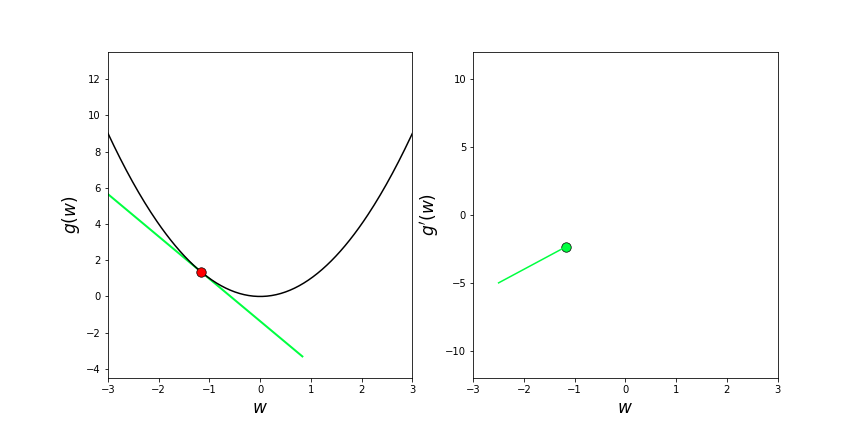
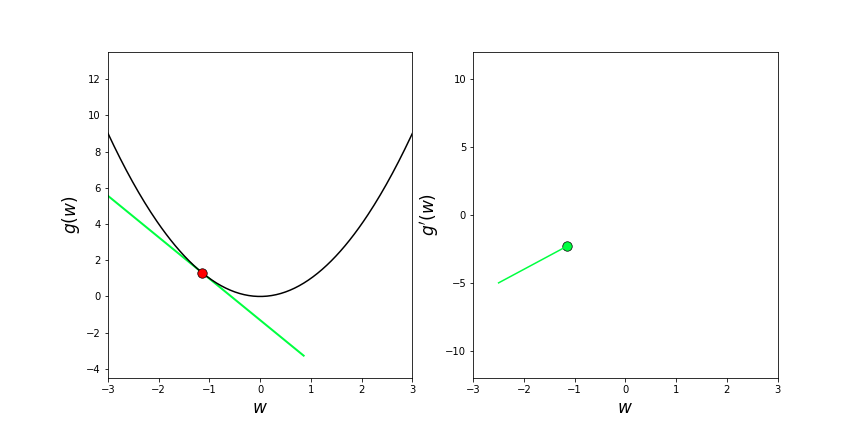
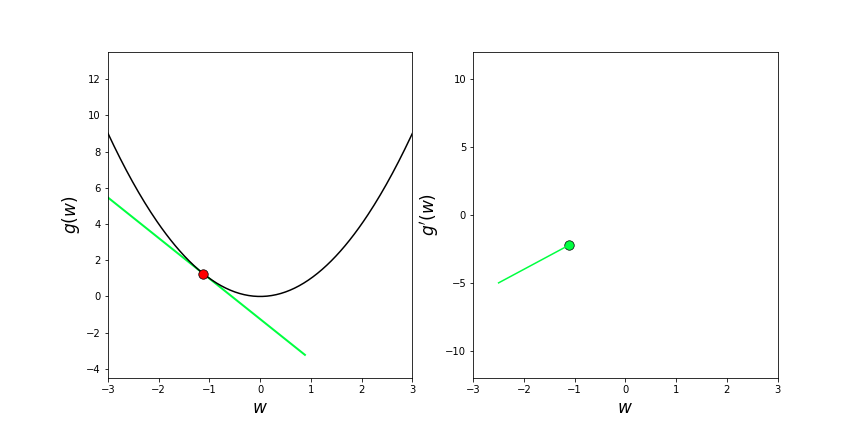
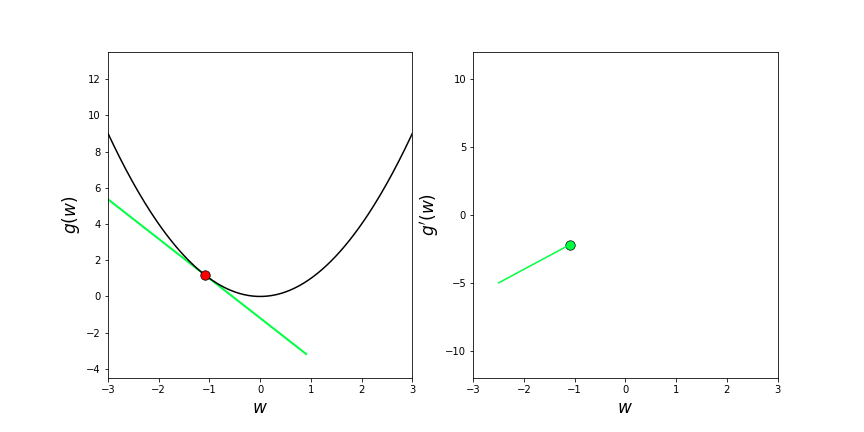
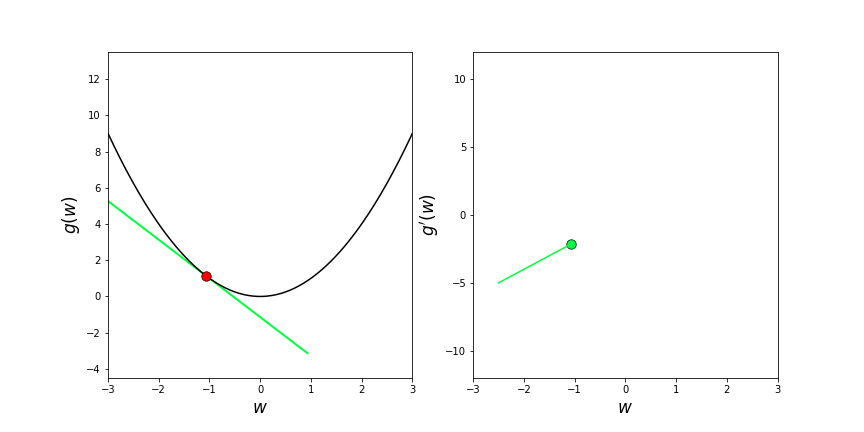
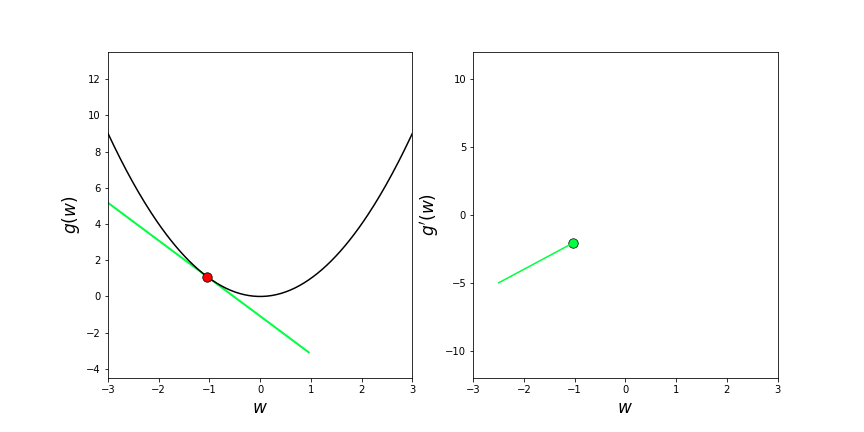
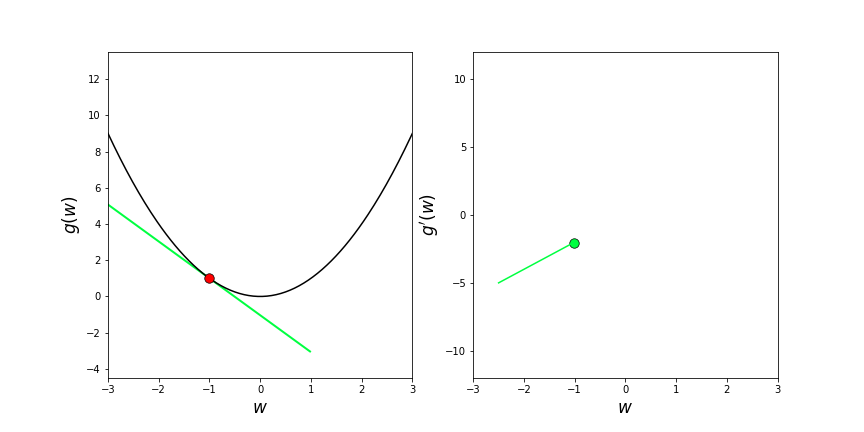
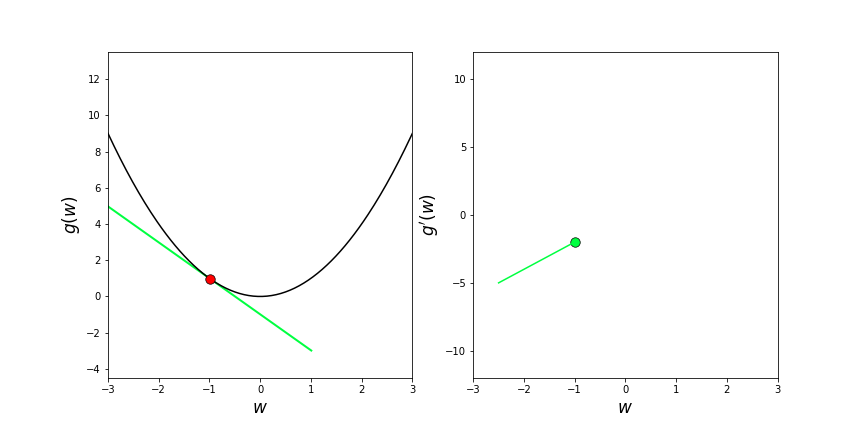
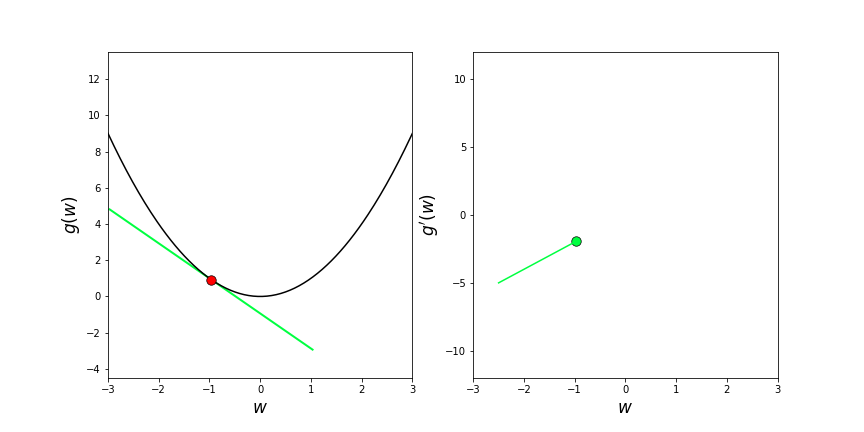
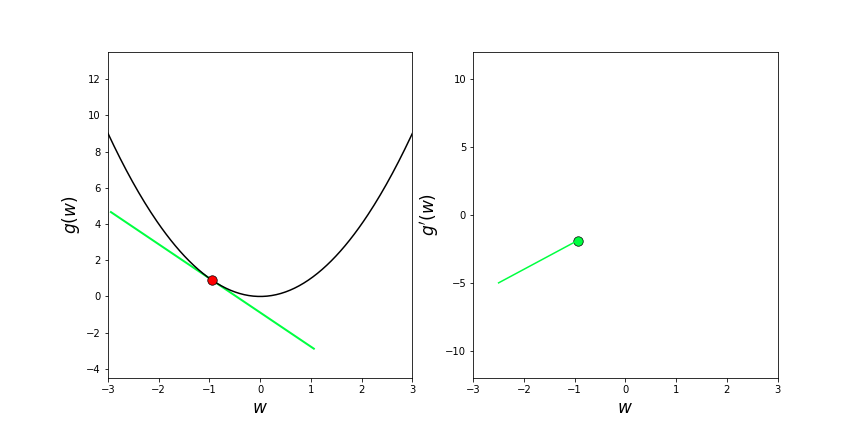
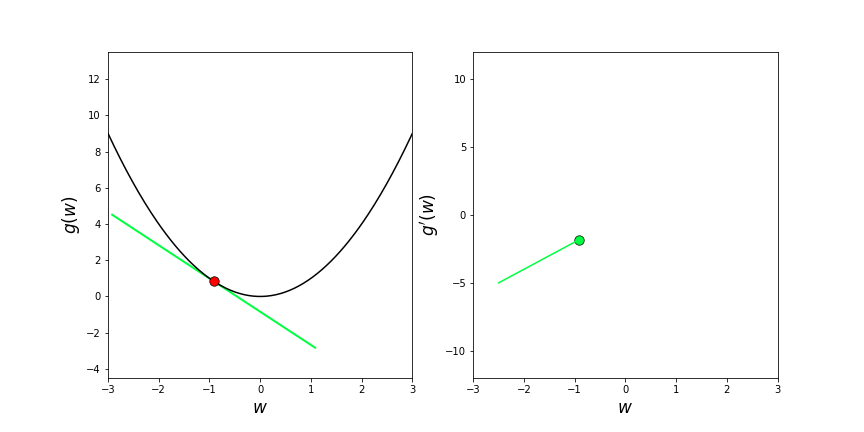
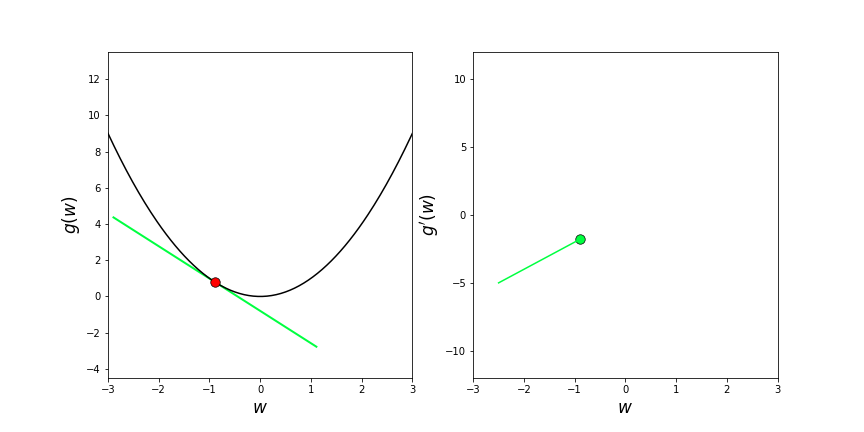
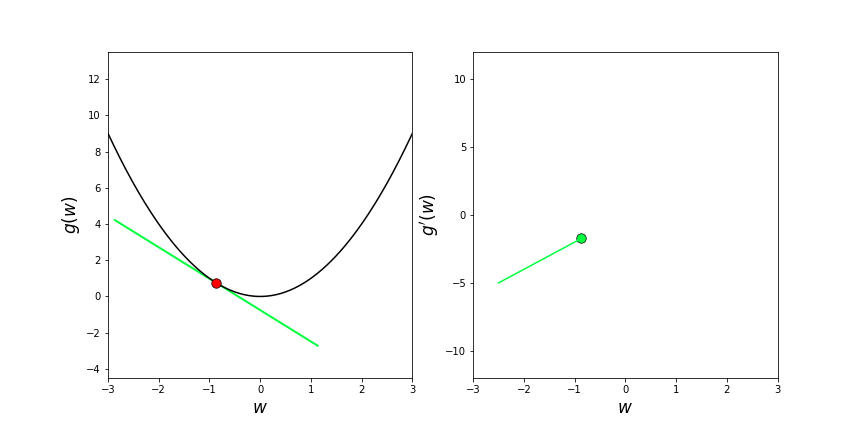
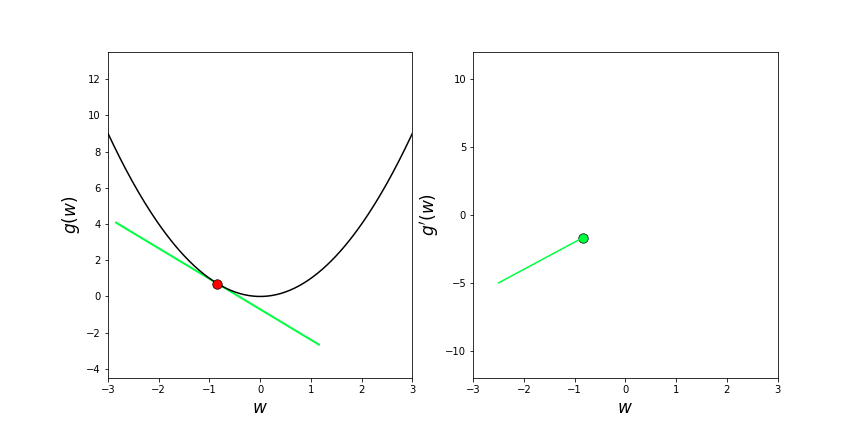
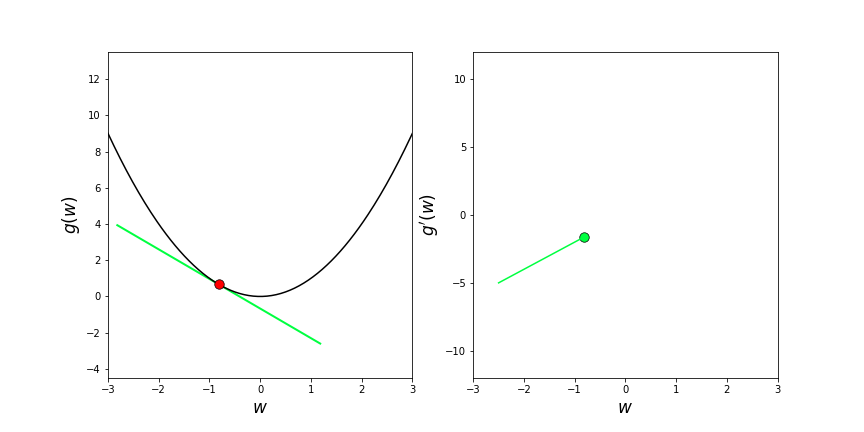
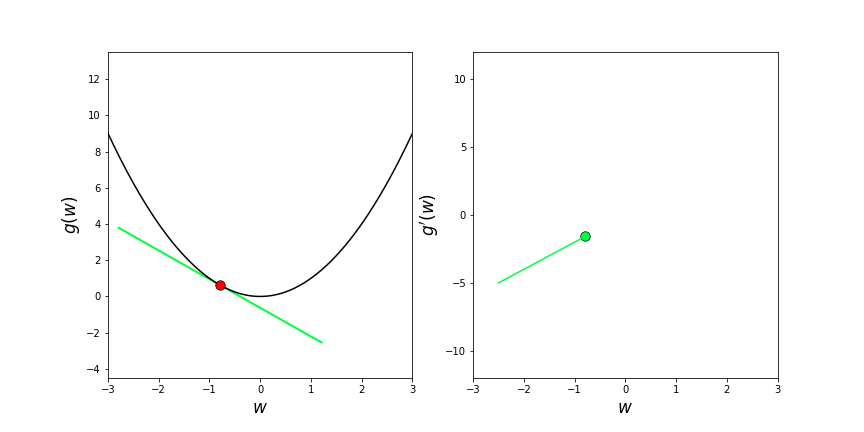
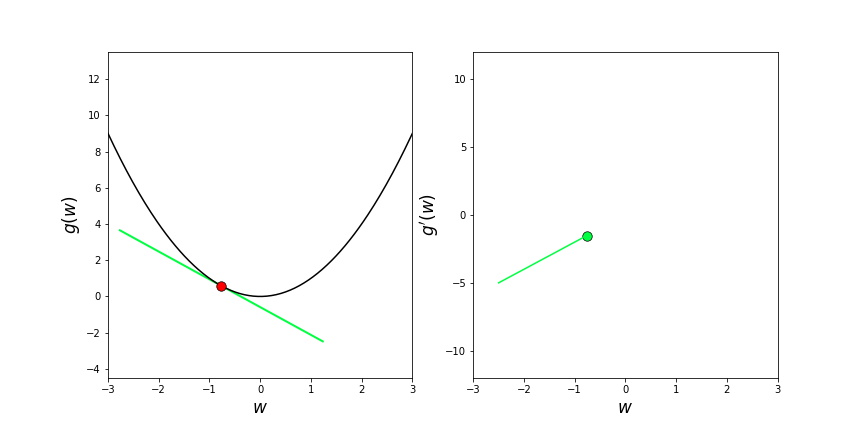
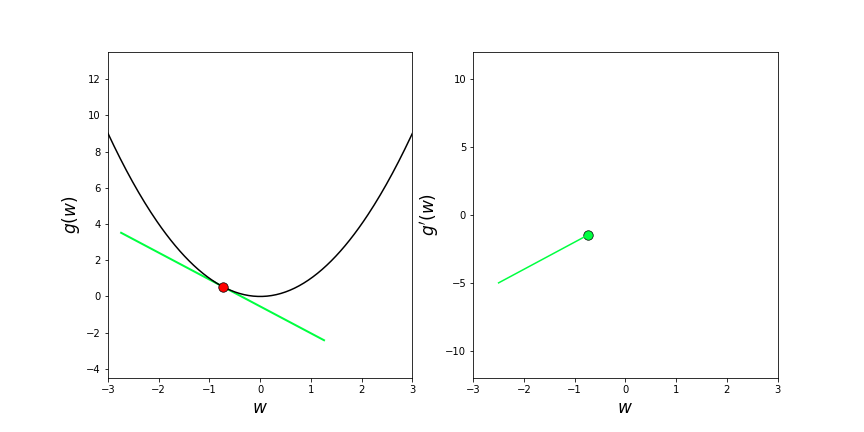
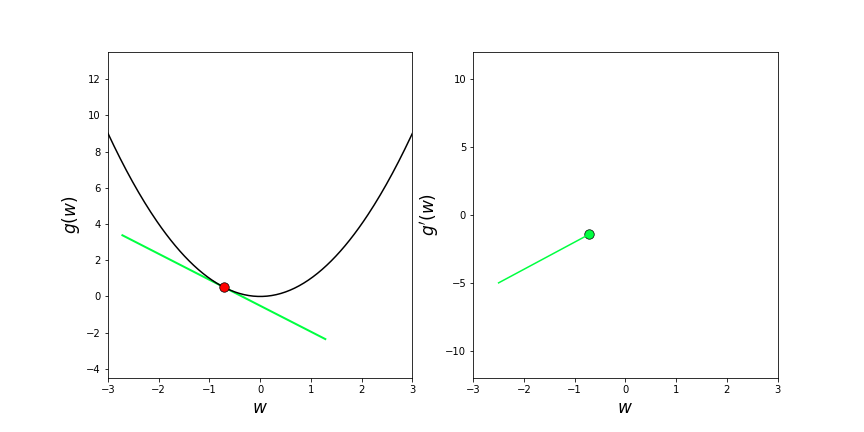
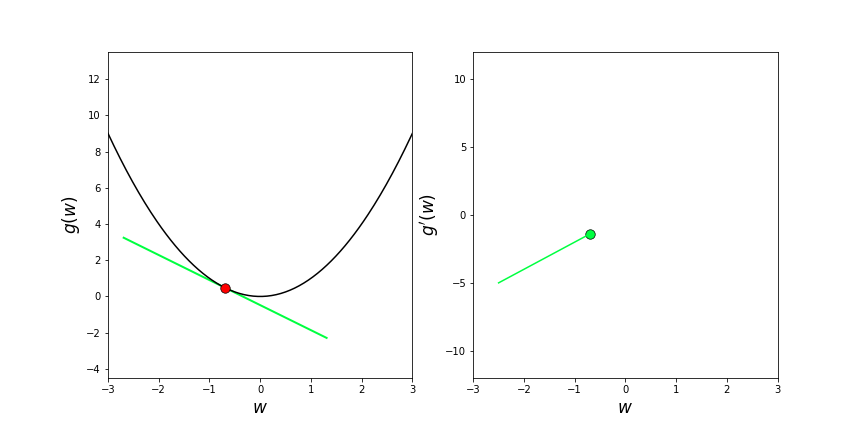
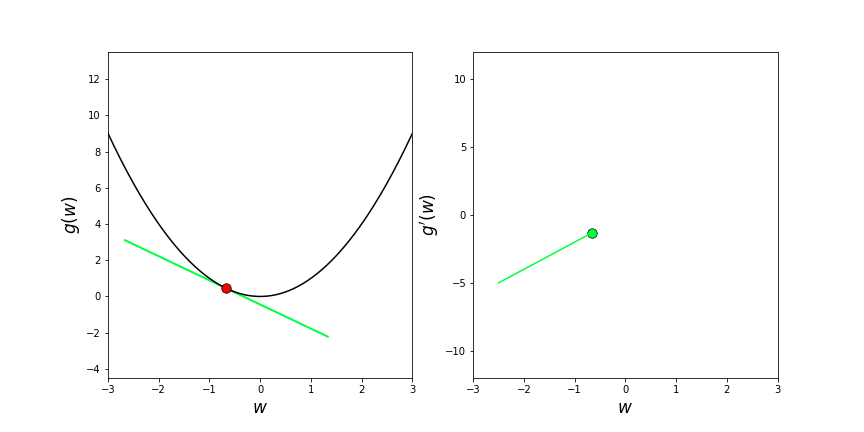
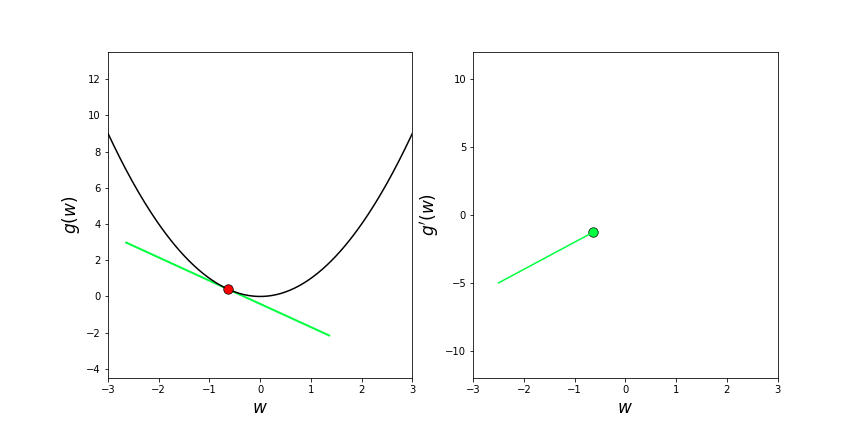
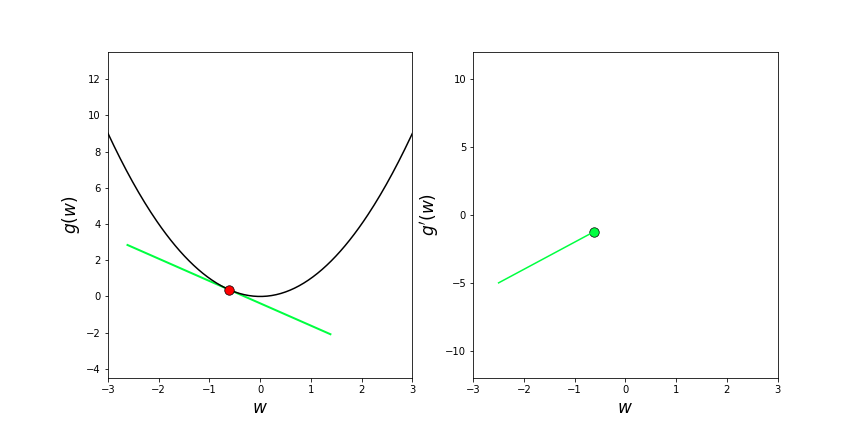
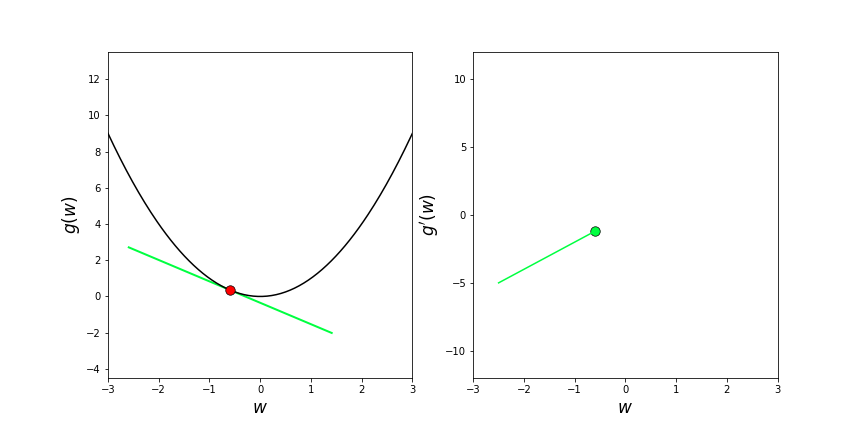
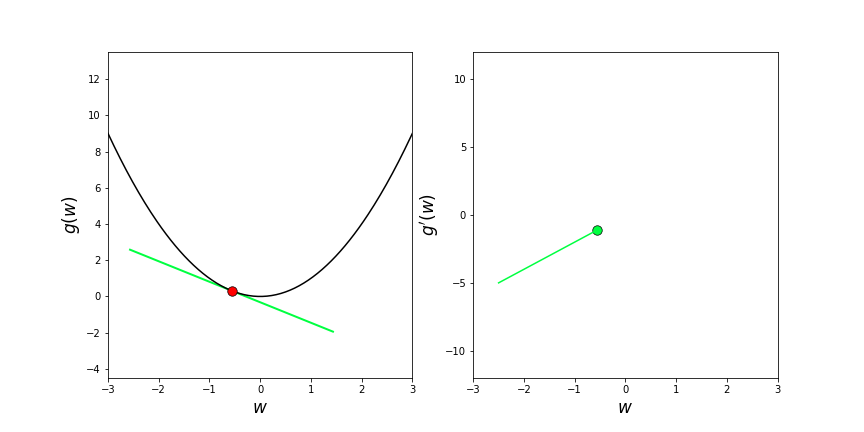
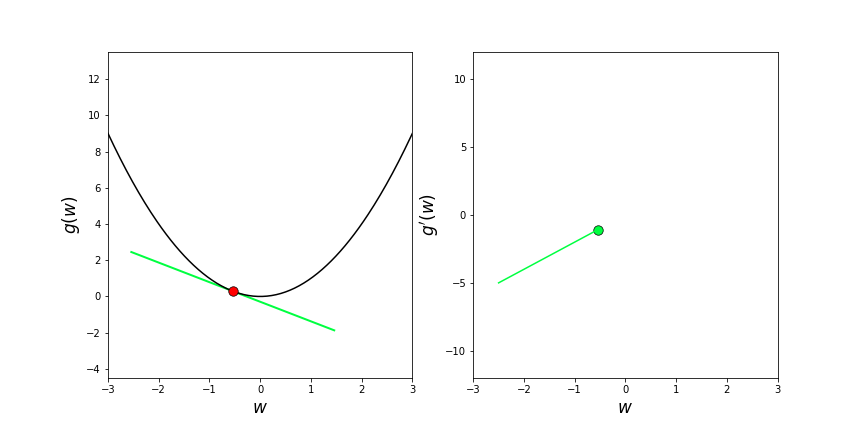
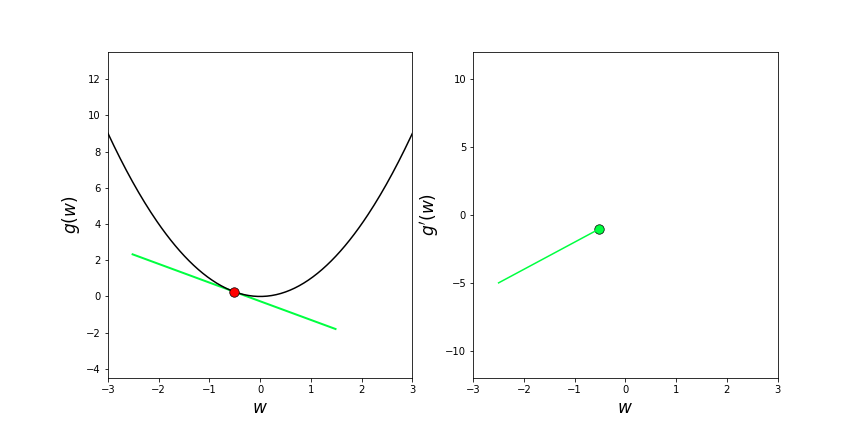
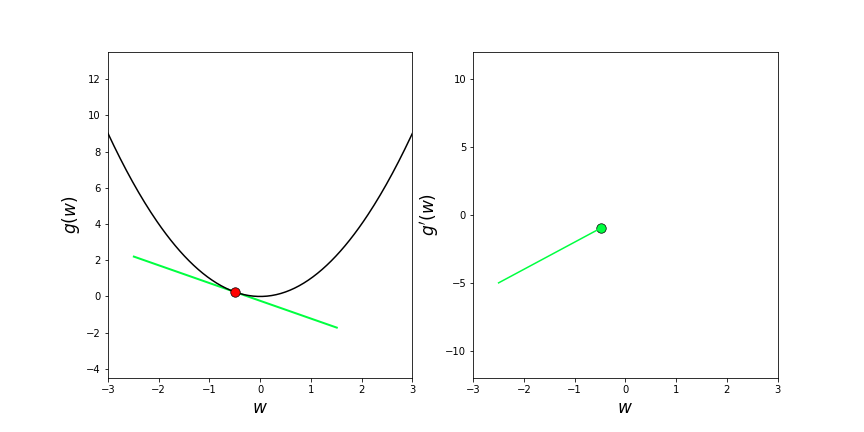
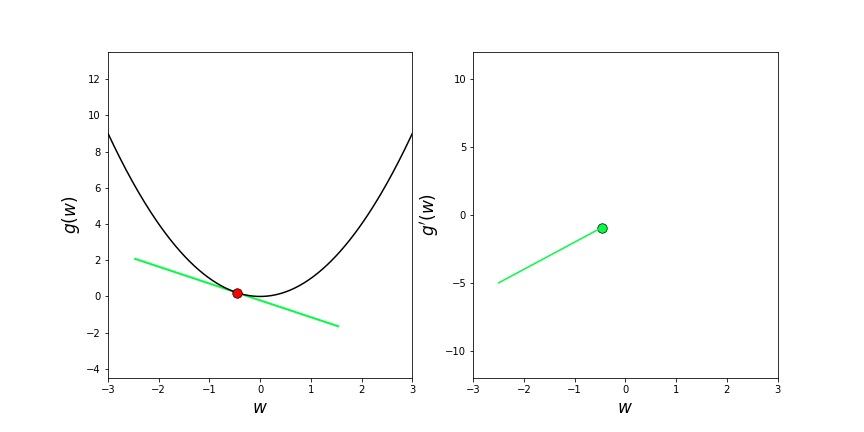
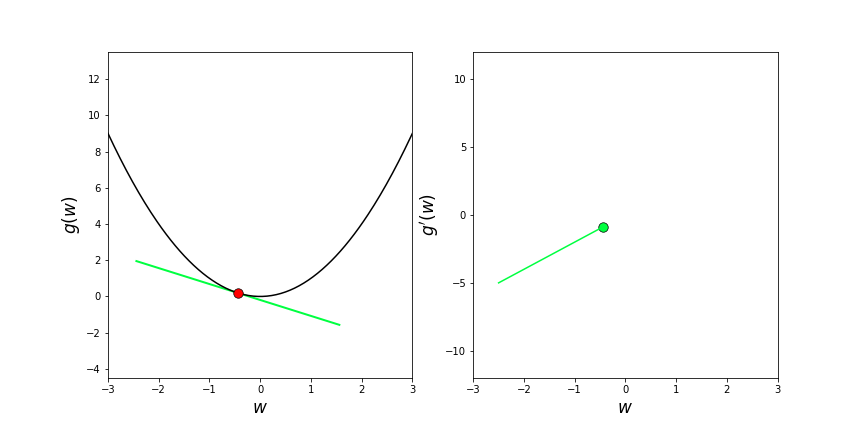
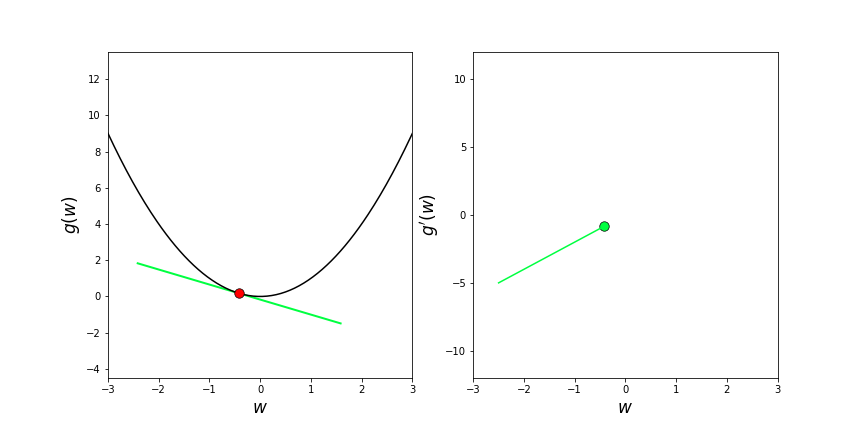
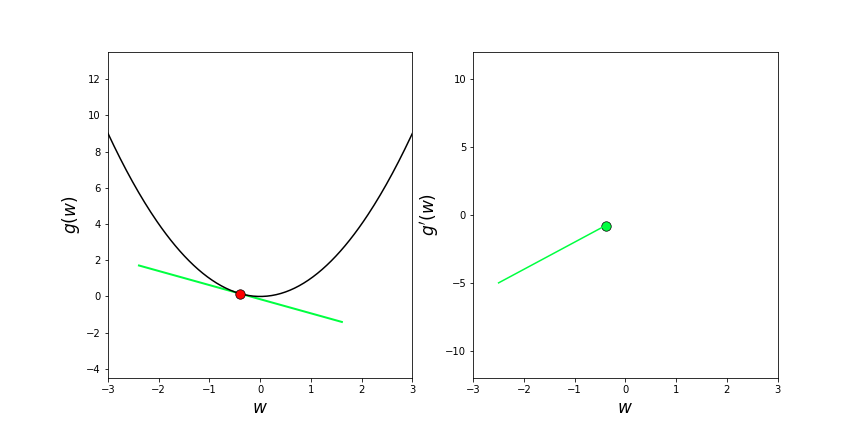
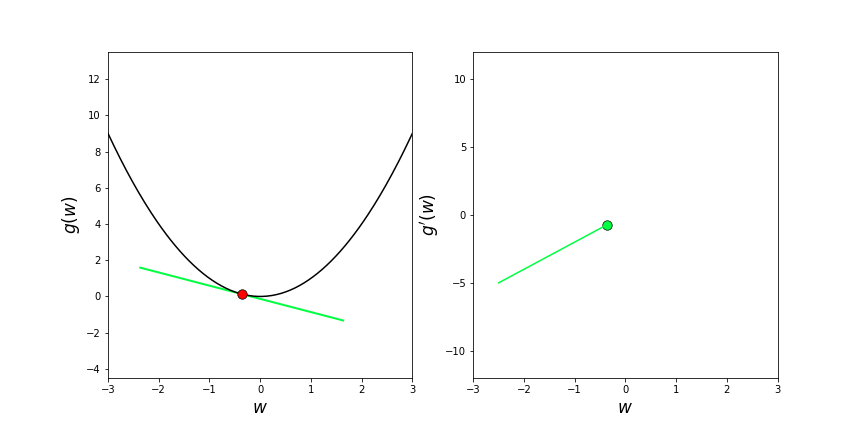
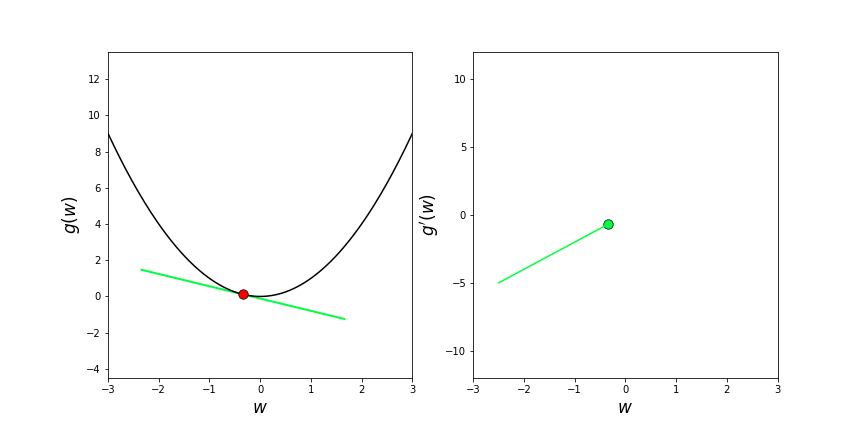
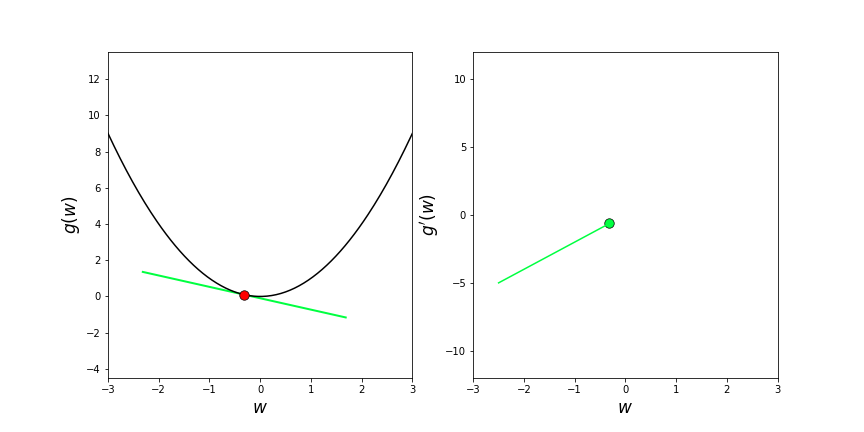
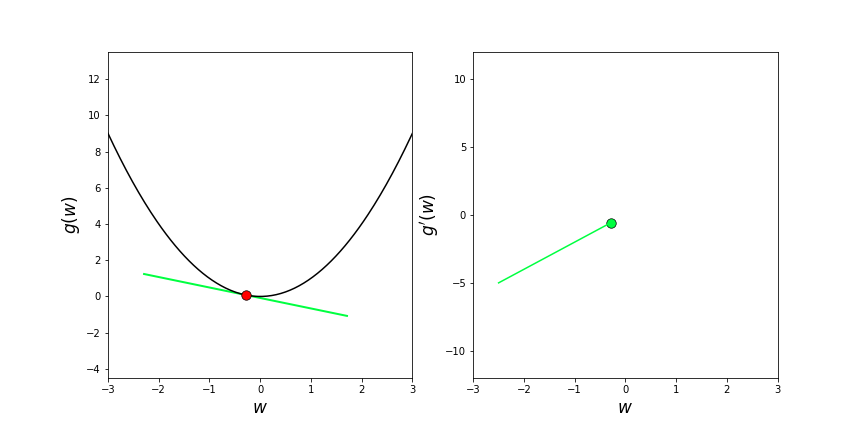
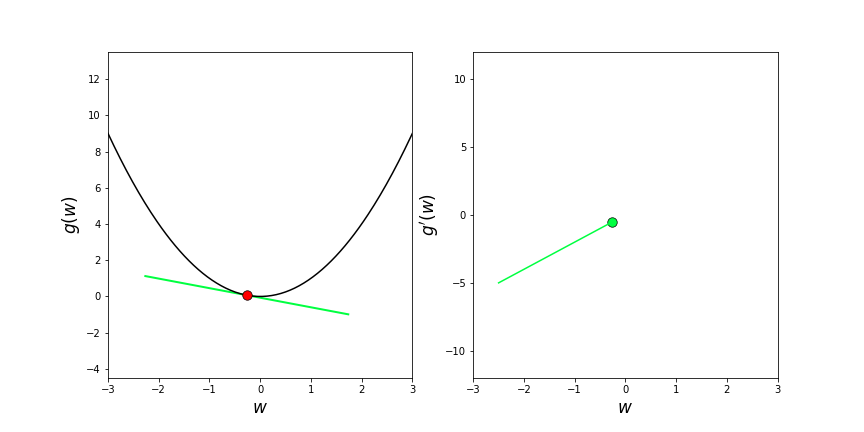
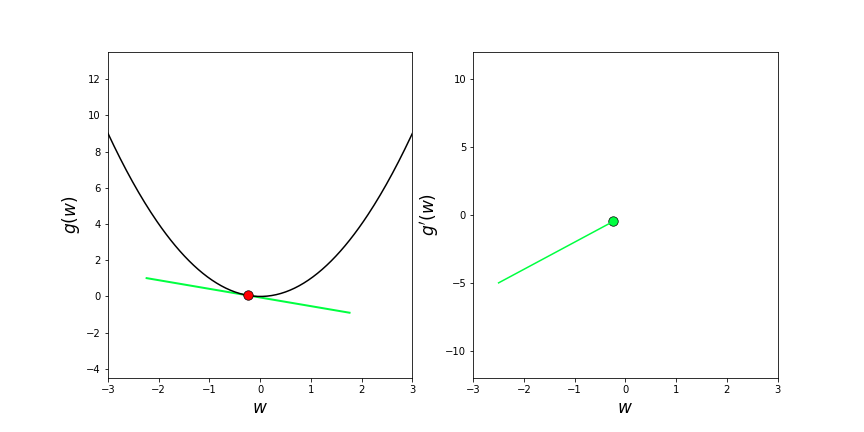
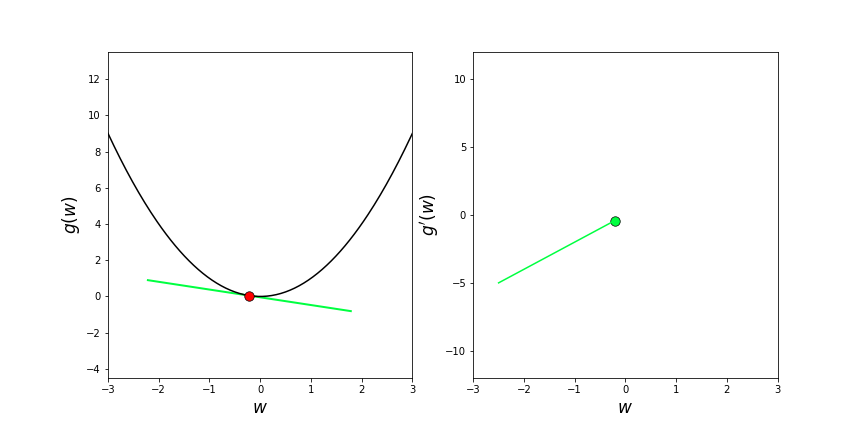
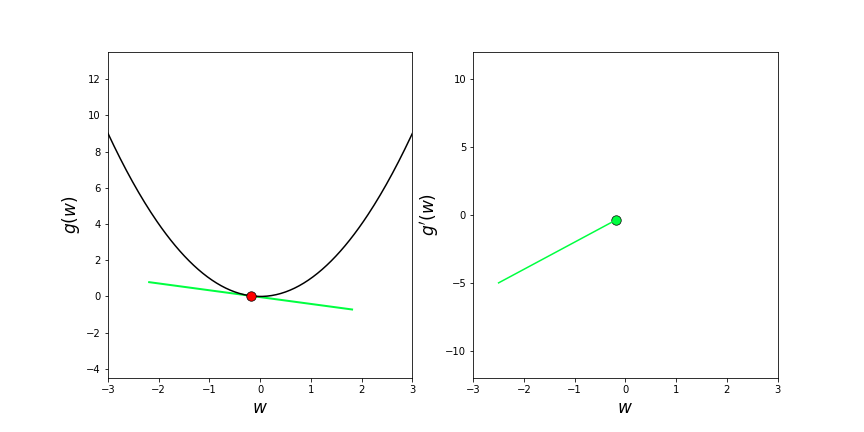
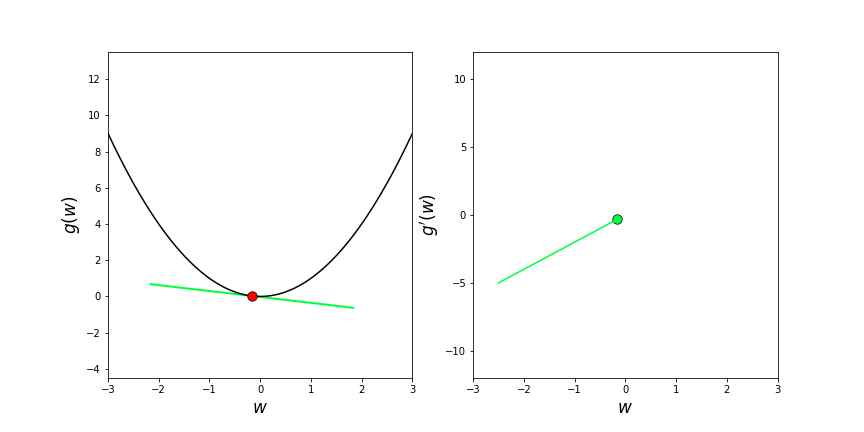
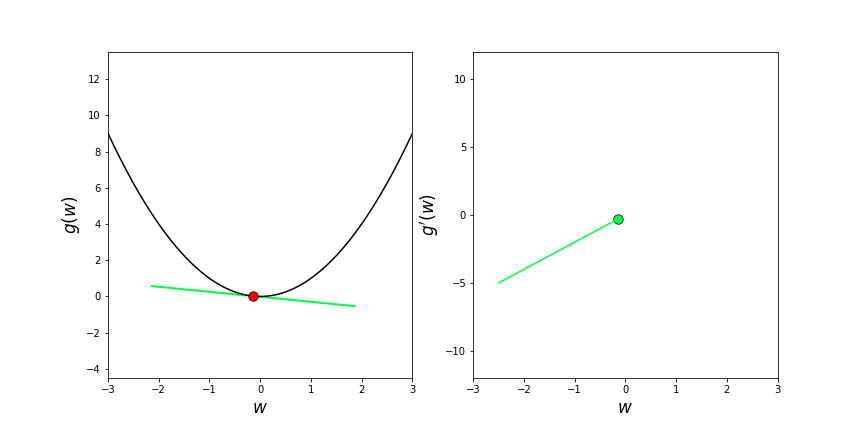
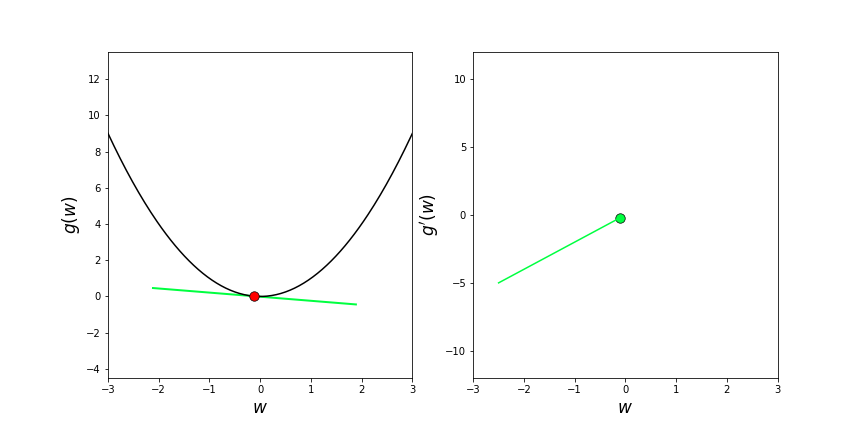
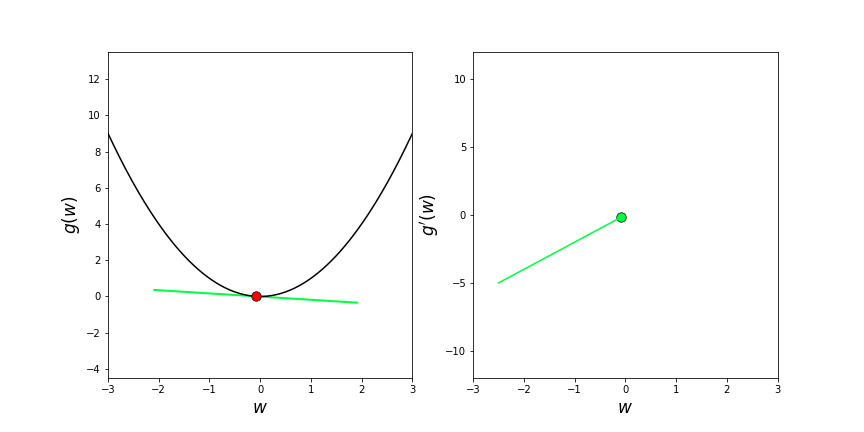
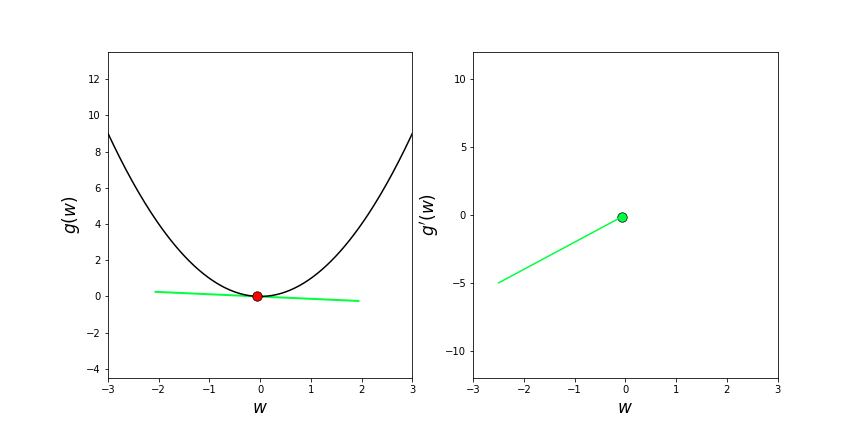
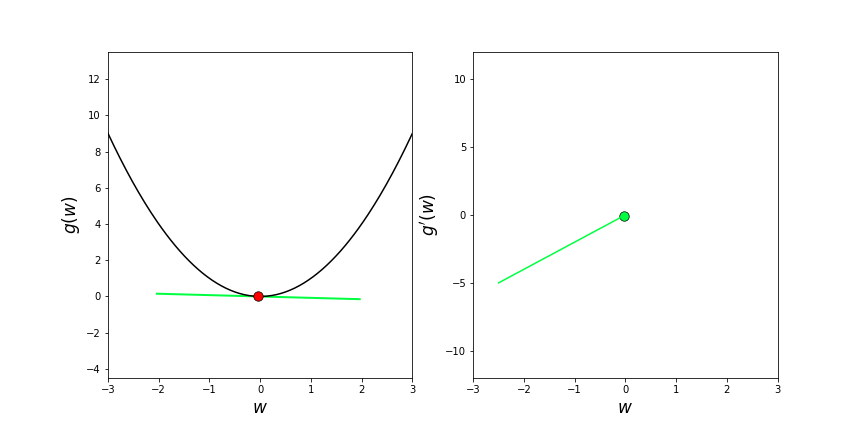
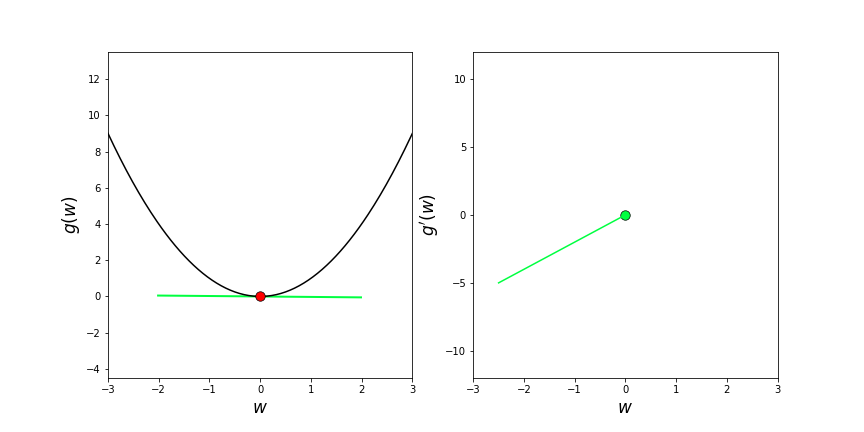
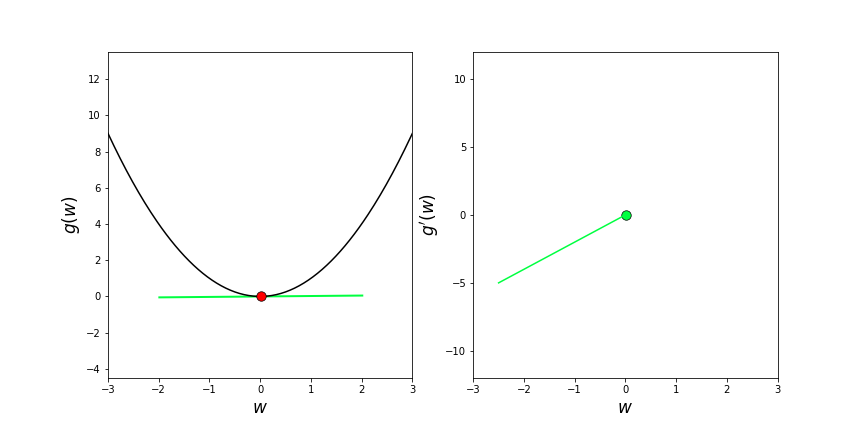
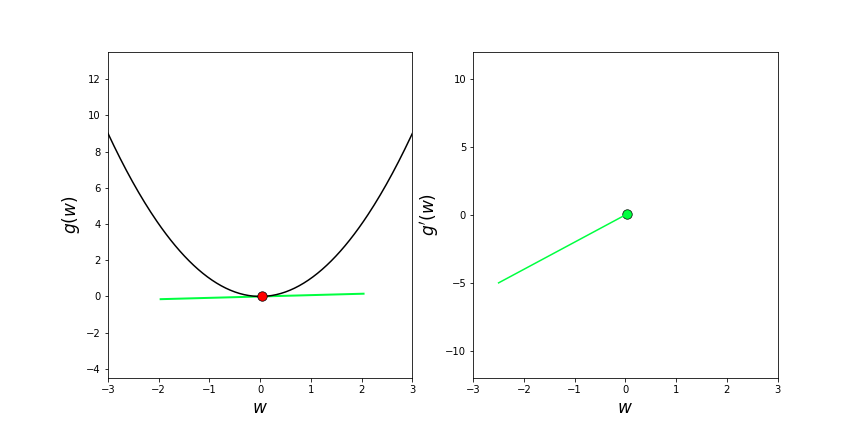
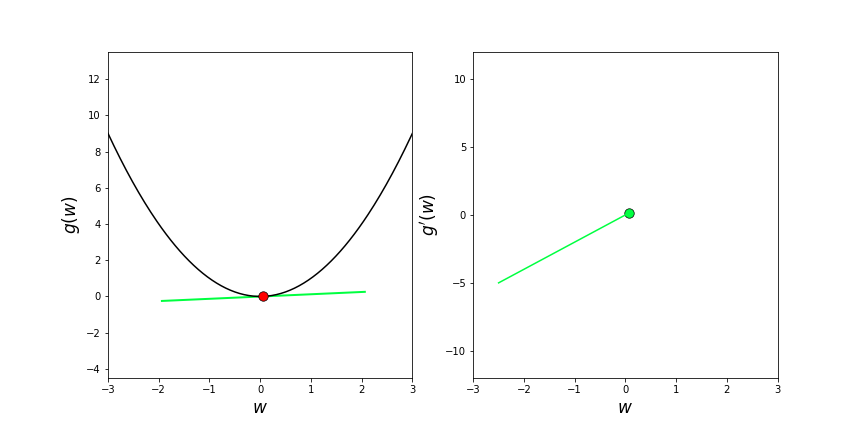
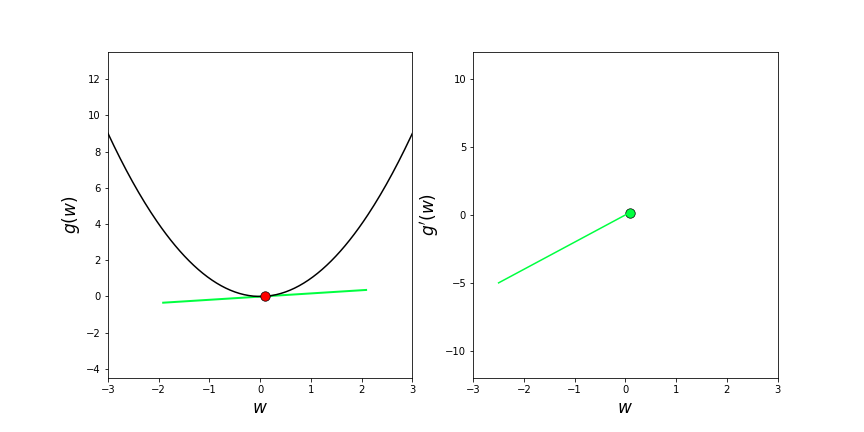
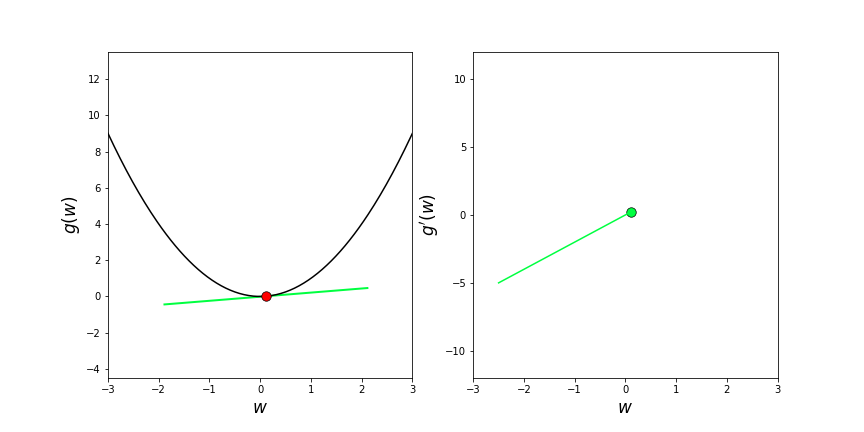
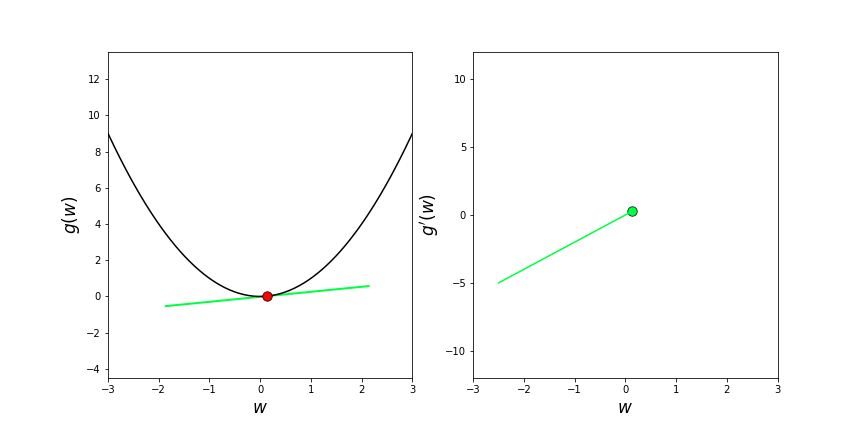
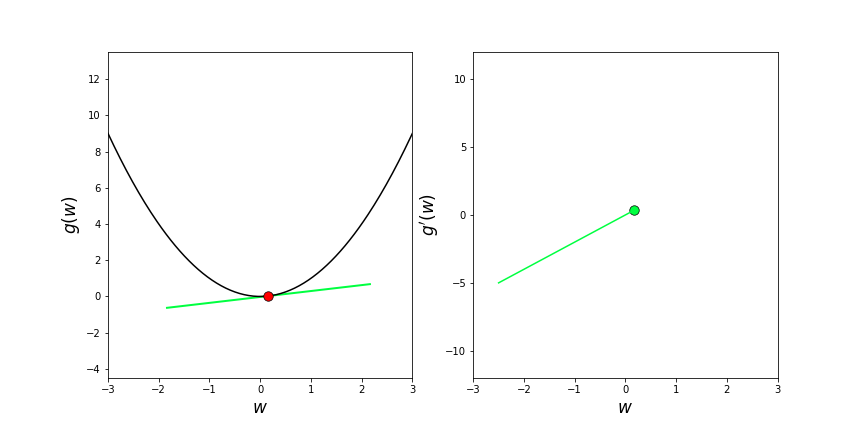
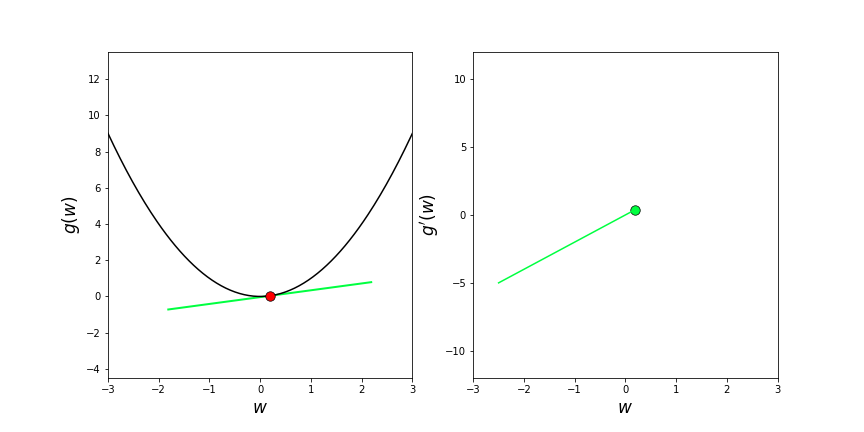
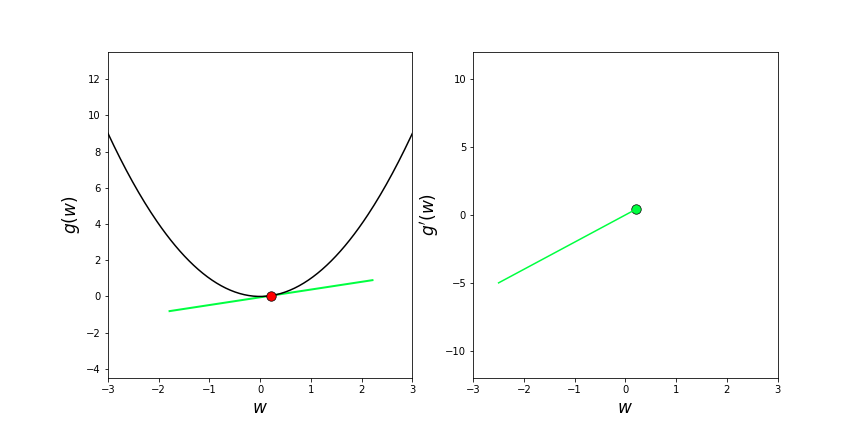
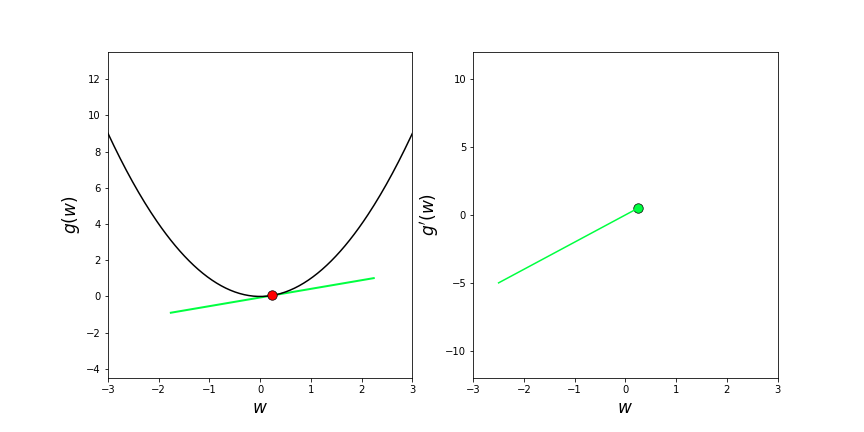
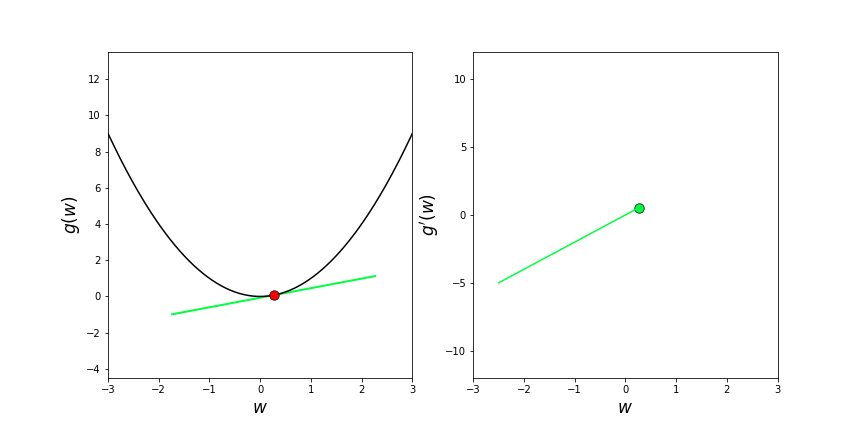
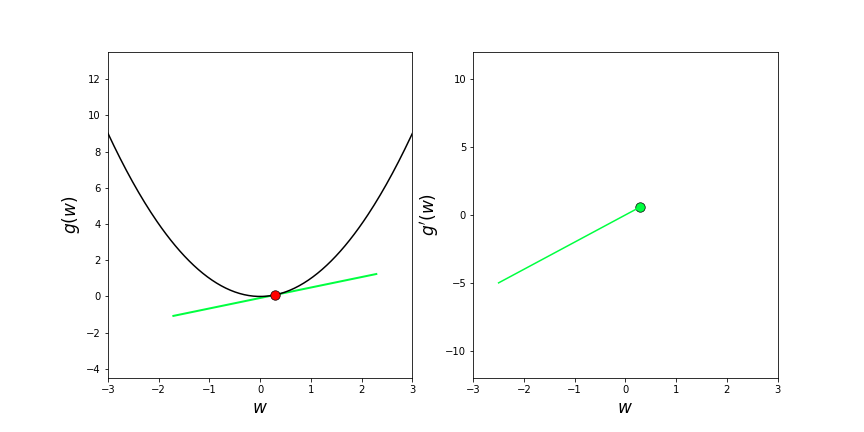
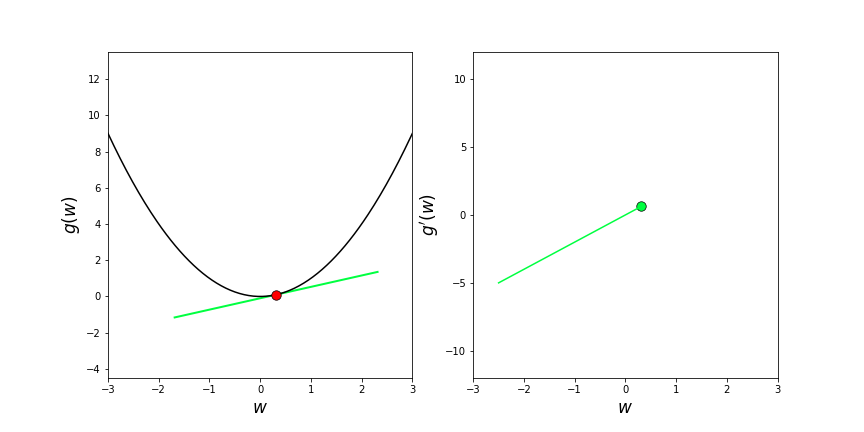
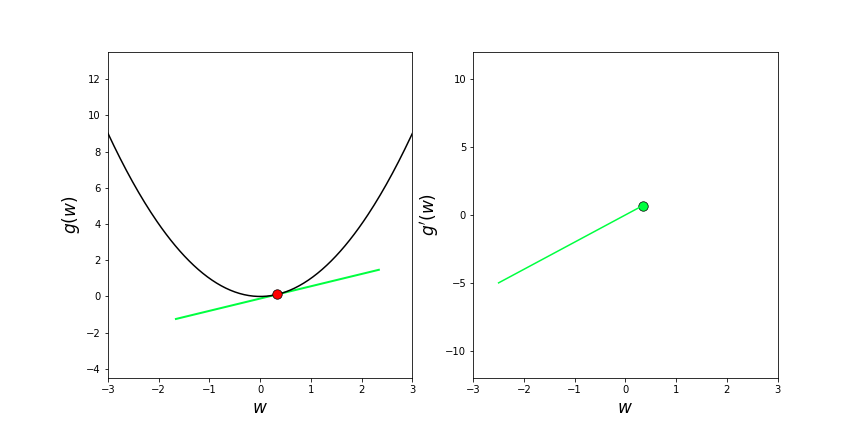
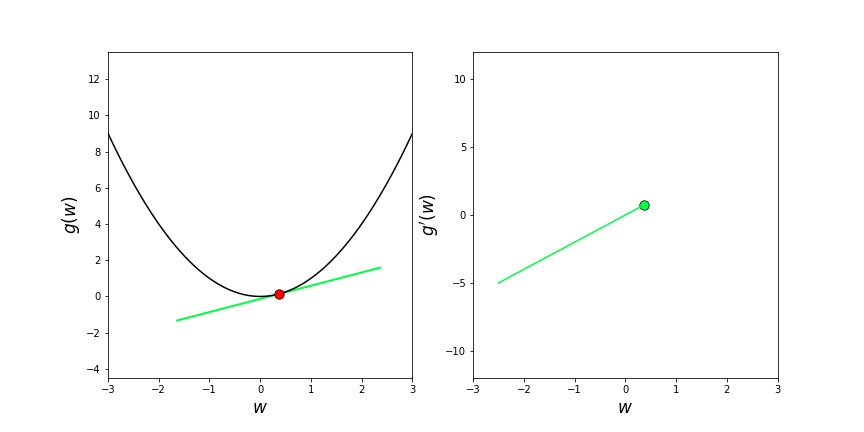
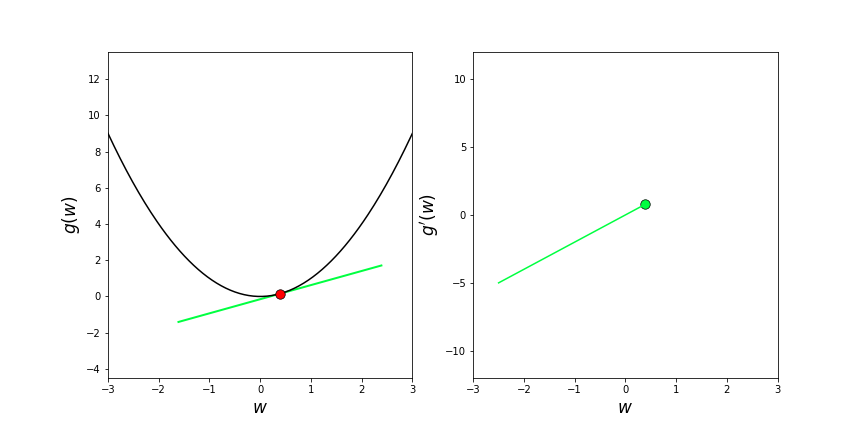
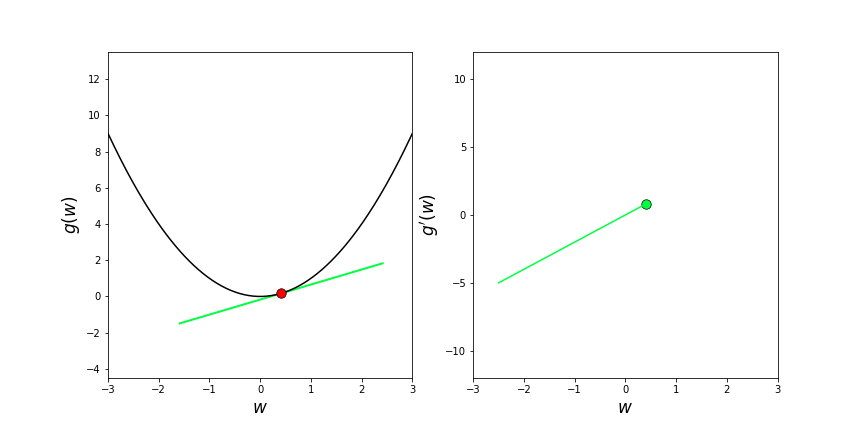
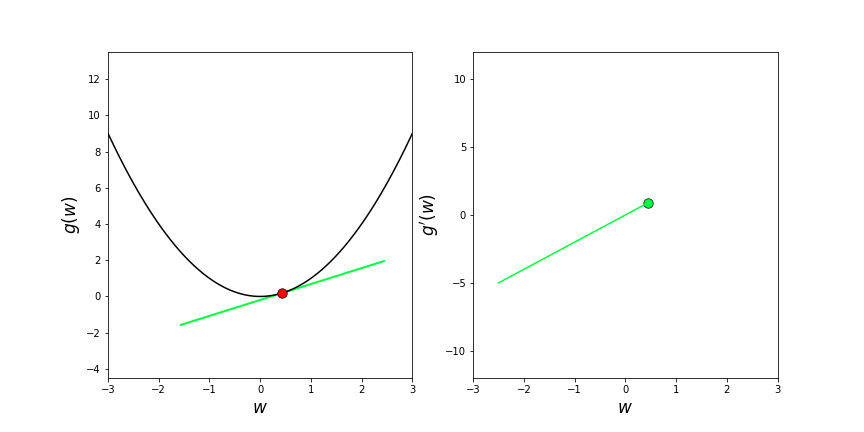
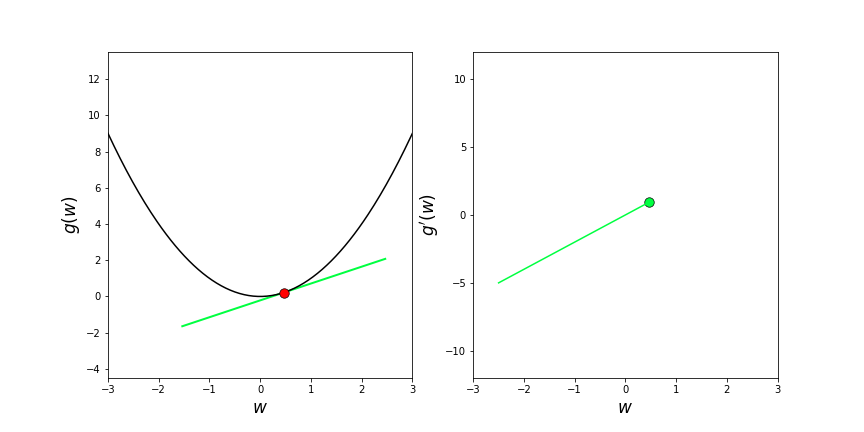
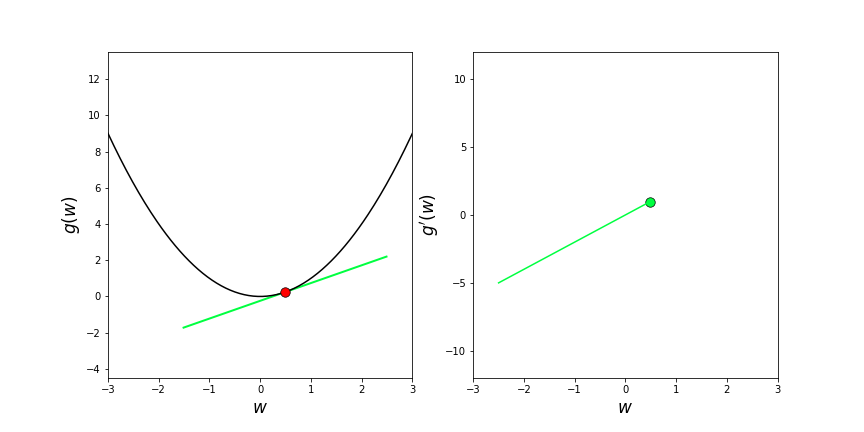
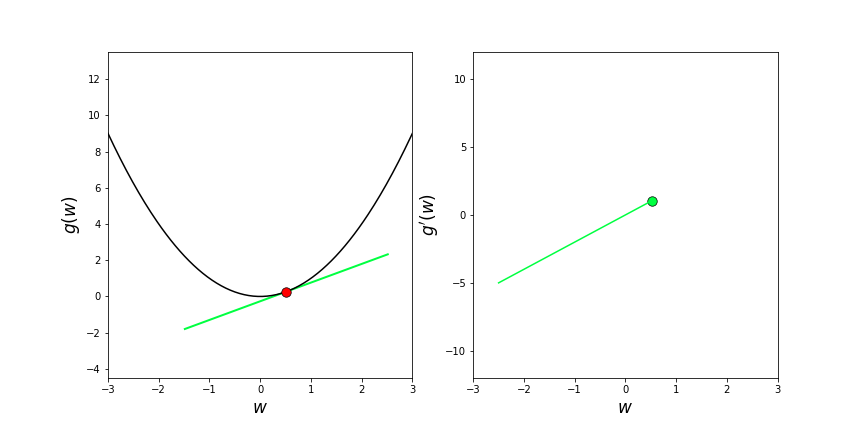
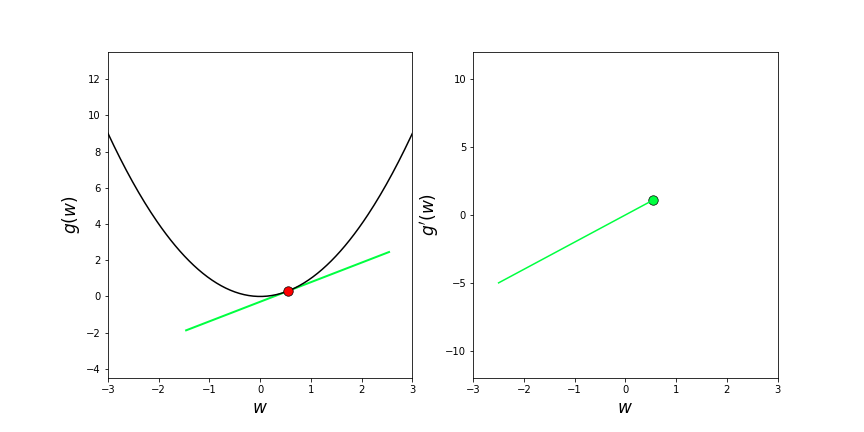
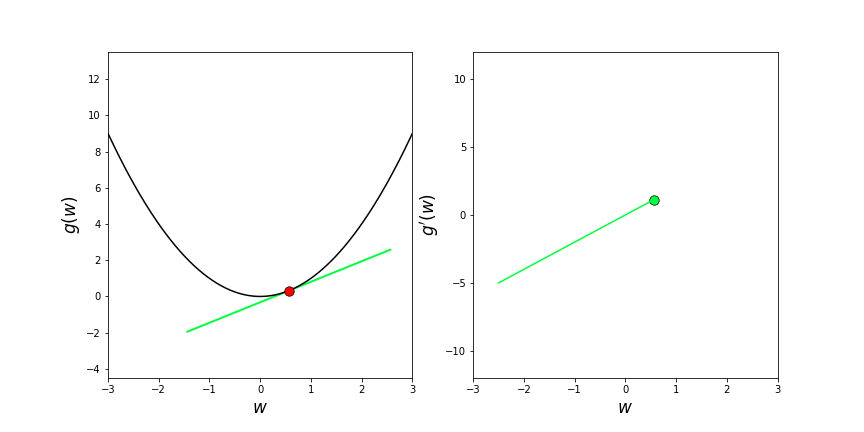
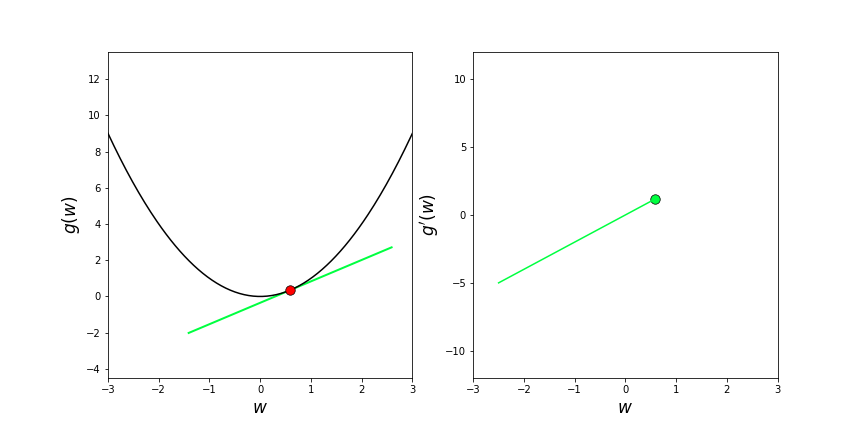
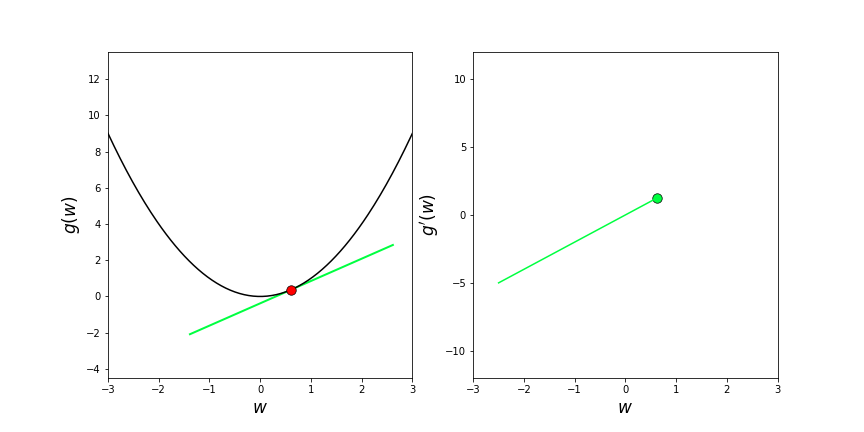
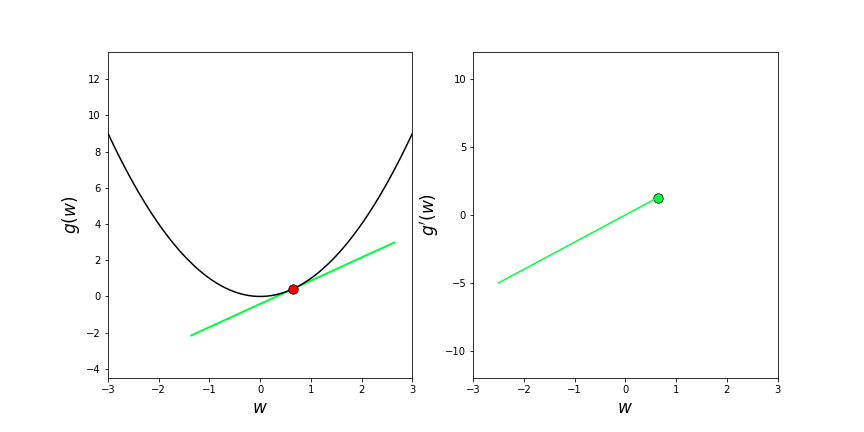
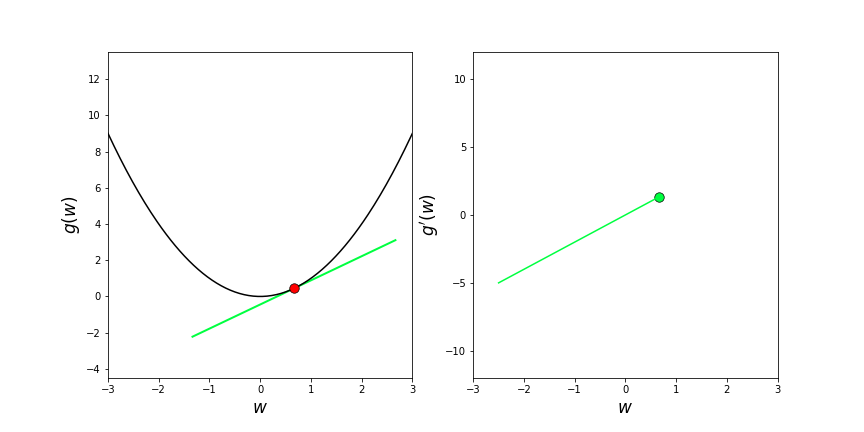
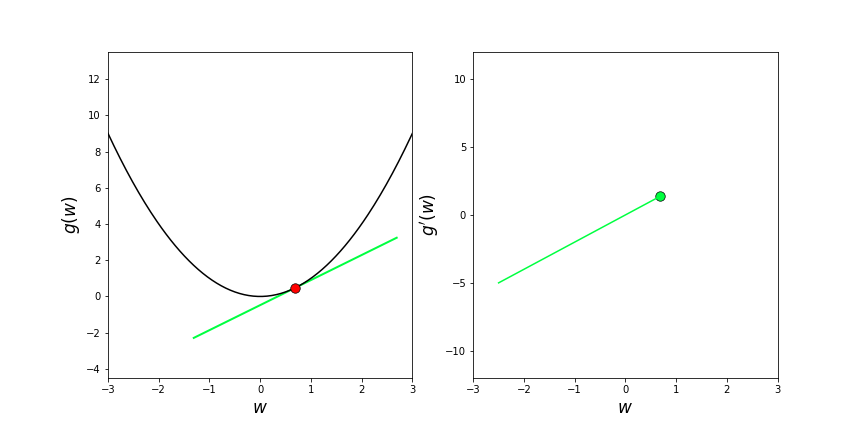
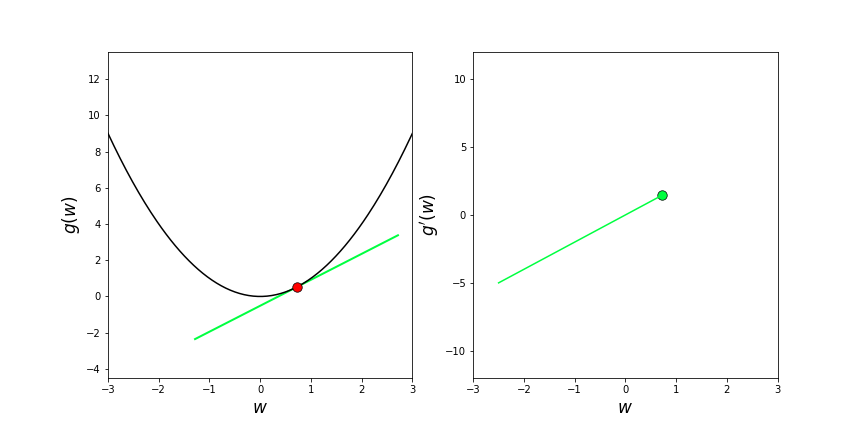
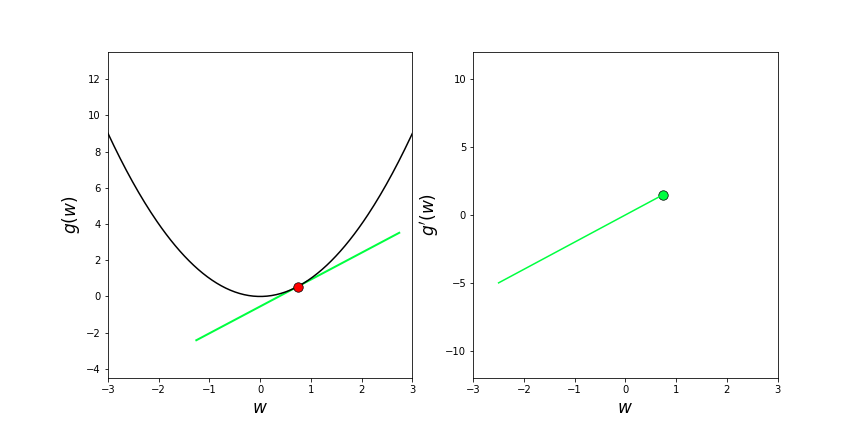
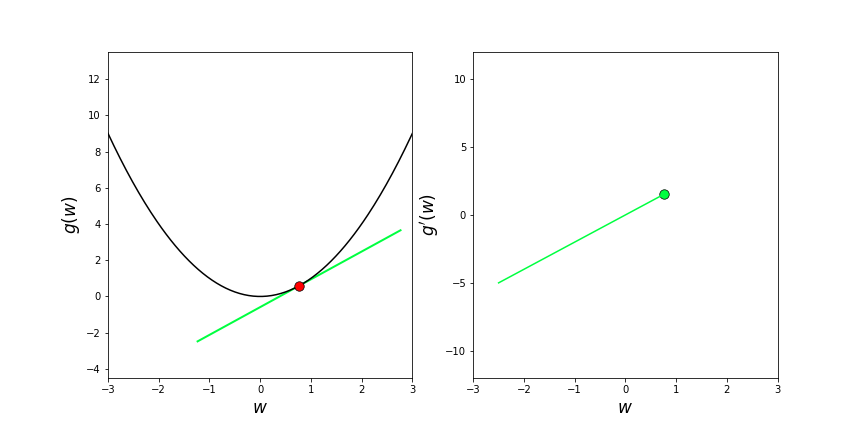
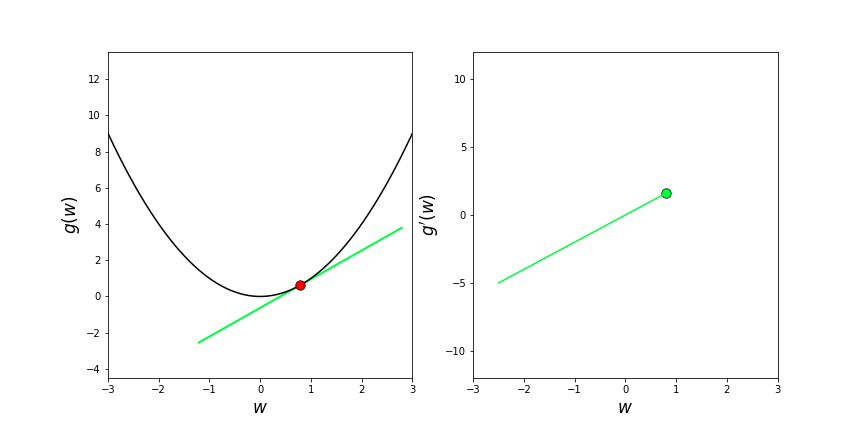
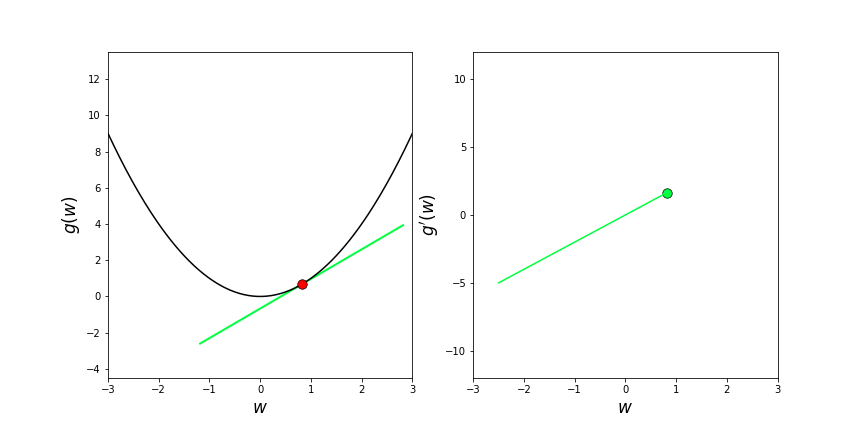
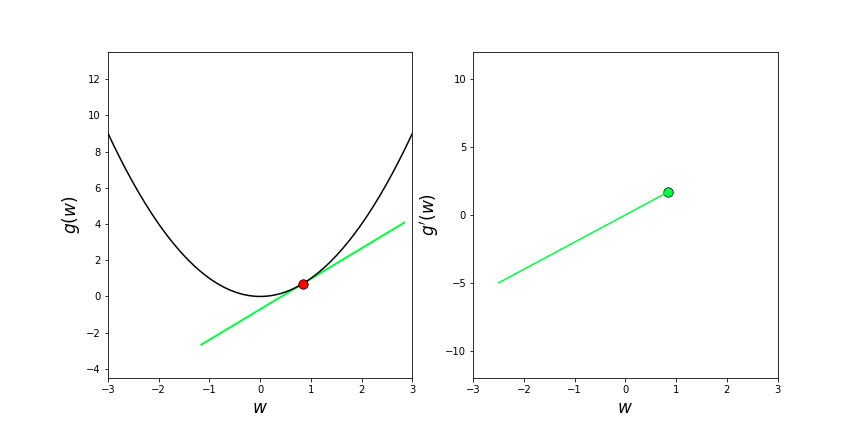
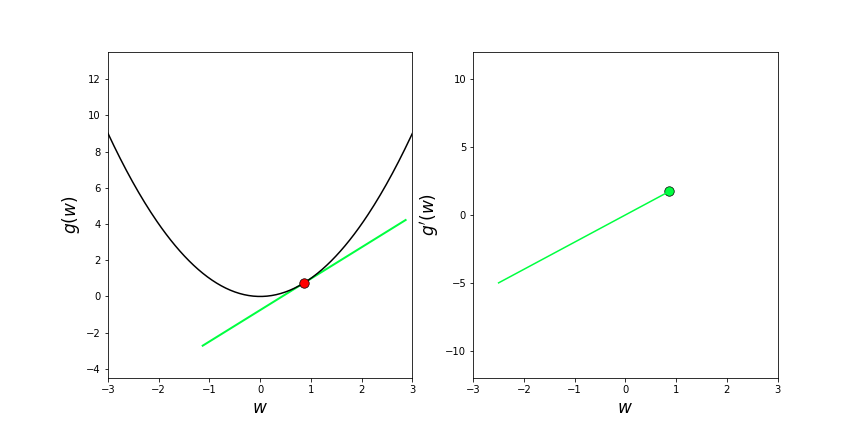
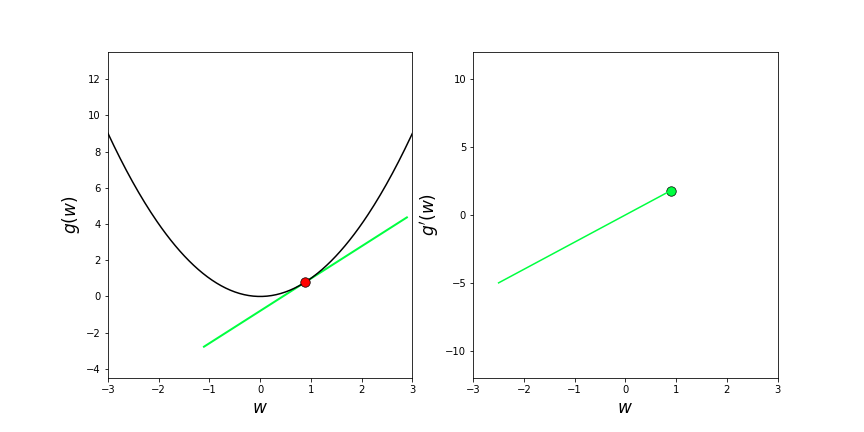
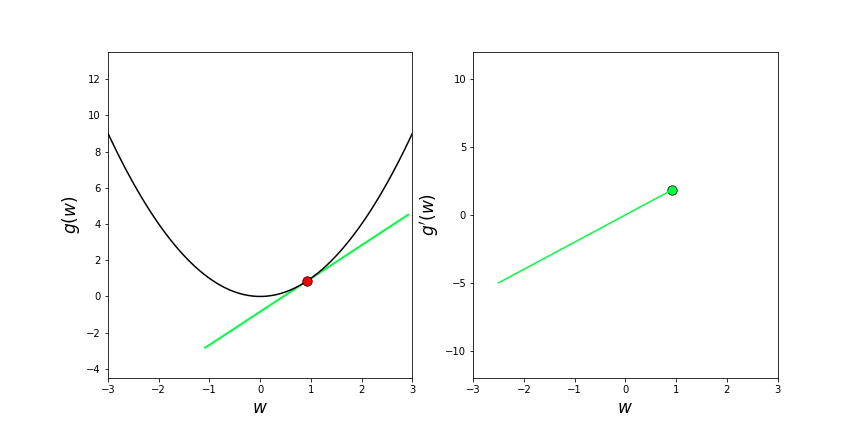
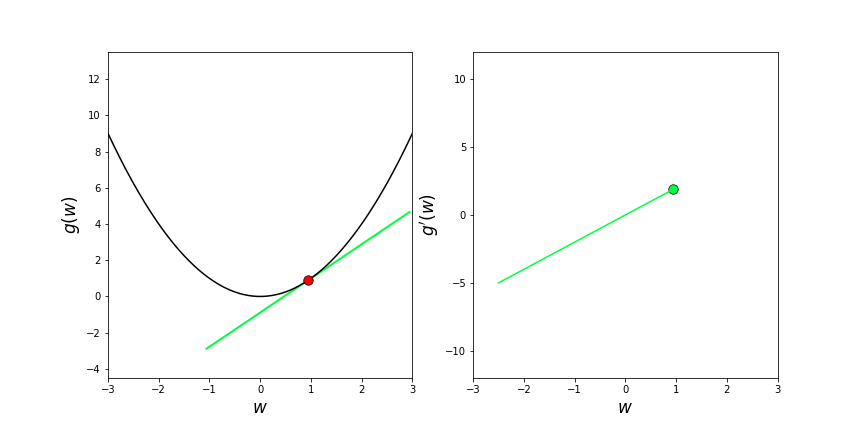
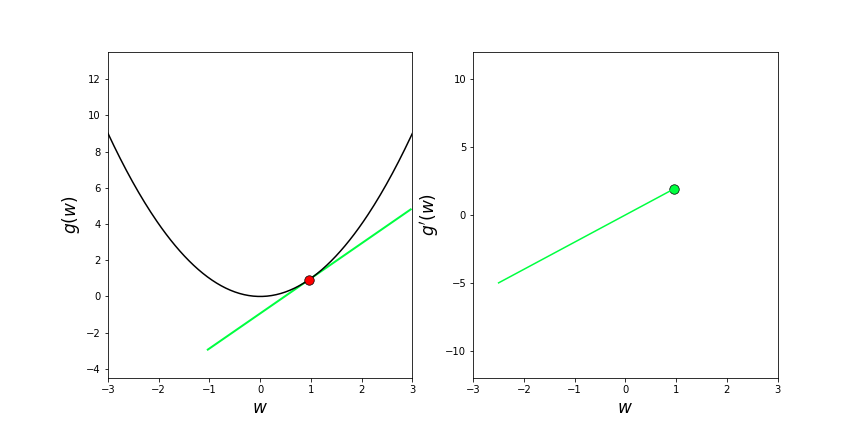
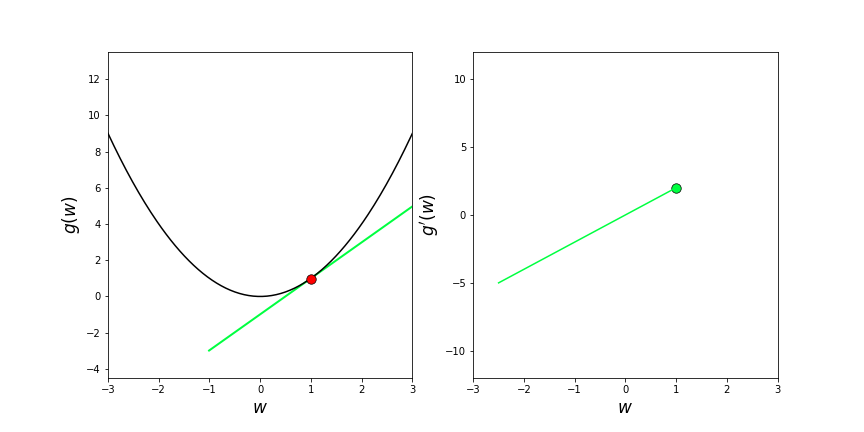
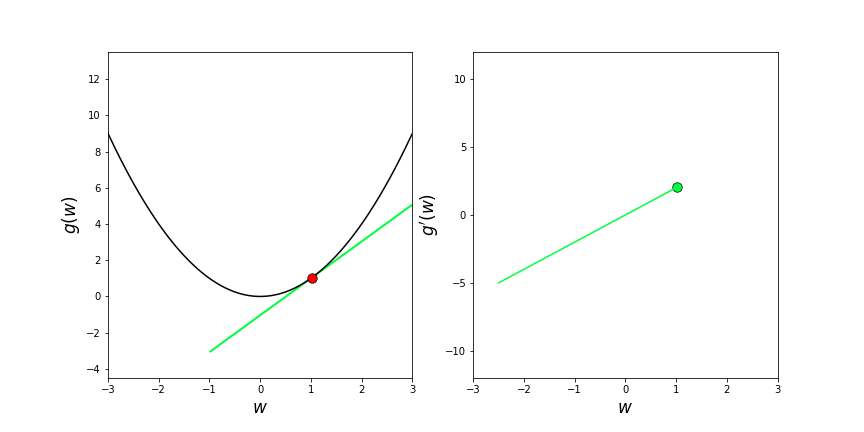
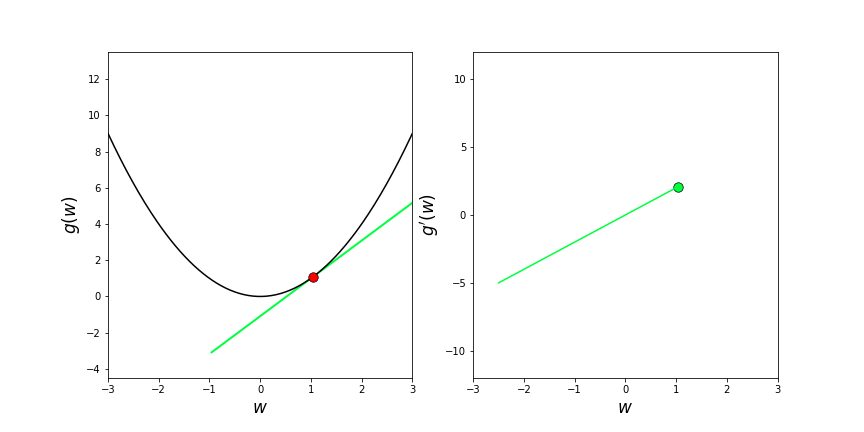
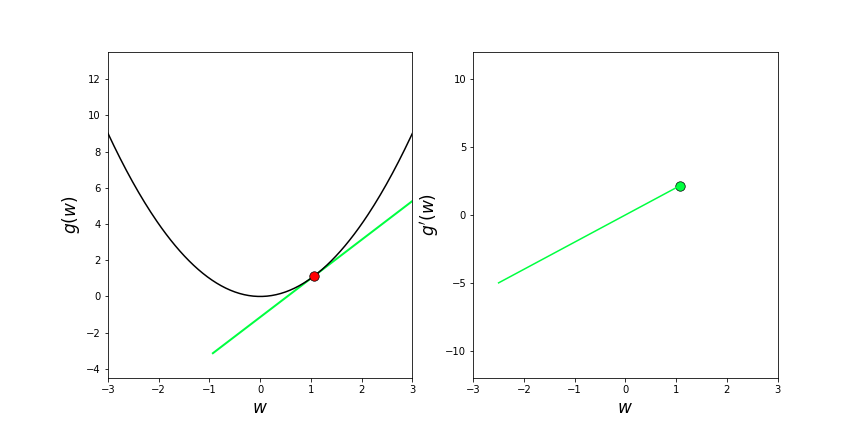
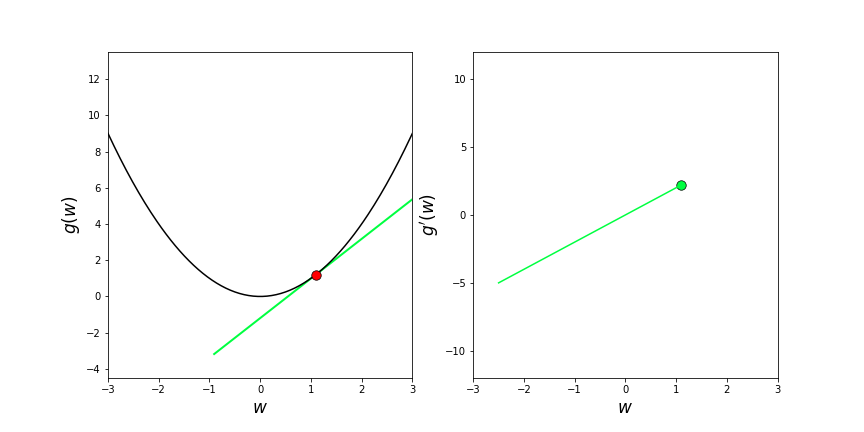
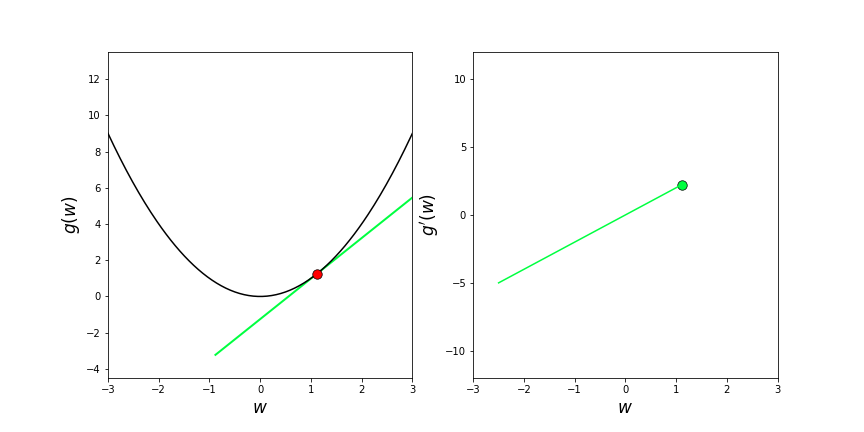
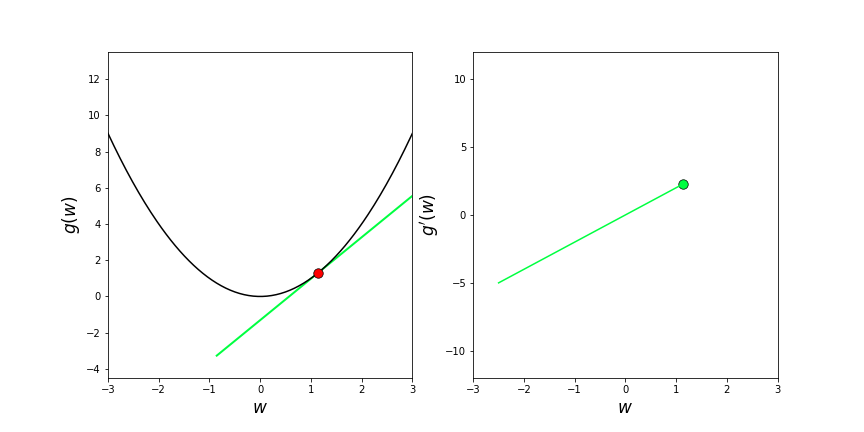
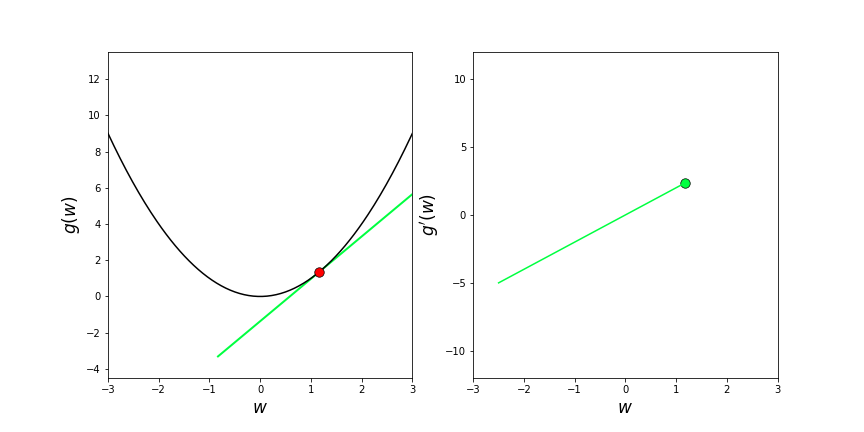
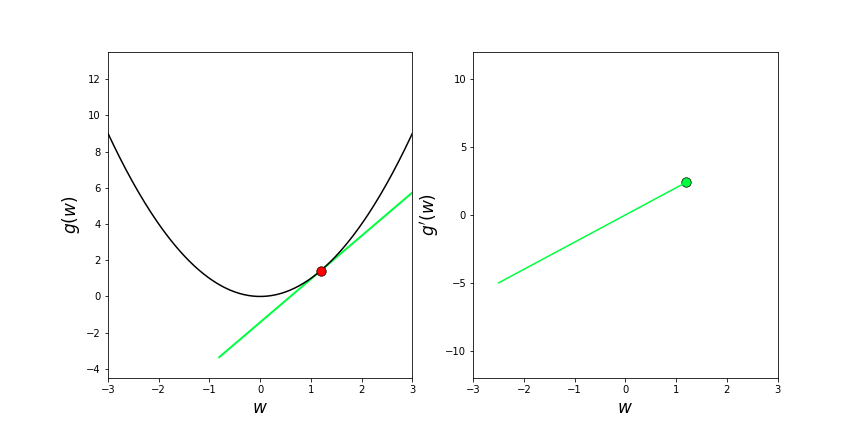
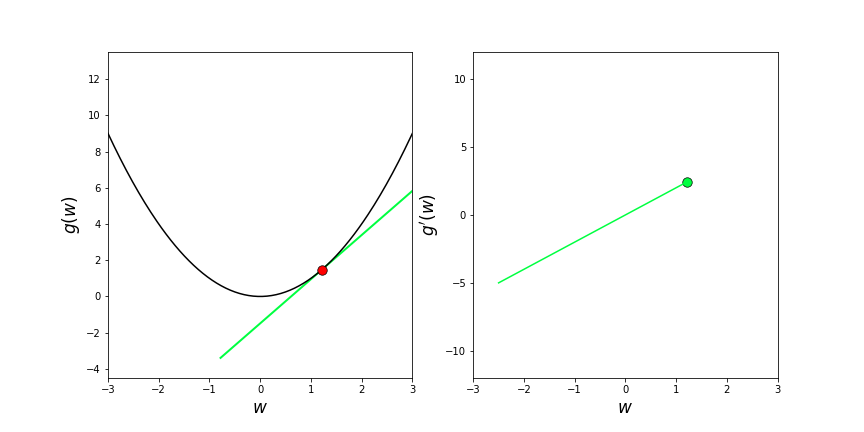
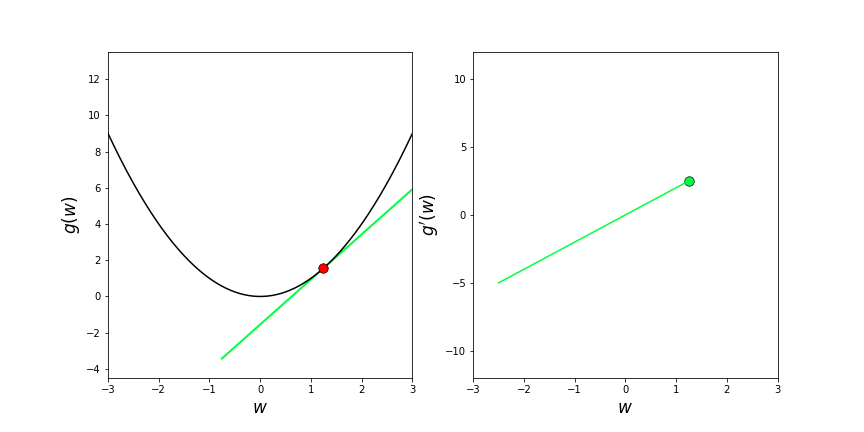
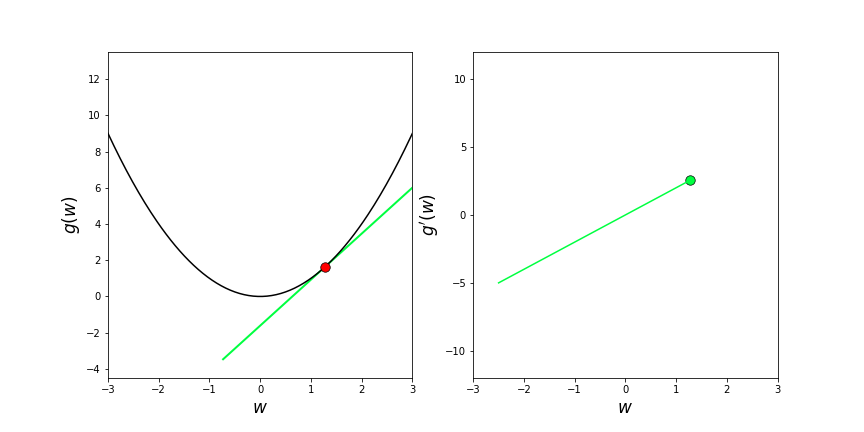
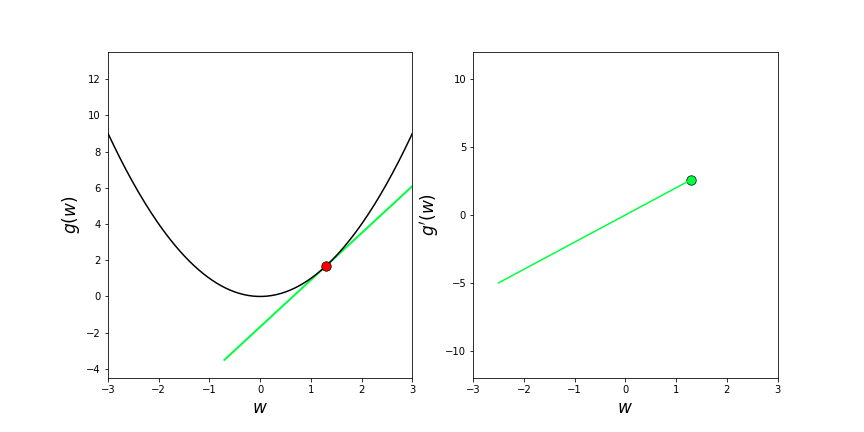
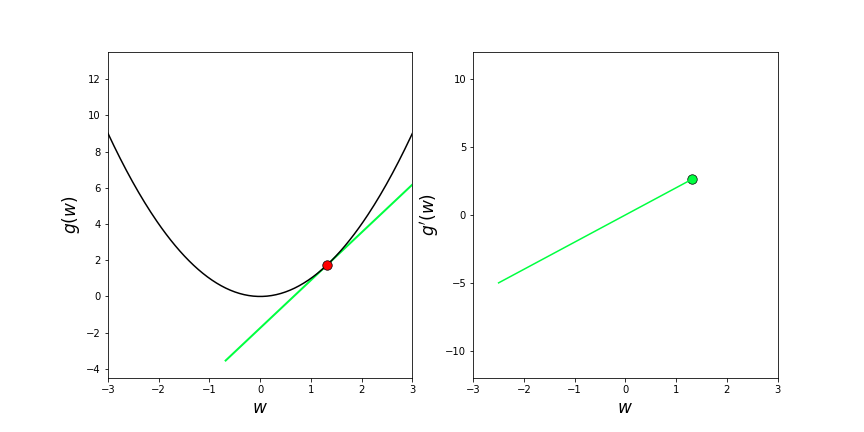
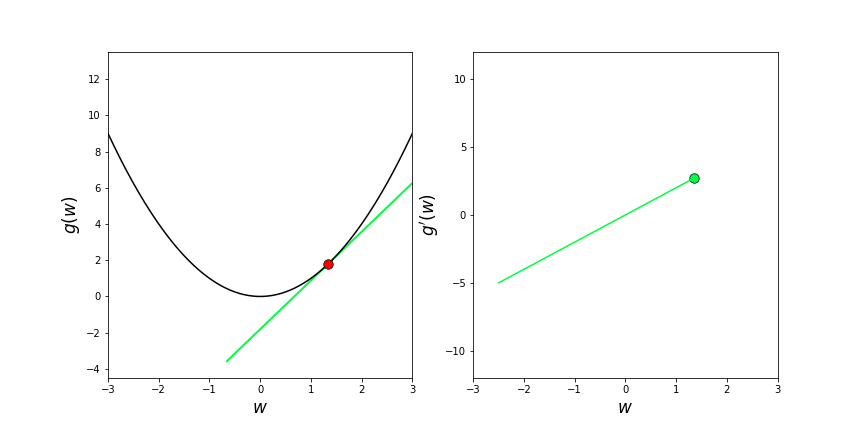
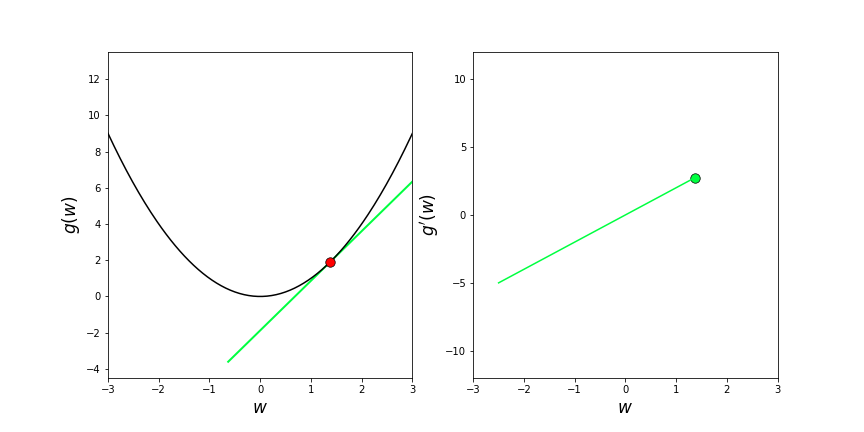
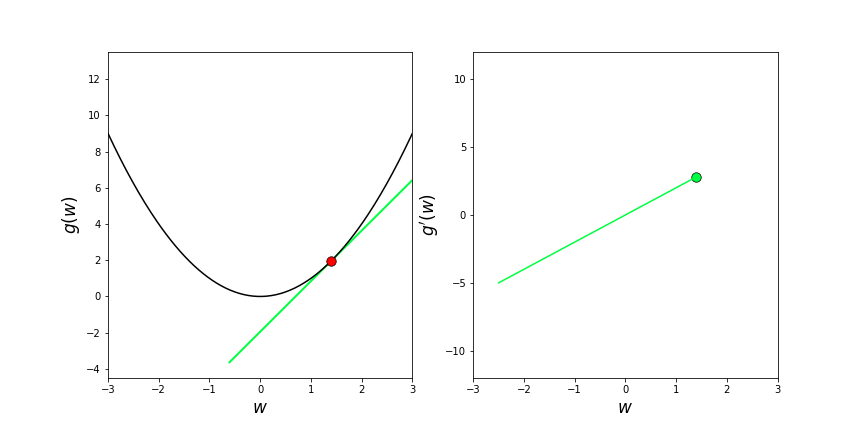
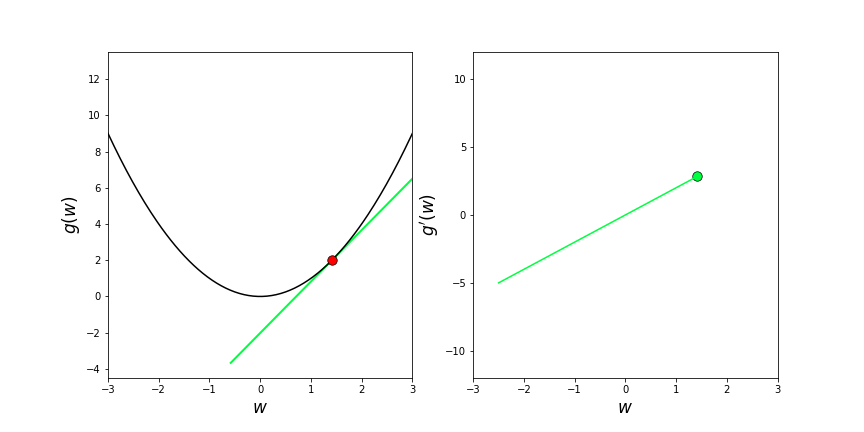
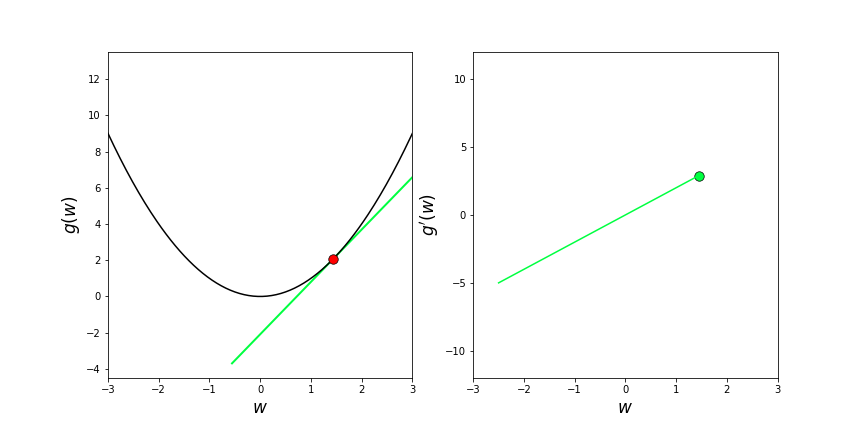
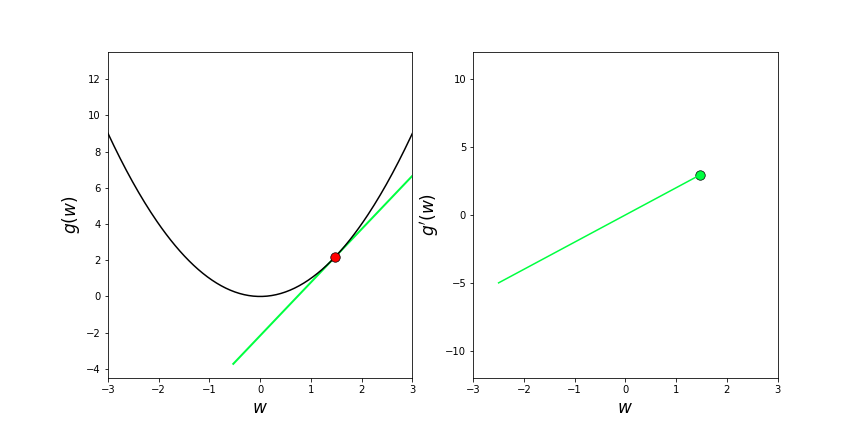
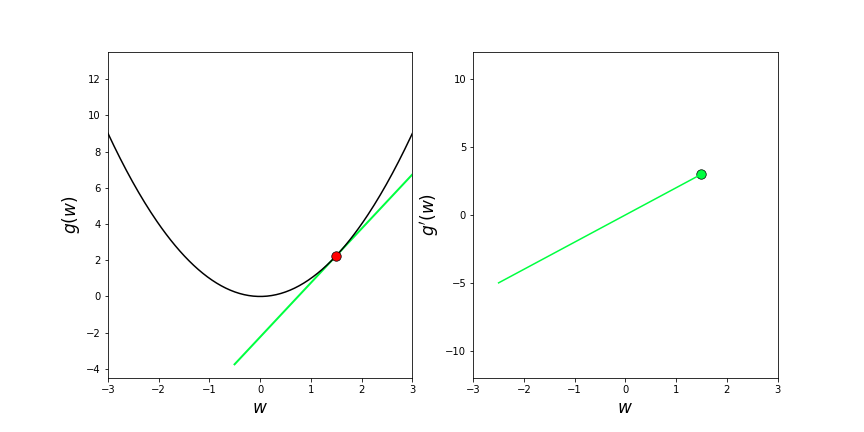
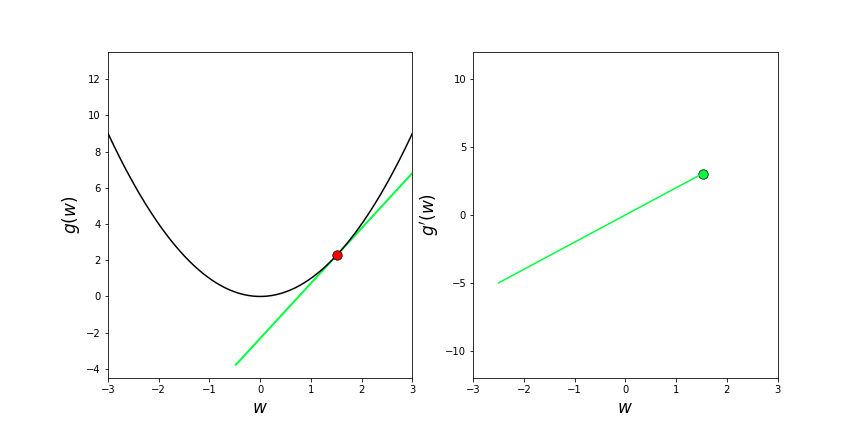
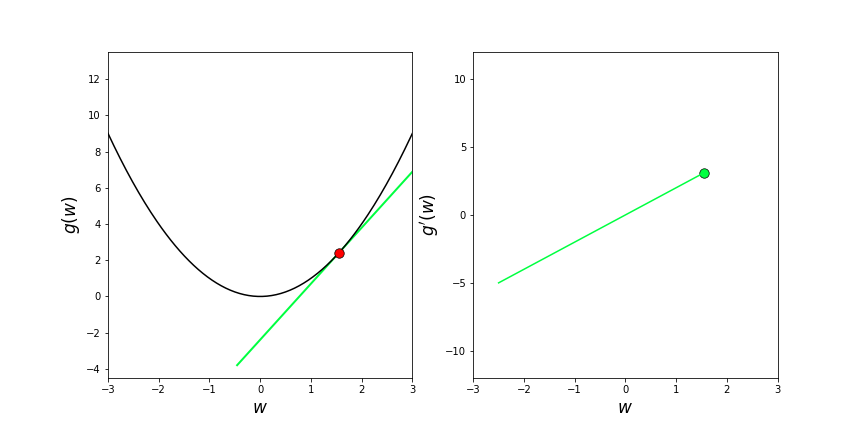
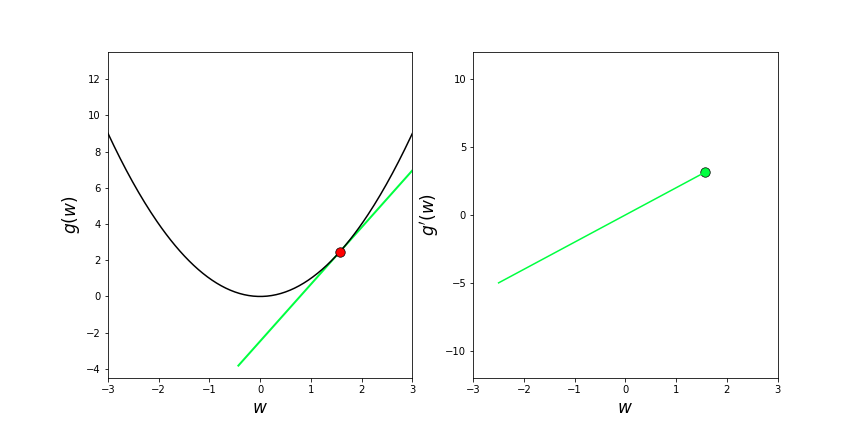
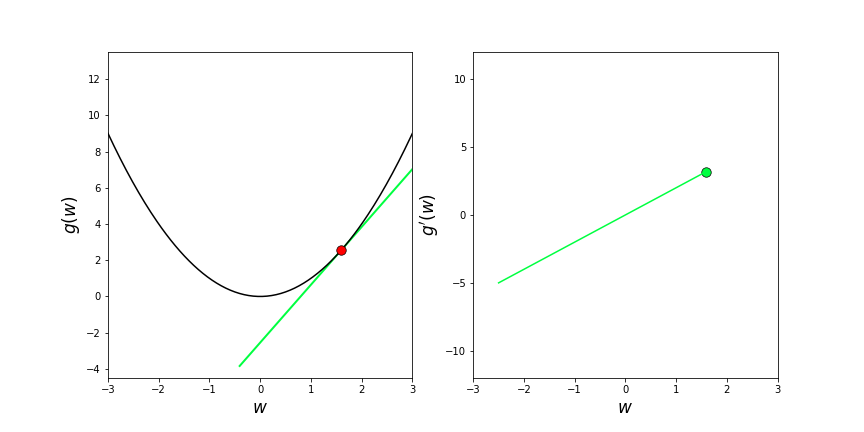
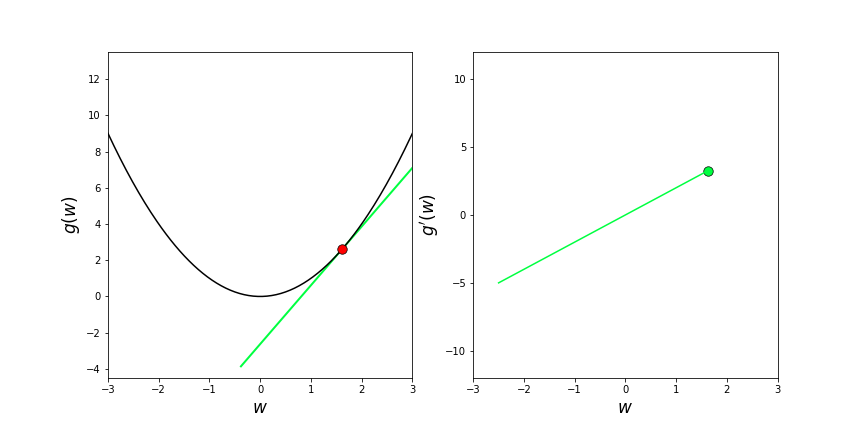
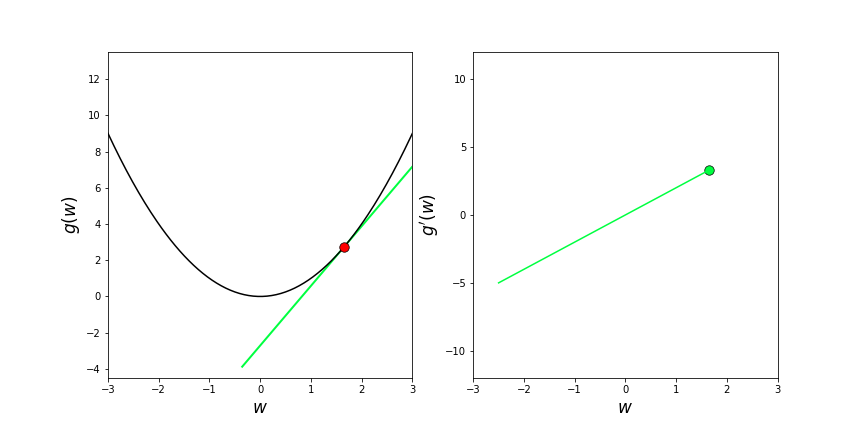
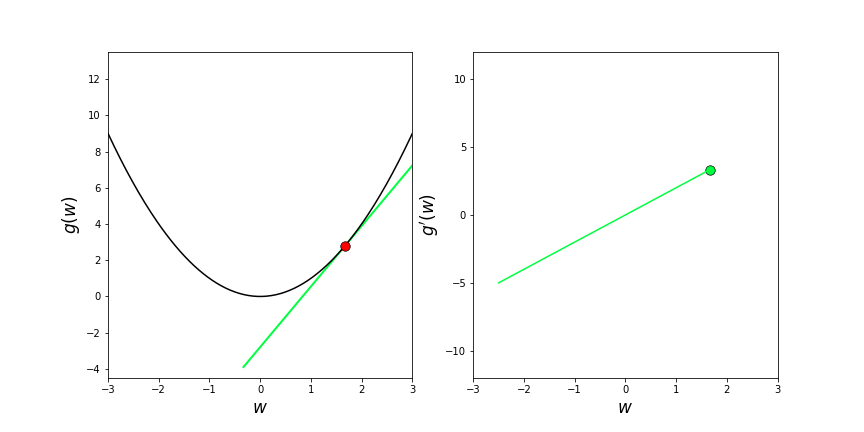
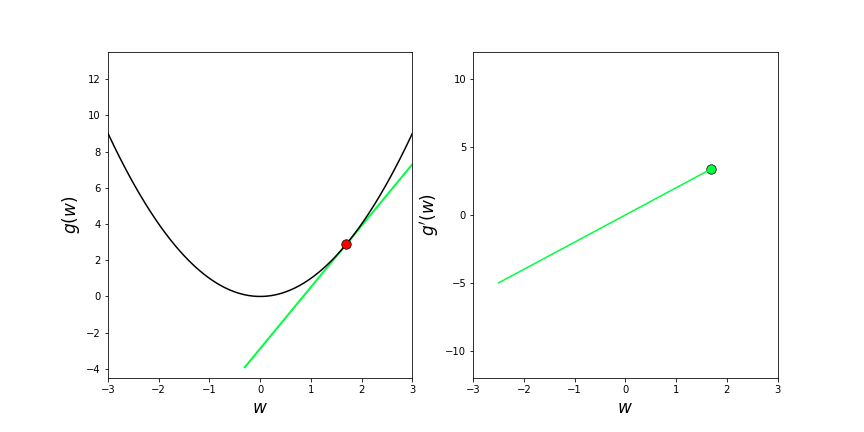
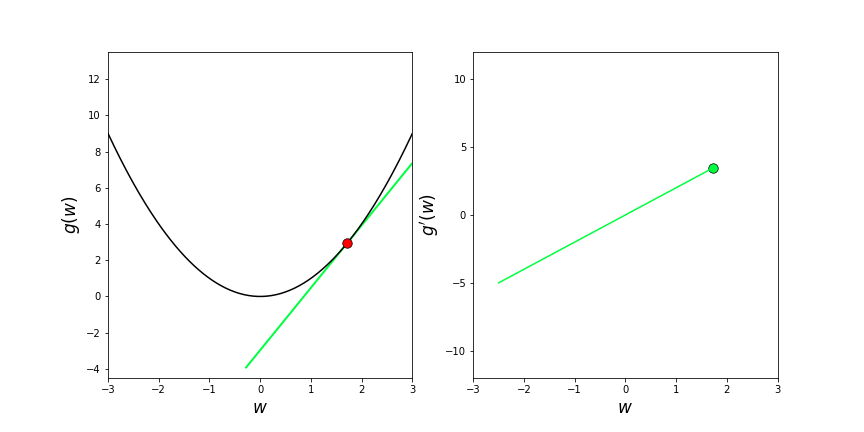
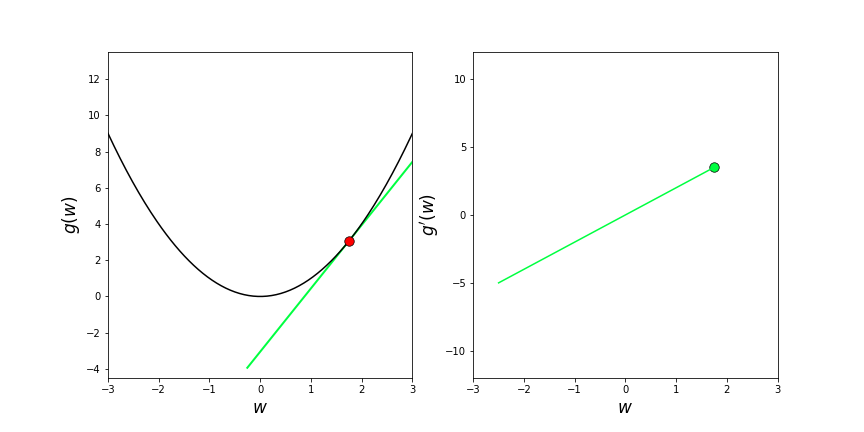
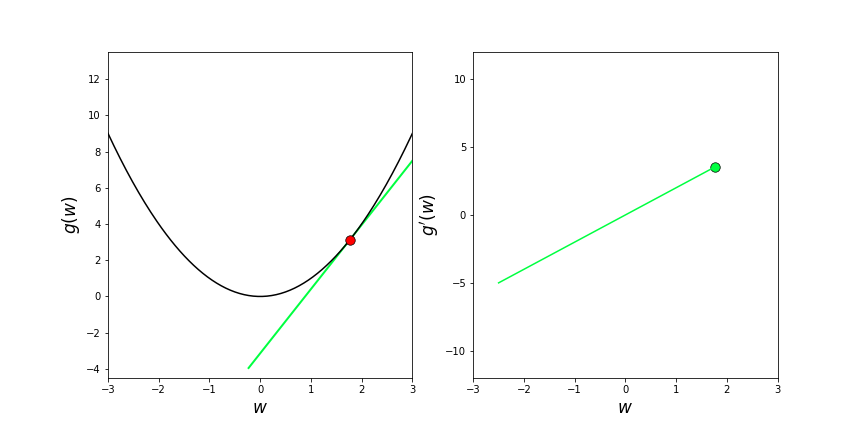
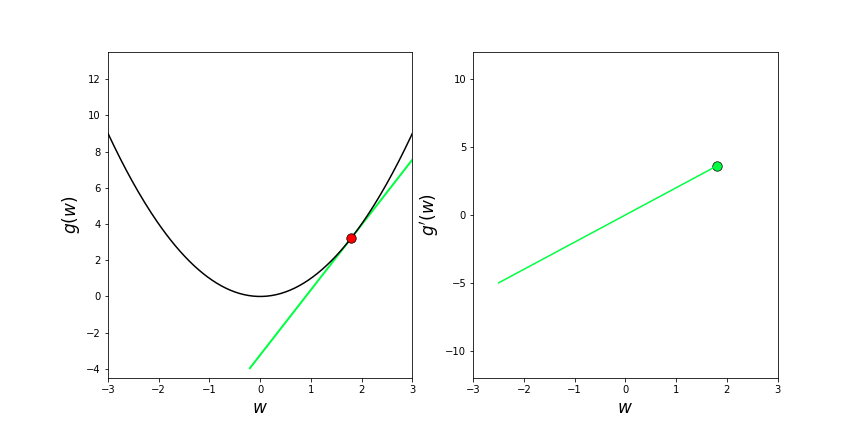
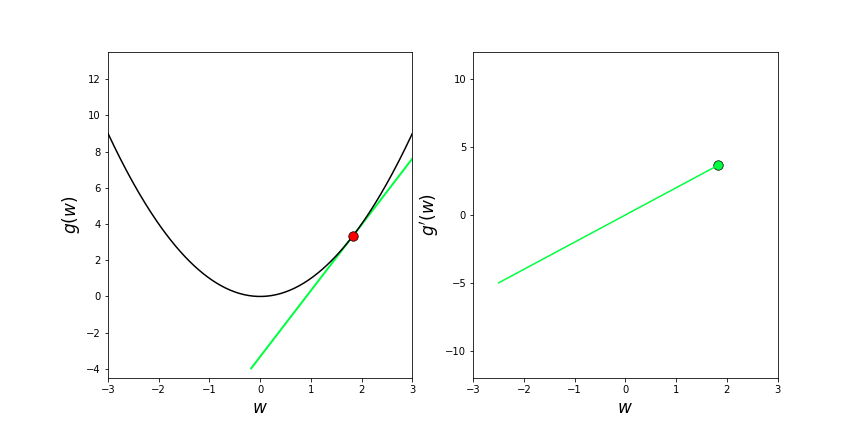
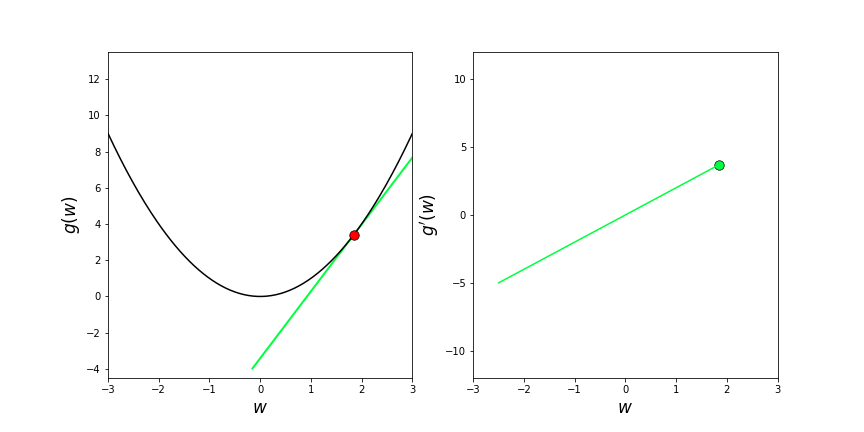
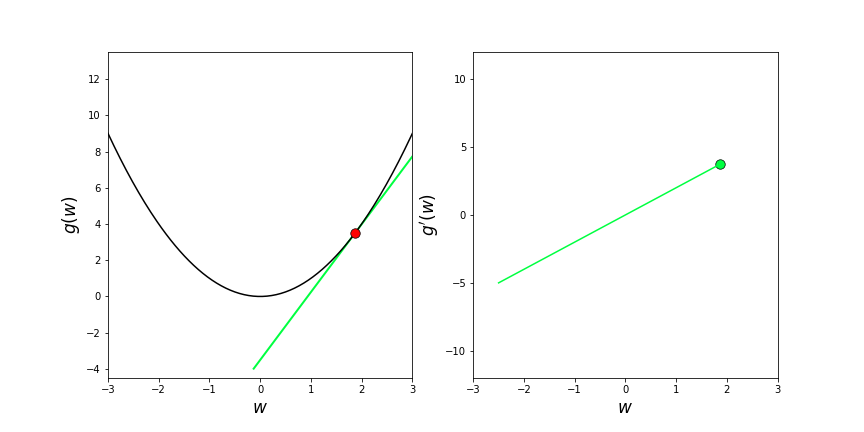
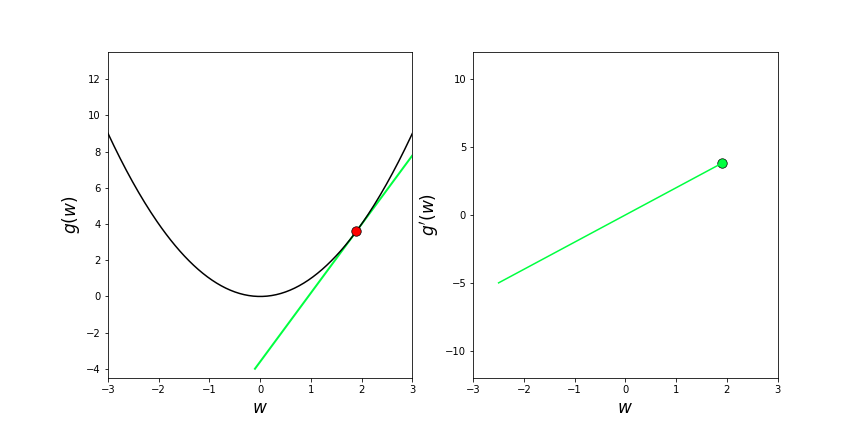
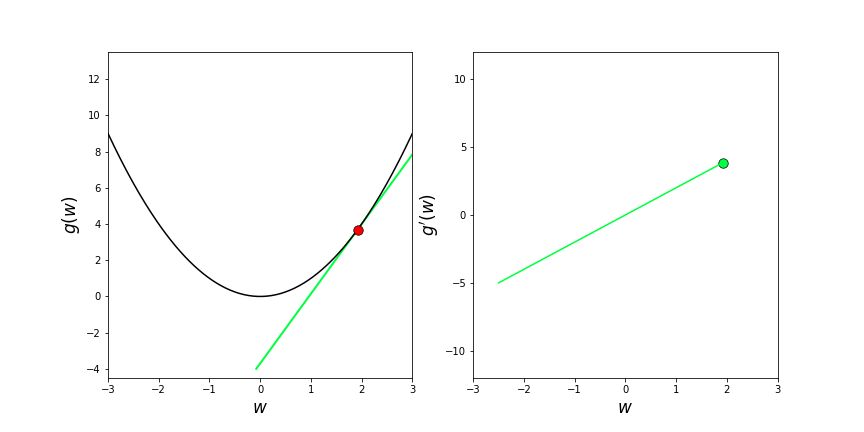
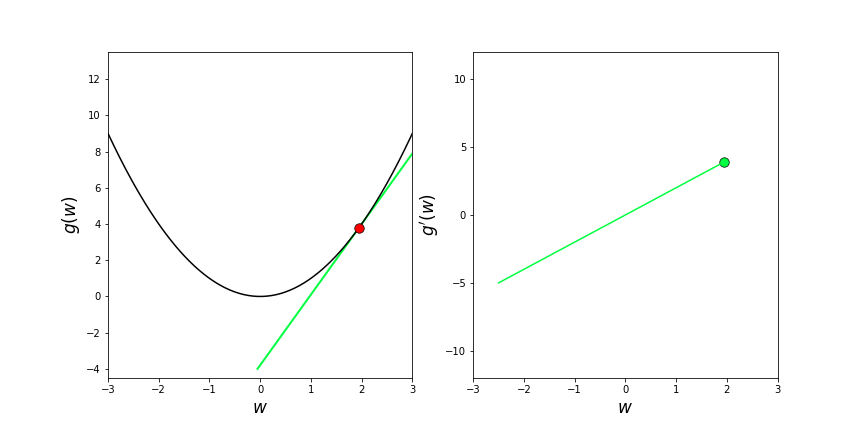
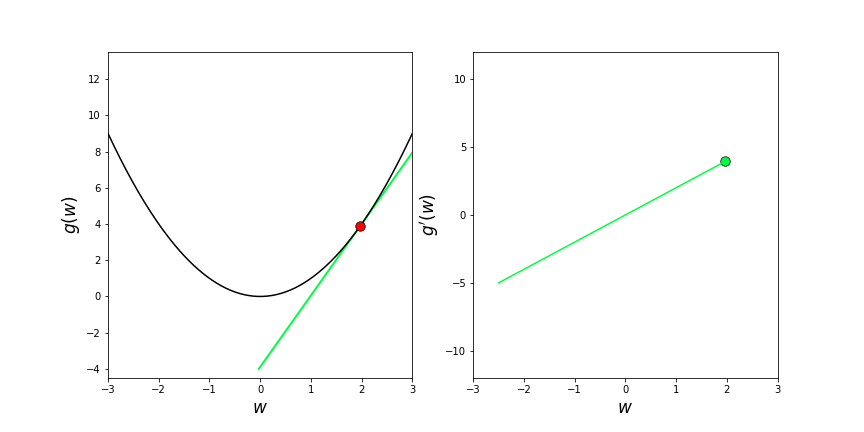
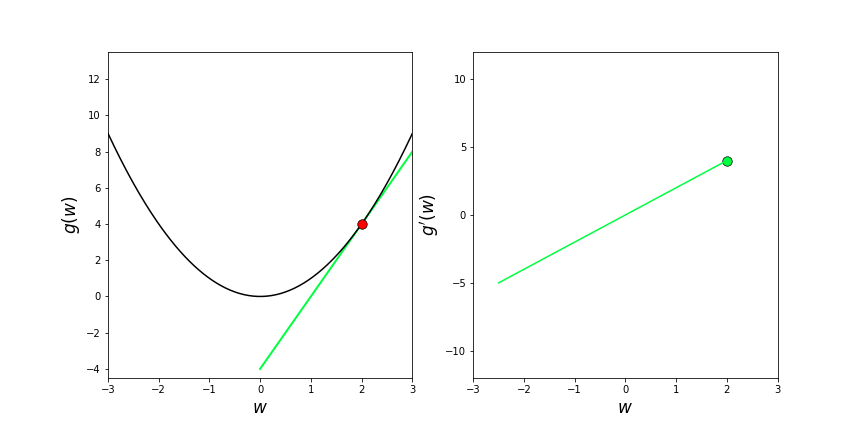
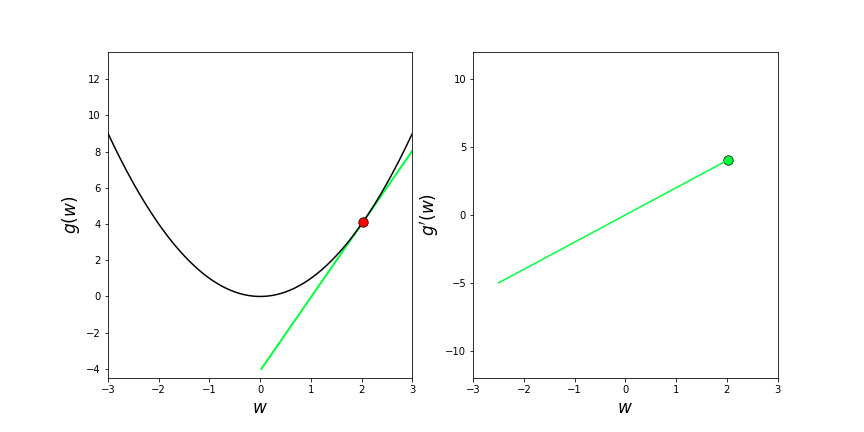
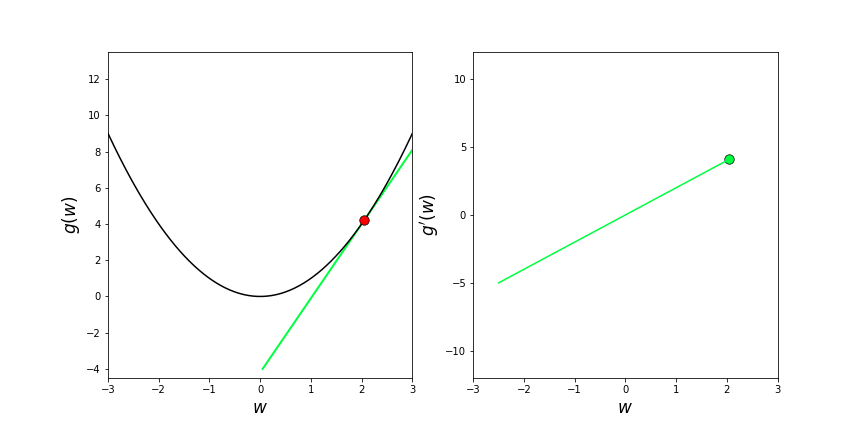
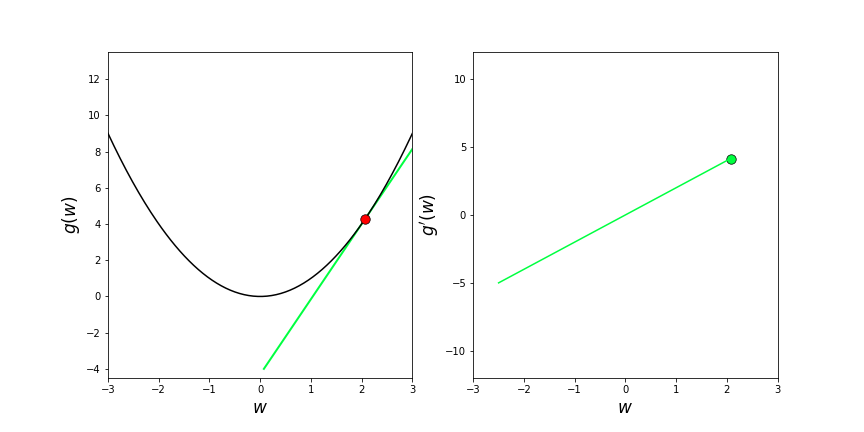
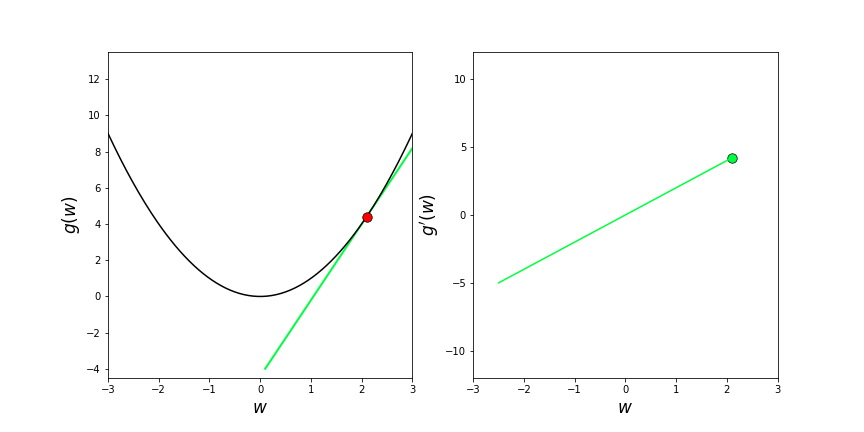
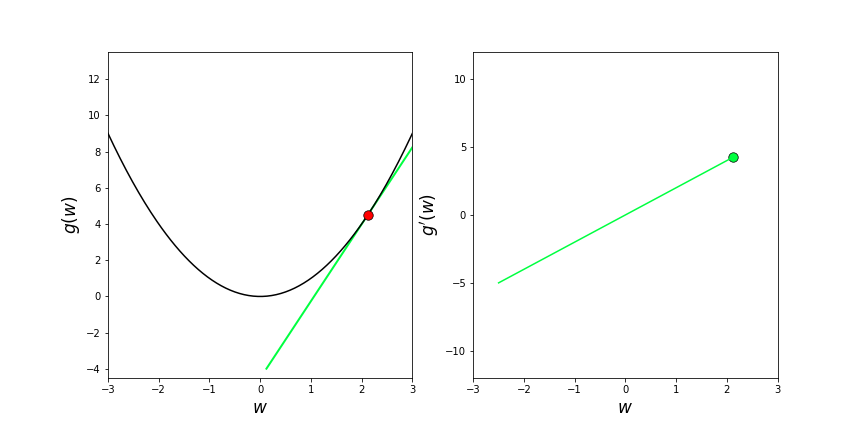
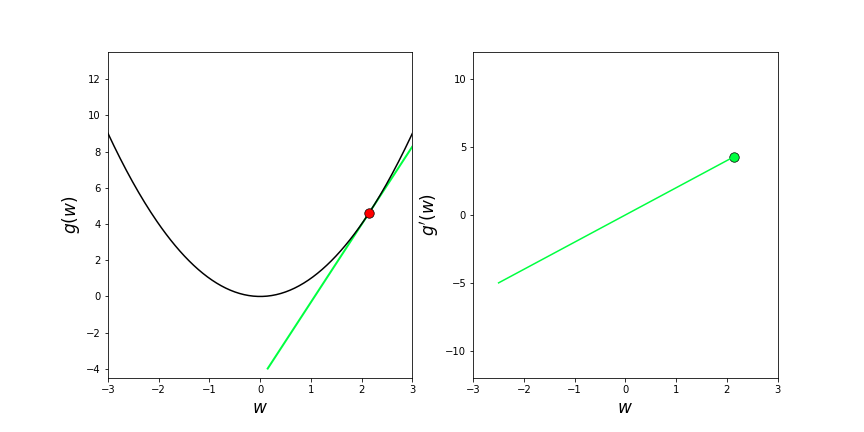
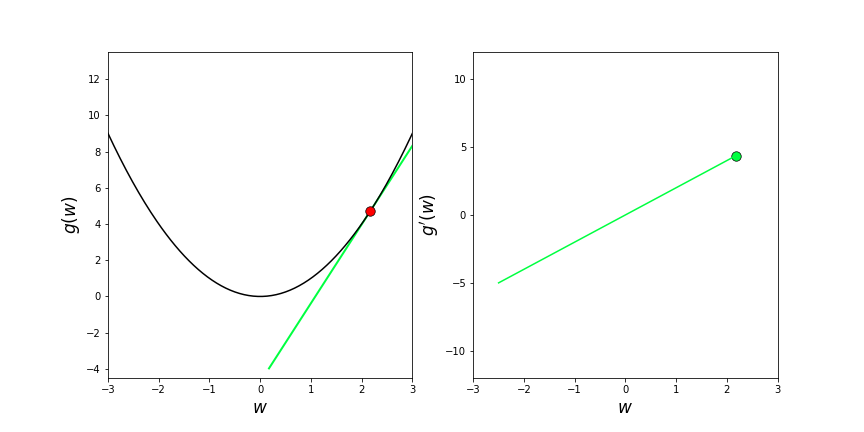
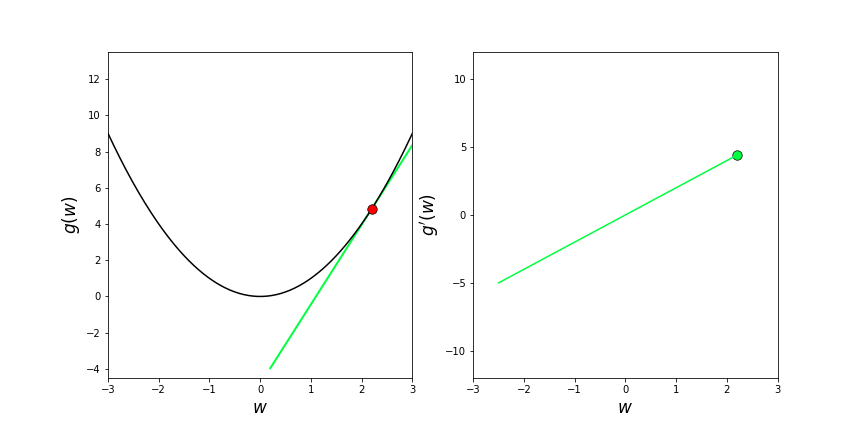
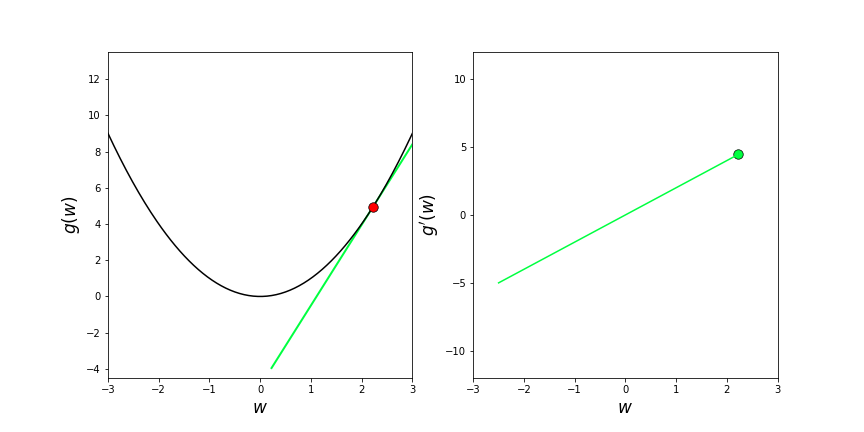
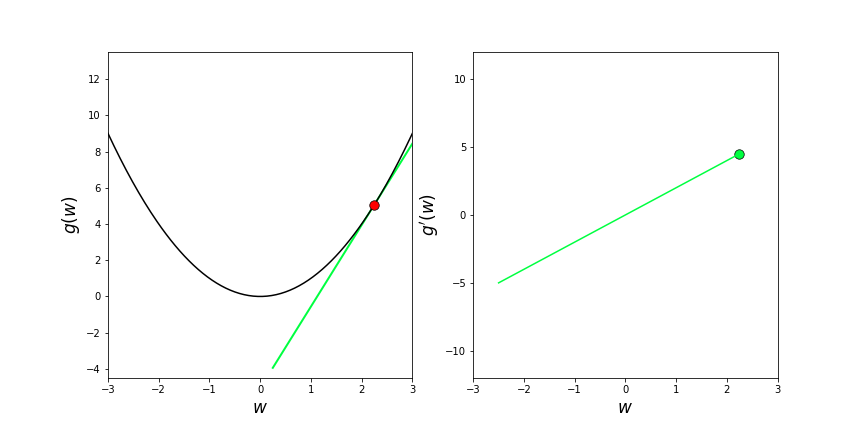
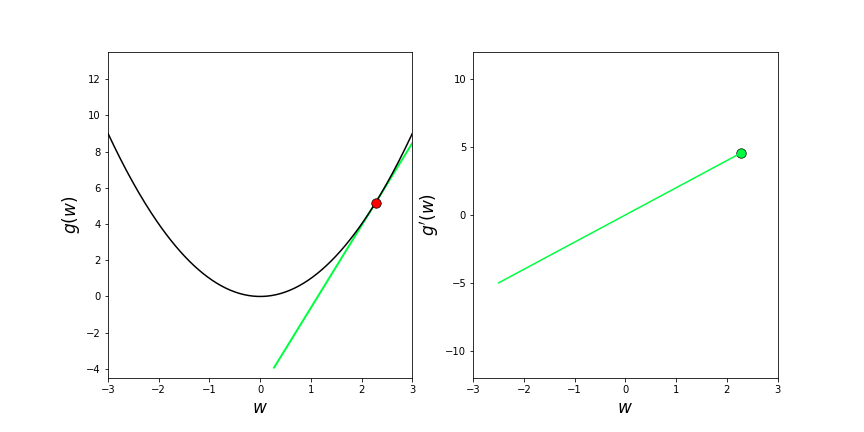
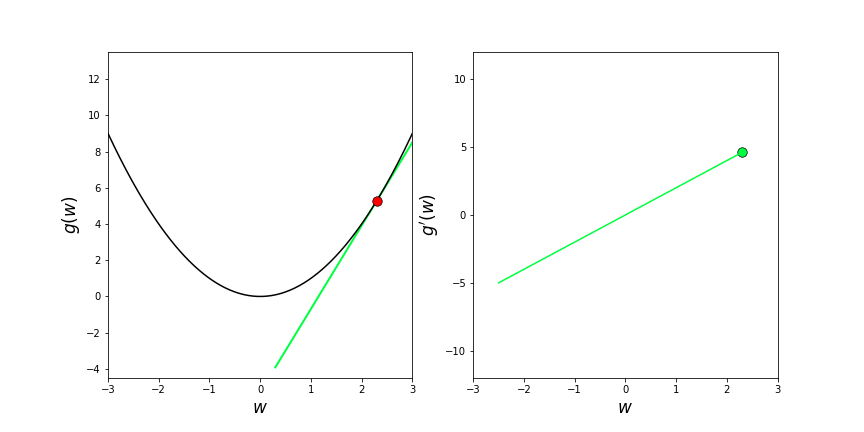
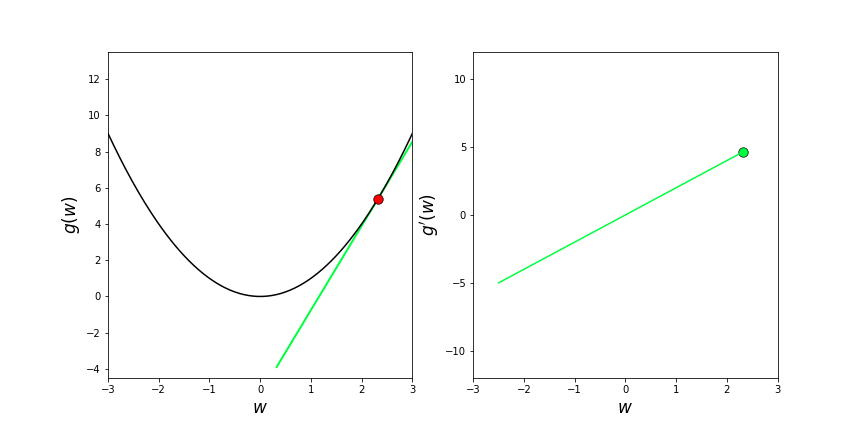
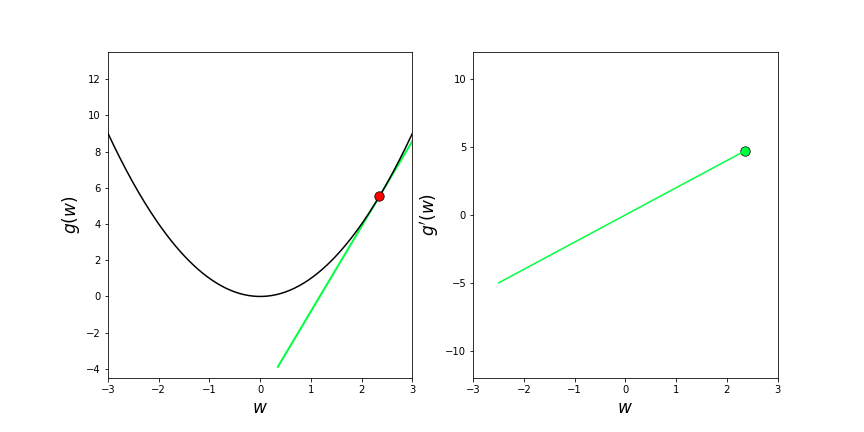
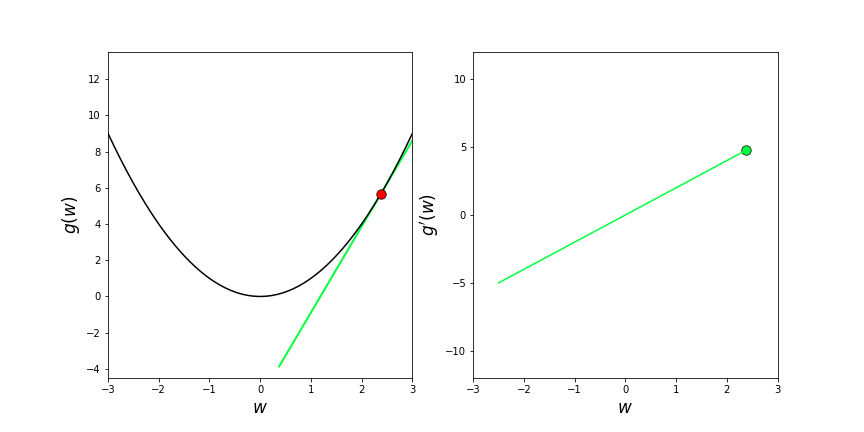
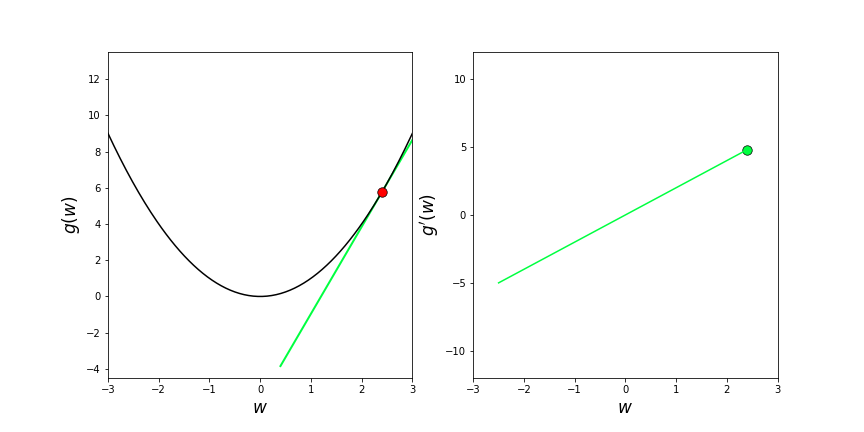
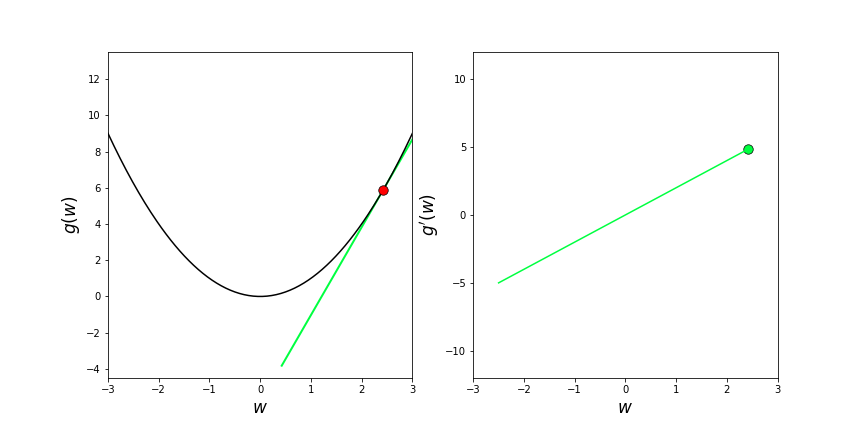
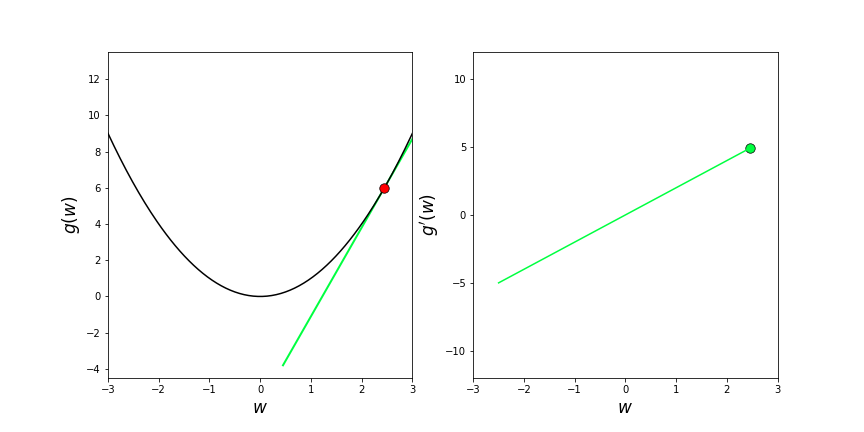
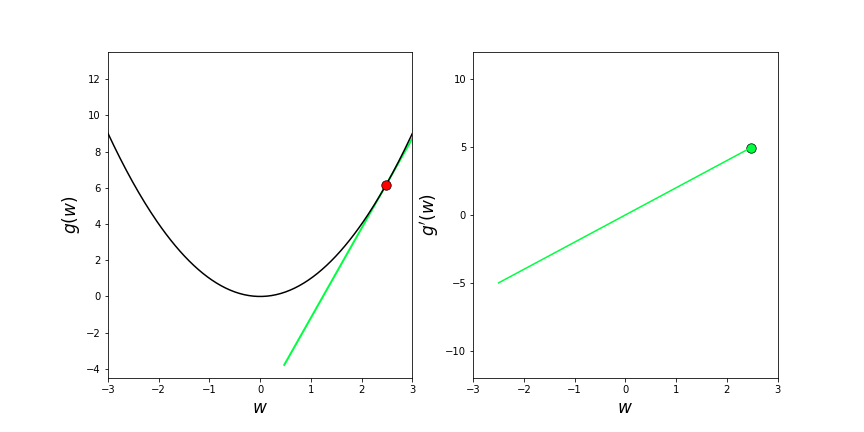
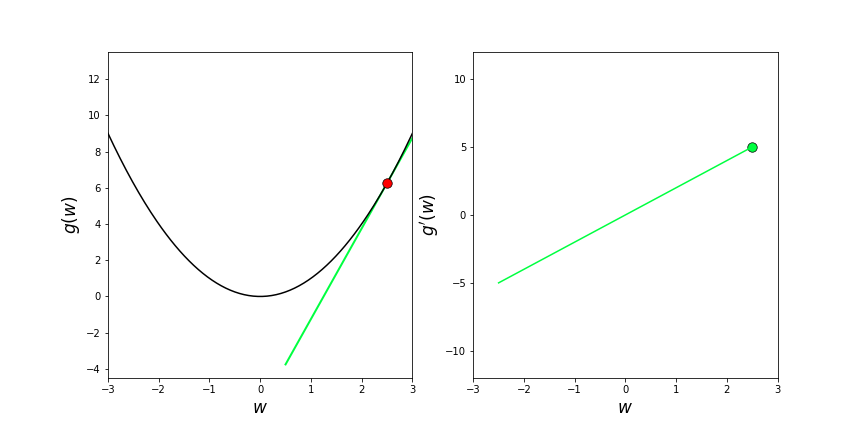

In [ ]:
# what function should we play with?  Defined in the next line, along with our fixed point where we show tangency.
g = lambda w: w**2

# create an instance of the visualizer with this function
st = calclib.function_derivative_joint_visualizer.visualizer(g = g)

# run the visualizer for our chosen input function and initial point
st.draw_it(num_frames = 200)

Here the plotted derivative looks like a line!  In fact - pushing the slider all the way to the right - from the picture it looks like we can be more specific: the line cross the origin, so the vertical intercept must be zero, and at $w = 2.5$ (the end of the plot) the output value looks to be around $g(2.5) = 5$, so the slope of this line appears to be around $\frac{g(2.5) - g(0)}{2.5 - 0} = \frac{5}{2.5} = 2$.  So - at least over the region of input plotted - the equation of the derivative appears to be 

$$ \frac{\mathrm{d}}{\mathrm{d}w}g(w) = 2w$$

#### <span style="color:#a50e3e;">Example. </span> Plotting the derivative of $g(w) = \text{sin}(3w)$

Lets try the same experiment with another function - the sinusoid

\begin{equation}
g(w) = \text{sin}(3w)
\end{equation}

In [ ]:
# what function should we play with?  Defined in the next line, along with our fixed point where we show tangency.
g = lambda w: np.sin(3*w)

# create an instance of the visualizer with this function
st = calclib.function_derivative_joint_visualizer.visualizer(g = g)

# run the visualizer for our chosen input function and initial point
st.draw_it(num_frames = 200)

rendering animation frame 25 of 200
rendering animation frame 50 of 200
rendering animation frame 75 of 200
rendering animation frame 100 of 200
rendering animation frame 125 of 200
rendering animation frame 150 of 200
rendering animation frame 175 of 200


All right - push the slider all the way to the right and lets examine the derivative.  Well first off one thing we can say is that the derivative looks pretty wavy - like a sine or cosine function, and of the same frequency as the original function itself.  Since its value at $w = 0$ is maximal we could say that some sort of cosine equation might work.  Notice too that the *magnitude* of the derivative - its vertical range -  is larger than that of the original function.  In fact it stretches from around -3 to 3.  Putting together these pieces we could loosely guess that an equation for the derivative over this range of input looks something like

$$ \frac{\mathrm{d}}{\mathrm{d}w}g(w) = 3\text{cos}(3w) $$

Guessing this by eye-balling a plot of the original function's derivative was certainly harder to come up with than when we did this with the previous example of $g(w) = w^2$.

#### <span style="color:#a50e3e;">Example. </span> Plotting the derivative of $g(w) = e^{3w}\frac{\text{sin}(\pi^2w)}{\pi^2w}$

Ok - one more.  Lets try the experiment with a crazier looking function

\begin{equation}
g(w) = e^{3w}\frac{\text{sin}(\pi^2w)}{\pi^2w}
\end{equation}

In [ ]:
# what function should we play with?  Defined in the next line, along with our fixed point where we show tangency.
g = lambda w: np.exp(0.2*w)*np.sin(5*w)/w

# create an instance of the visualizer with this function
st = calclib.function_derivative_joint_visualizer.visualizer(g = g)

# run the visualizer for our chosen input function and initial point
st.draw_it(num_frames = 200)

All right - push the slider all the way to the right.  What sort of equation can we conjure up that might represent the derivative in this case?  Its much harder to tell with this example - does one even exist? This example is indicative of just how challenging it can be in general to try to glean the equation of a derivative by eye-balling a plot of its table of values.

### Wrapping up

While the equation of the derivative was not at all easy to eyeball by plotting in the final example, we need not let this example crush the hope that - in general - an equation might exist for the derivative of a general function, as in the first two cases a reasonable equation was indeed derived by examining the derivative plot.  For many cases - certainly for machine learning applications - derivatives in fact do have equations associated with them.  In order to come up with a consistent and wide ranging rule for finding them - however - we need to go beyond visual examination and use a bit of mathematics.

## 1.2  Derivative equations for virtually any formula you can think of

Our experiments above seem to imply that we may be able to write down an equation for the derivative of at least some elementary functions.  **In fact we can find equations for every elementary function, and virtually every combination of elementary functions.**   This is a profound fact - every elementary function with known equations including lines, polynomials, trigonometric functions (sine, cosine, tanh, etc.,), transcendental functions (log, exponentials, etc.,), and even functions that are not differentiable everywhere (e.g., the relu function) have closed form formulae for their derivatives, as well as virtually every combination of these functions one can imagine.

> Every elementary function with known equations including lines, polynomials, trigonometric functions (sine, cosine, tanh, etc.,), transcendental functions (log, exponentials, etc.,), and even functions that are not differentiable everywhere (e.g., the relu function) have closed form formulae for their derivatives, as well as virtually every combination of these functions one can imagine.

In Table 1 below we show derivative formulae for a few popular elementary functions, and for completion provide derivations for many of them in an appendix Section that follows this one.  The calculations leading to these derivative formulae are not overly important in and of themselves for our context, but the formulae themselves (of which many more can be found in any standard calculus resource) are absolutely invaluable in machine learning / deep learning (as they are in many branches of science) and arise almost everywhere due to the all-encompassing presence of mathematical optimization.

<br>
<table style ="background-color:#eee"; width=300;>
<thead>
<tr>
    <th>elementary function</th>
    <th>derivative</th> 
  </tr>
  </thead>
  <tbody>
    <tr>
    <td>$c$ (any constant)</td>
    <td>$0$</td>
  </tr>
  
  <tr>
    <td>$w^p$</td>
    <td>$pw^{p-1}$</td>
  </tr>
    <tr>
    <td>$\text{sin}(w)$</td>
    <td>$\text{cos}(w)$</td>
  </tr>
  <tr>
    <td>$\text{cos}(w)$</td>
    <td>$-\text{sin}(w)$</td>
  </tr>
  
  <tr>
    <td>$e^w$</td>
    <td>$e^w$</td>
  </tr>
  <tr>
    <td>$\text{log}(w)$</td>
    <td>$\frac{1}{w}$</td>
  </tr>
    <tr>
    <td>$\text{tanh}(w)$</td>
    <td>$1 - \text{tanh}^2(w)$</td>
  </tr>
    <tr>
    <td>$\text{max}(0,w)$</td>
    <td>$\begin{cases}
0 & w\leq0\\
1 & w>0
\end{cases}$</td>
  </tr>
  </tbody>

</table>
</br>

As if this was not phenomenonal enough, the same [simple definition of the derivative]() leads to the fact that the derivative of every sort of simple combination of two functions - which consist of just a few possible operations (addition, multiplication, composition) - can be expressed in terms of the derivative formula of each individual function in combination.  When used repeatedly, these rules allow one to find the formula of essentially any function one can write down on paper.  For convenience we list these rules in Table 2 below - written down for general functions $f(w)$ and $g(w)$ - and again provide derivations for their veracity in the Appendix section following this one. 

<br>
<table style ="background-color:#eee"; width=600;>
  <col width="150">
  <col width="50">
  <col width="300">

<thead>
<tr>
    <th>combination type</th> 
    <th>functional form</th>
    <th>derivative rule</th> 
  </tr>
  </thead>
  <tbody>
    <tr>
    <td> multiplication by a constant $c$ </td>
    <td> $cg$</td>
    <td>$\frac{\mathrm{d}}{\mathrm{d}w}\left(cg(w)\right)=  c\frac{\mathrm{d}}{\mathrm{d}w}g(w)$</td>
  </tr>
  
  <tr>
  <td> addition of functions </td>
    <td> $f + g$ </td>
    <td>$\frac{\mathrm{d}}{\mathrm{d}w}(f(w) + g(w))=  \frac{\mathrm{d}}{\mathrm{d}w}f(w) + \frac{\mathrm{d}}{\mathrm{d}w}g(w)$</td>
  </tr>
  
  <tr>
  <td> multiplication of functions </td>
    <td> $f\cdot g$ </td>
    <td>$\frac{\mathrm{d}}{\mathrm{d}w}(f(w)\cdot g(w))=  \left(\frac{\mathrm{d}}{\mathrm{d}w}f(w)\right)\cdot g(w) + f(w)\cdot \left(\frac{\mathrm{d}}{\mathrm{d}w}g(w)\right)$
    </td>
  </tr>
  
  <tr>
  <td> composition of functions </td>
    <td> $f(g(w))$ </td>
    <td>$\frac{\mathrm{d}}{\mathrm{d}w}(f(g(w)))= \frac{\mathrm{d}}{\mathrm{d}g}f(g) \cdot \frac{\mathrm{d}}{\mathrm{d}w}g(w)$
  </td>
  </tr>


  </tbody>

</table>
</br>

Note again how the rules in Table 2 are for *generic functions*.  There are not two distinct rules telling one how to calculate the derivative formula for the sum of two polynomials, and the sum of two sinusoidal functions: there is just one rule for addition.  Likewise, there are not two rules telling one how to derive formula for the product of an exponential and a polynomial, and an sinusoid and a logarithm: there is only one rule for taking the derivative of a product of functions.  By using a handful of simple rules that tell us how to deal with the combination of two or more elementary functions, along with perhaps a dozen specific rules like the ones shown in Table 1 of derivative formulae for elemenatry functions, one can write down a formula for the derivative of virtually any function one can dream up (stop for a moment and think about just how amazing that is).  

## 1.3  Employ derivative rules for relatively simple examples 

Lets look at how we can apply the rules in Tables 1 and 2 above to computing derivative equations.

#### <span style="color:#a50e3e;">Example. </span> Derivative of $g(w) = w^{10} + \text{sin}(w)$

This function is a simple sum of two basic elements - $w^{10}$ and $\text{sin}(w)$ - and examining Table 1 above we can see that the derivative formulae for each piece are $10w^9$ and $\text{cos}(w)$ respectively.  Examining Table 2 we can see that since we just have sum here we can just add these two derivatives to form the derivative of the function itself.  In other words

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = \frac{\mathrm{d}}{\mathrm{d}w}(w^{10} + \text{sin}(w)) = \frac{\mathrm{d}}{\mathrm{d}w}w^{10} + \frac{\mathrm{d}}{\mathrm{d}w}\text{sin}(w) = 10w^9 + \text{cos}(w)
\end{equation}

#### <span style="color:#a50e3e;">Example. </span> Derivative of $g(w) = a_0 + a_1w + a_2w^{\,2} + \cdots + a_Pw^{\,P}$

Suppose we have just a single degree $p$ weighted monomial of the form 

\begin{equation}
g(w) = a_pw^{\,p}
\end{equation}

then using i) the derivative formula for an unweighted monomial term in Table 1 above, along with ii) the rule for constant multiplication rule in Table 2, we can say that 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}(a_pw^{\,p}) = a_p \frac{\mathrm{d}}{\mathrm{d}w}w^{\,p} = p a_p  w^{\,p-1}
\end{equation}

More generally speaking, if we have the geneal degree $P$ polynomial in a single variable

\begin{equation}
g(w) = a_0 + a_1w + a_2w^{\,2} + \cdots + a_Pw^{\,P}
\end{equation}

then using the formula we just derived for a single weighted monomial term combined with i) the rule for differentiating a constant shown in Table 1 and ii) the rule in Table 2 for differentiating a sum of functions, we have that the derivative is given by 

$$
\frac{\mathrm{d}}{\mathrm{d}w}\left(a_0 + a_1w + a_2w^{\,2} + \cdots + a_Pw^{\,P}\right) = \frac{\mathrm{d}}{\mathrm{d}w}\left(a_0 \right) + \frac{\mathrm{d}}{\mathrm{d}w}\left(a_1w \right) + \frac{\mathrm{d}}{\mathrm{d}w}\left(a_2w^{\,2} \right)  + \cdots + \frac{\mathrm{d}}{\mathrm{d}w}\left(a_Pw^{\,P} \right)
$$

\begin{equation}
= a_1 + 2a_2w  + \cdots + Pa_Pw^{\,P-1} 
\end{equation}

#### <span style="color:#a50e3e;">Example. </span> Derivative of  $g(w) = e^{3w}\frac{\text{sin}(\pi^2w)}{\pi^2w}$

Take our wiggly sinusoid based function

\begin{equation}
g(w) = e^{3w}\frac{\text{sin}(\pi^2w)}{\pi^2w}
\end{equation}

This consists of a product of three functions: $e^{3w}$, $\text{sin}(\pi^2w)$, and ${\left(\pi^2w\right)}^{-1}$ so we can certainly expect to use the product rule three times on evluation, each time differentiating with respect to one of these terms.  On differentiating each of these terms individually will then need a treatment of the chain rule.  Lets just differentiate one term at a time independent of the others, and then come back and combine the results using the product rule.

Take the first component, $e^{3w}$, which we can think of as the composition of $a=3w$ and $e^{a}$.  According to the chain rule in Table 2 we compute this derivative as 

$$\frac{\mathrm{d}}{\mathrm{d}a}(e^{a})\frac{\mathrm{d}}{\mathrm{d}w}(3w) = e^{3w}\cdot 3$$

Likewise for the second term, $\text{sin}(\pi^2w)$, we can think of as a composition of $a = \pi^2w$ and $\text{sin}(a)$, in which case we can use the chain rule from Table 2 to compute its derivative as

$$\frac{\mathrm{d}}{\mathrm{d}a}(\text{sin}(a))\frac{\mathrm{d}}{\mathrm{d}w}(\pi^2w) = \text{cos}(\pi^2w)\cdot\pi^2$$

Finally for the third term, ${(\pi^2w)}^{-1}$, we can think of as the composition of $a = \pi^2w$ with $a^{-1}$, then using the chain rule again we can compute 

$$\frac{\mathrm{d}}{\mathrm{d}a}a^{-1}\frac{\mathrm{d}}{\mathrm{d}w}\pi^2w = -\frac{1}{(\pi^2w)^2}\cdot \pi^2 = -\frac{1}{\pi^2w^2} $$

noting that the derivative of $a^{-1}$ is $-a^{-2}$ as given in Table 1.

All together then using each of these computations and the product rule from Table 2 we can compute the entire derivative as

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = 3e^{3w}\frac{\text{sin}(\pi^2w)}{\pi^2w} + e^{3w}\frac{\text{cos}(\pi^2w)}{w}  -e^{3w}\frac{\text{sin}(\pi^2w)}{\pi^2w^2}
\end{equation}

## Up next

So, you want to know the derivative equation of a general degree $P$ polynomial? 

\begin{equation}
g(w) = a_0 + a_1w + a_2w^{\,2} + \cdots + a_Pw^{\,P}
\end{equation}

A simple application of the rules contained in Tables 1 and 2 can give it to you with ease (as shown in the example above).

Or how about the wiggly function used previously above in the third plot?

\begin{equation}
g(w) = e^{3w}\frac{\text{sin}(\pi^2w)}{\pi^2w}
\end{equation}

Then again using a few of the rules in Tables 1 and 2 - along with some careful book keeping - and we can compute the equation of its derivative in fairly short order (as shown in the example above).

Both of these examples employ rules drawn from the same pool of universal ideas in Tables 1 and 2.  And we could apply the same rules to even more convoluted combinations of elementary functions, like this evil looking function

\begin{equation}
g(w) = \text{sin}\left(e^{\,5\text{tanh}^2(w) + w^5}\right)\text{log}\left(\frac{1}{w^2 + 1} \right)\frac{w^2 + 1}{\text{cos}(\text{sin}(w))}
\end{equation}

While we can certainly compute the derivative of this one by hand, it would take quite a bit of work.  And - in anycase - we are just doing the same thing over and over again - applying the same set of universal rules, and then turning the crank to spit out the answer [[1]](#endnotes).  There are not exponentially many rules for computing derivatives either - there are really just a handful - fewer then the number items listed on a typical cafe menu.  

So - with all this in mind - doesn't this whole process of computing derivatives seem ripe for automating?  If this gets you thinking - "I wonder if I can build a derivative calculator that just automates these rules, so that I never have to compuate another derivative ever again by hand if I don't feel like it" - then you're on the right trail.  We discuss the basic ideas in constructing a derivative calculator in the next post.

# 2.  Appendix of calculations

In this appendix we discuss how the simple definition of the derivative [discussed in the previous post]() can be used to derive formulae for elementary functions as well as the four simple combination rules mentioned in the previous Section that allow one to compute the derivative of an infinite variety of combinations of elemenatry functions.  Calculations which verify these formulae can found in virtually any calculus reference - we provide what we think are simpler and more transparent versions of such derivations for the interested reader.

## 2.1  Derivative formulae for derivatives of elementary functions

Remember this definition of the derivative at a point $w_0$ - [developed in the previous post in this series]() -  says that the slope of two secant lines - both of which share $w_0$ as one point and a point to either the left or right of $w_0$ as the other - should converge to the same value.  We ended by writing this compactly as 

\begin{equation}
 \frac{g(w_0 + \epsilon) - g(w_0)}{\epsilon} 
\end{equation}

which - if convergent for small magnitude $\epsilon$ - implies that $g$ has a derivative at $w_0$, which we wrote as $\frac{\mathrm{d}}{\mathrm{d}w}g(w_0)$.  Here we will be using this definition to show that certain elementary functions have derivatives at *every point* $w$, and that the derivative can be expressed by an equation.

In general the argument for showing that the derivative of a particular elementary function has a specific formula follow the same logic.  Here is the flavor of how such arguments are made.  First - compute the derivative using the definition above for a general point $w$ and small $\epsilon$ value, possibly applying a property or trick from algebra, trigonometry, or the study of transcendental formulae depending on the function.   Second: shrink the magnitude of $\epsilon$ to zero and out comes the general formula of the derivative.

#### <span style="color:#a50e3e;">Example. </span> Derivative of the constant function

Say our function $g(w) = c$ where $c$ is some constant (e.g., 1, -33.2, etc.,).  Let $\epsilon$ be some small magnitude number, then for a general point $w$

\begin{equation}
\frac{g(w + \epsilon) - g(w)}{\epsilon} = \frac{c - c}{\epsilon} = \frac{0}{\epsilon} = 0
\end{equation}

Neither the particular point $w$ nor the sign and magnitude of $\epsilon$ mattered above: the value is always equal to zero.  So here we have

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = 0 
\end{equation}

#### <span style="color:#a50e3e;">Example. </span> Derivative a simple line

Take the simple line $g(w) = w$, then we have for general $w$ and small magnitude $\epsilon$

 $$ \frac{g(w + \epsilon) - g(w)}{\epsilon} = \frac{w + \epsilon - w}{\epsilon} = \frac{\epsilon}{\epsilon} = 1$$

So here we have - again regardless of the magnitude and sign of $\epsilon$ - this value remains the same.  Hence the general derivative is given as

$$ \frac{\mathrm{d}}{\mathrm{d}w}g(w)= 1 $$

#### <span style="color:#a50e3e;">Example. </span> Derivative of general monomial terms

Lets start with the degree two monomial $g(w) = w^2$, then we have for general $w$ and small magnitude $\epsilon$

 $$ \frac{g(w + \epsilon) - g(w)}{\epsilon} = \frac{(w + \epsilon)^2 - w^2}{\epsilon} = \frac{w^2 + 2w\epsilon + \epsilon^2 - w^2 }{\epsilon} = \frac{2w\epsilon + \epsilon^2}{\epsilon} = 2w + \epsilon$$

With $\epsilon$ being infinitely small *it vanishes* from the line above, and we then have that

$$ \frac{\mathrm{d}}{\mathrm{d}w}g(w) = 2w $$

Next: lets look at the degree three monomial $g(w) = w^3$

$$ \frac{g(w + \epsilon) - g(w)}{\epsilon} = \frac{(w + \epsilon)^3 - w^3}{\epsilon} = \frac{w^3 + 3w^2\epsilon + 3w\epsilon^2  + \epsilon^3 - w^3}{\epsilon} = 3w^2 + 3w\epsilon  + \epsilon$$
 
For infinitely small magnitude $\epsilon$ only the $3w^2$ term remains.  Thus the derivative is 

$$\frac{\mathrm{d}}{\mathrm{d}w}g(w) = 3w^2$$

Now lets exmamine an arbitrary degree monomial term $g(w) = w^p$.  This argument works in a completely similar manner to the degree 2 case above: we just need to expand the term $(w + \epsilon)^p$ and re-arrange terms the right way.  Denoting the general binomial coeffecient (choose notation)

\begin{equation}
{{p}\choose{j}} = \frac{j!}{j!(p-j)!}
\end{equation}

the *Binomial Theorem* gives us this expansion as

\begin{equation}
(w + \epsilon)^{\,p} = \sum_{j=0}^p {{p}\choose{j}}w^{\,j}{\epsilon}^{\,p-j} 
\end{equation}

Note that we can write this equivalently - pulling out the two highest degree terms in $w$ to make them explicit, leaving every other term in the sum multiplied by $\epsilon^2$ 

\begin{equation}
 = w^{\,p} + \epsilon \, pw^{\,p-1} + \epsilon^2\sum_{j=0}^{p-2} {{p}\choose{j}}w^{\,j}{\epsilon}^{\,p-j - 2}
\end{equation}

Using this final form, and plugging it into the definition of the derivative we then have

$$
\frac{\left(w + \epsilon \right)^{\,p} - w^{\,p}}{\epsilon} = \frac{ \left(w^{\,p} + \epsilon \, pw^{\,p-1} + \epsilon^2\sum_{j=0}^{p-2} {{p}\choose{j}}w^{\,j}{\epsilon}^{\,p-j - 2} \right) - w^{\,p}}{\epsilon}
$$

\begin{equation}
=  pw^{\,p-1} + \epsilon\sum_{j=0}^{p-2} {{p}\choose{j}}w^{\,j}{\epsilon}^{\,p-j - 2} 
\end{equation}

and then as $\epsilon \longrightarrow 0$ only the $pw^{\,p-1}$ term remains.

#### <span style="color:#a50e3e;">Example. </span> Derivative of the exponential function

With $g(w) = e^{w}$ we have from the definition of the derivative

$$ \frac{g(w + \epsilon) - g(w)}{\epsilon} = \frac{ e^{w + \epsilon} - e^{w}}{\epsilon} = e^{w}\frac{e^{\epsilon} - 1}{\epsilon} = e^{w}$$

Where the final equality follows from the fact that denoting $f(\epsilon) = \frac{e^{\epsilon} - 1}{\epsilon}$ then $f(0) = 1$, as  can be seen in a plot of this function in the printout of the next Python cell.

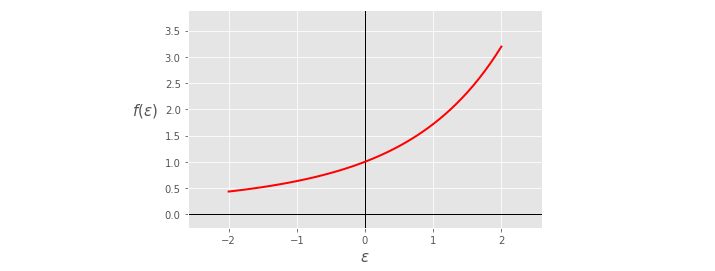

In [9]:
# create function
epsilon = np.linspace(-2,2)
f = (np.exp(epsilon) - 1)/epsilon

# reshape and package for plotter
epsilon.shape = (len(epsilon),1)
f.shape = (len(f),1)
f_table = np.concatenate((epsilon,f),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.single_plot(table = f_table,xlabel = '$\epsilon$',ylabel = '$f(\epsilon)$',rotate_ylabel=0)

#### <span style="color:#a50e3e;">Example. </span> Derivative the natural logarithm 

For this example we must use several properties of the (natural) logarithm - that is log the Euler base $e$ = 2.2.71828... - which include the following for positive constants $a$ and $b$

$$ \text{log}(a)-\text{log}(b) = \text{log}\left(\frac{a}{b}\right)$$

$$ a\cdot \text{log}(b) = \text{log}(b^a)$$

In addition we need to use one particular definition of Euler's constant

$$ \underset{\epsilon\rightarrow0}{\text{lim}} \,\,\left(1 + \epsilon \right)^{\frac{1}{\epsilon}} = e $$

(which can be verified by examining the plot of $f(\epsilon ) =\left(1 + \epsilon \right)^{\frac{1}{\epsilon}}$ in the printout of the next Python cell) and what follows in general that

$$ \left(1 + \epsilon w \right)^{\frac{1}{\epsilon}} = e^w $$

as $\epsilon$ becomes infinitely small.

Finally we need the fact that the natural log and $e$ are inverses of one another, e.g., that $\text{log}(e^w) = w$

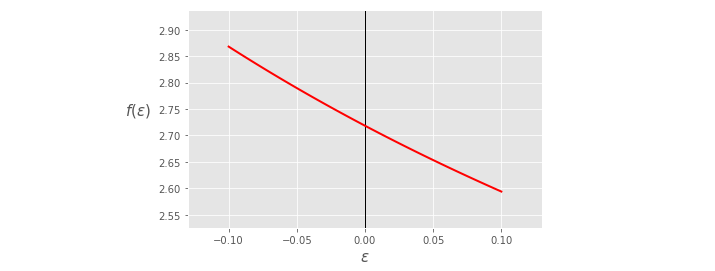

In [8]:
# create function
epsilon = np.linspace(-0.1,0.1)
f = (1 + epsilon)**(1/epsilon)

# reshape and package for plotter
epsilon.shape = (len(epsilon),1)
f.shape = (len(f),1)
f_table = np.concatenate((epsilon,f),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.single_plot(table = f_table,xlabel = '$\epsilon$',ylabel = '$f(\epsilon)$',rotate_ylabel = 0)

With these facts in mind and $g(w) = \text{log}(w)$ we have from the definition of the derivative we have 

$$\frac{\text{log}(w + \epsilon) - \text{log}(w)}{\epsilon} = \frac{\text{log}(\frac{w+\epsilon}{w})}{\epsilon} = \frac{\text{log}(1 + \frac{\epsilon}{w})}{\epsilon}= \text{log}((1 + \frac{\epsilon}{w})^\frac{1}{\epsilon})$$

And $\epsilon$ becomes infinitely small, using the definition of $e$, we have that the above

$$ =\text{log}(e^\frac{1}{w}) = \frac{1}{w} = \frac{\mathrm{d}}{\mathrm{d}w}g(w)$$

#### <span style="color:#a50e3e;">Example. </span> Derivative of sine

Using the 'double angle' rule $\text{sin}(a + b) = \text{sin}(a)\text{cos}(b) + \text{cos}(a)\text{sin}(b)$ we can write

$$
\frac{\text{sin}(w + \epsilon) - \text{sin}(w)}{\epsilon} = \frac{\text{sin}(w)\text{cos}(\epsilon) + \text{cos}(w)\text{sin}(\epsilon) - \text{sin}(w)}{\epsilon}$$

and re-arranging this we have that

$$= \text{sin}(w)\frac{(\text{cos}(\epsilon) - 1)}{\epsilon} + \text{cos}(w)\frac{\text{sin}(\epsilon)}{\epsilon} = \text{cos}(w)
$$

where the final equality follows from the facts that if we denote $f_1(\epsilon) = \frac{\text{cos}(\epsilon) - 1}{\epsilon}$  and  $f_2(\epsilon) = \frac{\text{sin}(\epsilon)}{\epsilon}$ then $f_1(\epsilon) = 0$ and $f_2(\epsilon) = 1$ as can be verified by examining the plot of each of these functions in the printout of the next Python cell. 

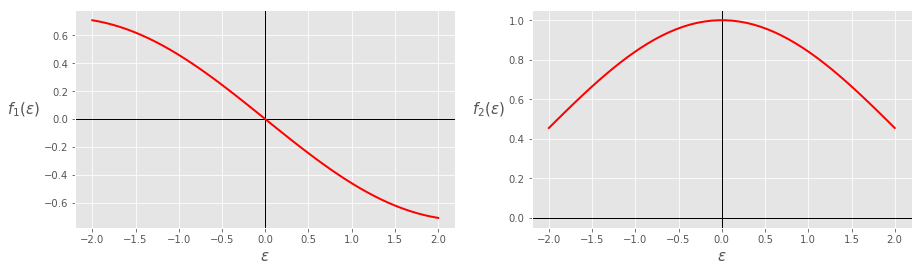

In [7]:
# create function
epsilon = np.linspace(-2,2)
f_1 = (np.cos(epsilon) - 1)/epsilon
f_2 = (np.sin(epsilon))/epsilon

# reshape and package for plotter
epsilon.shape = (len(epsilon),1)
f_1.shape = (len(f_1),1)
f_2.shape = (len(f_2),1)
f_1_table = np.concatenate((epsilon,f_1),axis=1)
f_2_table = np.concatenate((epsilon,f_2),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.double_plot(table1 = f_1_table,table2 = f_2_table,xlabel = '$\epsilon$',ylabel_1 = '$f_1(\epsilon)$',ylabel_2 = '$f_2(\epsilon)$')

## 2.2 Derivative rules

Using the same general definition of the derivative at a point we can derive all of the rules listed in Table 2.

### Scalar multiplication rule

If $c$ is just a constant, then we have from the definition of the derivative $\frac{\mathrm{d}}{\mathrm{d} w}\left(c \cdot g(w)\right)$ that we can simply factor the constant out, giving

\begin{equation}
 \frac{c\cdot g(w + \epsilon) - c\cdot g(w)}{\epsilon} = c \cdot\frac{g(w + \epsilon) - g(w)}{\epsilon} 
\end{equation}

and as $\epsilon$ vanishes the right hand side is precisely $c\cdot\frac{\mathrm{d}}{\mathrm{d} w} g(w)$

### Addition rule

To show that the derivative of a sum is the sum of individual derivatves, we start by computing the derivative of $\frac{\mathrm{d}}{\mathrm{d}w}\left(f(w) + g(w) \right)$ for small $\epsilon$, and simply rearrange terms as 

$$
\frac{\left(f(w + \epsilon) + g(w + \epsilon)\right) - \left(f(w) + g(w)\right)}{\epsilon} 
$$

\begin{equation}
= \frac{f(w + \epsilon) - f(w)}{\epsilon}  + \frac{g(w + \epsilon) - g(w)}{\epsilon} 
\end{equation}

with the latter being precisely $\frac{\mathrm{d}}{\mathrm{d}w}f(w) + \frac{\mathrm{d}}{\mathrm{d}w}g(w)$

### Product rule

With two functions $f(w)$ and $g(w)$ the definition of the derivative for small magnitude $\epsilon$ gives

$$\frac{f(w + \epsilon)g(w + \epsilon) - f(w)g(w)}{\epsilon} $$

Adding and subtracting $f(w+\epsilon)g(w)$ (equals zero)

$$=\frac{f(w + \epsilon)g(w + \epsilon) - f(w + \epsilon)g(w) + f(w+\epsilon)g(w) - f(w)g(w)}{\epsilon} $$

$$=\frac{f(w + \epsilon) - f(w)}{\epsilon}\,g(w) \, \,+ \,\, f(w + \epsilon)\,\frac{g(w + \epsilon) - g(w)}{\epsilon}$$

Then as $\epsilon \longrightarrow 0$ we have that

$\begin{align}
f(w + \epsilon) \longrightarrow f(w)~~~~~~\\ 
\frac{f(w + \epsilon) - f(w)}{\epsilon}\longrightarrow \frac{\mathrm{d}}{\mathrm{d}w}f(w)  \\
\frac{g(w + \epsilon) - g(w)}{\epsilon}\longrightarrow \frac{\mathrm{d}}{\mathrm{d}w}g(w)  \\
\end{align}$

And so all together then the above gives $\frac{\mathrm{d}}{\mathrm{d}w}f(w)\cdot g(w) + f(w)\cdot\frac{\mathrm{d}}{\mathrm{d}w}g(w)$

<a id='endnotes'></a>
## Endnotes

[1]   If you took a calculus course in school you may have - depending on your luck - spent much of your time there being forced to apply these simple rules over and over again, computing derivative equations of increasingly complicated examples of elemenatry functions combinations like this one.  No need to re-live those terrors if we can avoid them.

<blockquote style="border-left: 5px solid; border-left-color: #ccc; background: white;"><p>The content of this notebook is supplementary material for the textbook Machine Learning Refined (Cambridge University Press, 2016). Visit <a href="http://mlrefined.com">http://mlrefined.com</a> for free chapter downloads and tutorials, and <a href="https://www.amazon.com/Machine-Learning-Refined-Foundations-Applications/dp/1107123526/ref=sr_1_1?ie=UTF8&amp;qid=1474491657&amp;sr=8-1&amp;keywords=machine+learning+refined">our Amazon site</a> for details regarding a hard copy of the text.</p>
</blockquote>